# Test the estimator class 

In [1]:
import os
import scanpy as sc
import numpy as np
import pandas as pd
import torch
import yaml
from celldreamer.paths import ROOT
from celldreamer.estimator.celldreamer_estimator import CellDreamerEstimator
from celldreamer.paths import DATA_DIR
from celldreamer.data.utils import Args

from pytorch_lightning.callbacks import ModelCheckpoint, LearningRateMonitor, TQDMProgressBar
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.utilities.model_summary import ModelSummary

In [2]:
cd $ROOT

/nfs/homedirs/pala/celldreamer


Initialize the ```args``` dict and the estimator class

In [3]:
config = yaml.safe_load(open(ROOT / "configs/perturbation_modelling/config_ddpm.yaml", 
                            "rb"))

In [4]:
args_pert = Args(config["args"]) 

Initialize the cell estimator 

In [5]:
estimator = CellDreamerEstimator(args_pert)

Create the training folders...
Initialize data module...


/nfs/staff-ssd/pala/envs/celldreamer/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/nfs/staff-ssd/pala/envs/celldreamer/lib/python3.10/site-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING `resume` will be ignored si

/nfs/staff-ssd/pala/envs/celldreamer/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /nfs/staff-ssd/pala/envs/celldreamer/lib/python3.10/ ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Initialize feature embeddings...
Initialize model...


Check training batches 

In [ ]:
estimator.train()

/nfs/staff-ssd/pala/envs/celldreamer/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /nfs/staff-ssd/pala/envs/celldreamer/lib/python3.10/ ...
  rank_zero_warn(
/nfs/staff-ssd/pala/envs/celldreamer/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:615: UserWarning: Checkpoint directory /nfs/students/pala/celldreamer/try_experiment/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type        | Params
------------------------------------------------
0 | denoising_model | MLPTimeStep | 1.2 M 
1 | mse             | MSELoss     | 0     
------------------------------------------------
1.2 M     Trainable para

Sanity Checking: 0it [00:00, ?it/s]

/nfs/staff-ssd/pala/envs/celldreamer/lib/python3.10/site-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


predicted tensor([[-0.3276, -0.7177,  0.1298,  ...,  0.2316,  0.5987, -0.2070],
        [ 0.9012, -0.2564, -0.3287,  ..., -0.9500,  0.6613, -0.9778],
        [-0.5144,  0.4262,  0.1686,  ...,  0.1714,  0.9706, -2.0561],
        ...,
        [-0.2250, -0.0404, -0.0617,  ...,  1.2546,  0.1273, -0.0072],
        [ 0.3481,  0.5190,  0.7772,  ..., -0.5272,  1.6256, -1.8455],
        [ 0.0258,  0.7626, -0.1695,  ...,  0.1427,  0.5351, -0.6198]],
       device='cuda:0')
predicted tensor([[-1.2313,  0.2570, -0.1732,  ...,  1.7662,  0.8251,  0.4359],
        [ 1.2820, -0.6111,  0.1030,  ...,  0.8820,  1.9936, -1.5334],
        [ 0.0278,  0.8032, -1.6490,  ...,  1.3352,  0.9290, -1.0119],
        ...,
        [ 0.1675,  0.6551,  0.0793,  ..., -0.1793,  0.4522,  0.0850],
        [-2.0729, -1.1264, -0.3093,  ..., -0.8705, -0.1957, -1.3955],
        [-0.1949,  0.5617,  1.8727,  ...,  0.9296,  0.3027, -1.1954]],
       device='cuda:0')


Training: 0it [00:00, ?it/s]

predicted tensor([[ 2.0256,  2.4268, -0.3018,  ...,  0.7353,  1.5252,  0.9089],
        [ 0.7830,  0.0428, -1.0626,  ...,  0.8784,  0.2243,  0.8567],
        [ 0.7100,  0.7708, -0.2569,  ...,  0.1335,  0.4964, -0.1366],
        ...,
        [ 0.2849, -0.1293,  1.3861,  ...,  0.3561, -0.7090,  0.6850],
        [-0.2552,  0.3921,  1.1809,  ...,  0.7705,  1.2779, -1.1017],
        [ 0.7003,  2.0693,  0.0303,  ...,  1.2837,  0.9962,  1.8760]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0550,  0.2234, -2.0968,  ...,  0.7705, -0.1584,  0.1080],
        [ 0.9676, -0.0299, -0.5058,  ...,  1.2184,  0.2188,  0.2965],
        [ 0.5612,  0.5745, -0.4855,  ...,  0.4587,  0.3722,  0.8396],
        ...,
        [ 0.0714, -0.9002,  0.0166,  ..., -1.1533,  0.2564, -1.3003],
        [ 0.6702, -0.5257,  0.2973,  ...,  0.2253,  0.7150,  0.5115],
        [-0.0164, -0.1910, -0.0943,  ...,  0.0614,  0.5081,  0.9032]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.0391, -0.2327, -0.1397,  ..., -0.0781, -0.3509,  0.0560],
        [ 0.0144, -0.1282, -0.0617,  ..., -0.1901, -0.2926,  0.2755],
        [-0.0419,  0.0027, -0.1324,  ..., -0.0713, -0.2205, -0.0472],
        ...,
        [-0.0434, -0.1156, -0.3747,  ...,  0.3389,  0.0359, -0.1253],
        [ 0.1726,  0.1288, -0.1701,  ...,  0.1906,  0.3129,  0.0374],
        [-0.4187,  0.1229, -0.2248,  ..., -0.1356, -0.0664, -0.1225]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.1891, -0.4792, -0.0164,  ...,  0.0195,  0.2282, -0.4433],
        [ 0.0151, -0.3588, -0.0757,  ...,  0.1356, -0.2616,  0.0534],
        [-0.0148, -0.0885, -0.2825,  ...,  0.1031, -0.0370,  0.4033],
        ...,
        [-0.2437, -0.2925,  0.0420,  ..., -0.2450, -0.2429, -0.0625],
        [-0.1487,  0.0511, -0.2235,  ...,  0.3174,  0.0171, -0.3346],
        [ 0.2372, -0.1740,  0.2266,  ...,  0.1545,  0.4230, -0.1381]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.0057,  0.1577,  0.0274,  ...,  0.0909, -0.0327, -0.0608],
        [ 0.0225, -0.0257, -0.0581,  ..., -0.0092,  0.1464, -0.0334],
        [-0.0038,  0.0624, -0.1153,  ..., -0.1152,  0.1543, -0.0721],
        ...,
        [-0.1716,  0.0673,  0.0404,  ...,  0.0513, -0.0975,  0.0125],
        [ 0.0619,  0.1301, -0.0009,  ..., -0.0361,  0.0636, -0.0083],
        [ 0.0198,  0.0590, -0.0154,  ...,  0.0174,  0.1026,  0.0490]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0813,  0.0864, -0.1101,  ..., -0.0204,  0.2120,  0.0152],
        [-0.1484,  0.0601, -0.0210,  ..., -0.0634,  0.0226, -0.0509],
        [-0.0166,  0.1271,  0.0181,  ...,  0.1277, -0.0308,  0.0762],
        ...,
        [ 0.0535, -0.0275, -0.0611,  ..., -0.0051,  0.0342, -0.0113],
        [ 0.1212,  0.0382,  0.0015,  ...,  0.0712,  0.0405,  0.0413],
        [ 0.0017,  0.0537,  0.0451,  ..., -0.1515, -0.1509,  0.0373]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.0106,  0.0246, -0.0552,  ..., -0.0050,  0.0966, -0.1070],
        [-0.0922, -0.0057, -0.0171,  ..., -0.1230, -0.0087, -0.1746],
        [ 0.0061,  0.0445,  0.0914,  ..., -0.0723, -0.0314, -0.0921],
        ...,
        [-0.0040, -0.0208, -0.0022,  ..., -0.0713,  0.0417, -0.1097],
        [-0.0387,  0.0336,  0.0561,  ...,  0.1480,  0.0134, -0.0161],
        [-0.0014,  0.0670,  0.0561,  ...,  0.0365,  0.0203, -0.0313]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0146, -0.0913, -0.0442,  ...,  0.0452,  0.0780, -0.1556],
        [ 0.0416,  0.0436,  0.0288,  ...,  0.0106, -0.0009, -0.0949],
        [-0.0271, -0.0056,  0.0121,  ..., -0.0166, -0.0147, -0.0278],
        ...,
        [ 0.1052, -0.0485, -0.0443,  ...,  0.0702,  0.0251, -0.1081],
        [-0.0038,  0.0141, -0.0197,  ...,  0.0250,  0.0859, -0.0269],
        [ 0.0438, -0.0004,  0.0609,  ..., -0.1657, -0.0221, -0.1150]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0741,  0.0182, -0.0158,  ..., -0.0206,  0.0561, -0.0140],
        [-0.0231,  0.1486,  0.0706,  ..., -0.0961,  0.0222, -0.0154],
        [-0.0338,  0.2096, -0.0199,  ..., -0.0465,  0.0123,  0.0371],
        ...,
        [-0.0122,  0.2480,  0.0469,  ..., -0.0925, -0.0571,  0.0029],
        [ 0.0076, -0.0105,  0.0874,  ...,  0.0539, -0.0294, -0.0304],
        [-0.0072,  0.1604,  0.0590,  ..., -0.0590,  0.0194,  0.0513]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 4.4166e-02,  2.3986e-02,  3.3263e-02,  ...,  8.0459e-02,
         -5.4151e-02,  4.3418e-02],
        [-2.8128e-02,  4.9151e-02, -4.6212e-02,  ..., -1.1982e-01,
         -8.9995e-02,  3.0459e-03],
        [ 2.7200e-03,  1.3379e-01,  3.5688e-03,  ...,  1.3937e-02,
          2.3019e-03, -1.4902e-02],
        ...,
        [-2.6627e-03,  1.1648e-01,  6.9526e-02,  ..., -1.3979e-01,
         -4.3944e-02,  4.4328e-02],
        [-1.2572e-02,  6.6976e-02, -1.9967e-02,  ..., -3.1713e-02,
    

predicted tensor([[-0.0080,  0.0403, -0.0279,  ...,  0.0110,  0.0444,  0.0087],
        [ 0.0606,  0.0665,  0.0274,  ...,  0.1618,  0.0729,  0.0985],
        [-0.0202,  0.0208,  0.0694,  ..., -0.0106,  0.0944,  0.0759],
        ...,
        [ 0.0029,  0.0280, -0.0689,  ...,  0.0718,  0.0767,  0.0187],
        [ 0.0282,  0.0340,  0.0286,  ..., -0.0404,  0.0450,  0.1089],
        [ 0.0005,  0.0497, -0.0025,  ...,  0.0081,  0.0933,  0.1318]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0360,  0.0116, -0.0124,  ..., -0.0216, -0.0343,  0.0202],
        [-0.0234,  0.0477, -0.0473,  ..., -0.0131,  0.0131,  0.0031],
        [ 0.0416,  0.0561, -0.0424,  ...,  0.0906,  0.0308,  0.0142],
        ...,
        [-0.0983,  0.0266, -0.0085,  ..., -0.1124,  0.0214, -0.0205],
        [-0.0555,  0.0730,  0.0571,  ..., -0.0396,  0.0017,  0.1382],
        [-0.0526,  0.0577,  0.0641,  ..., -0.1088, -0.0554,  0.1320]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0208, -0.0071, -0.0599,  ...,  0.0046,  0.0064,  0.0700],
        [ 0.0524,  0.0217, -0.0360,  ...,  0.0065, -0.0139,  0.1221],
        [-0.2789,  0.0663,  0.0625,  ..., -0.0112,  0.0397,  0.0516],
        ...,
        [-0.0671,  0.0040,  0.0162,  ..., -0.0111, -0.0363,  0.0344],
        [-0.0806,  0.0994,  0.1313,  ..., -0.0329,  0.0235, -0.0347],
        [-0.1001, -0.0118,  0.0295,  ...,  0.0327, -0.0636,  0.0462]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0126,  0.0132,  0.0295,  ...,  0.0220, -0.0626,  0.0096],
        [-0.0657,  0.0578,  0.0980,  ..., -0.0645,  0.0044, -0.0036],
        [ 0.0167, -0.0253,  0.0020,  ..., -0.0496, -0.0652,  0.0117],
        ...,
        [-0.1479,  0.0207,  0.0977,  ..., -0.0052, -0.0024,  0.0958],
        [-0.0178,  0.0145,  0.0190,  ..., -0.0083,  0.0097,  0.0332],
        [-0.1204,  0.0197,  0.0706,  ...,  0.0381,  0.0202,  0.0614]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0804,  0.1676,  0.0815,  ..., -0.0535, -0.0593, -0.0845],
        [ 0.0847,  0.1649,  0.0906,  ..., -0.0389, -0.0689, -0.0837],
        [ 0.0217, -0.0097,  0.0350,  ...,  0.0337,  0.0619,  0.0340],
        ...,
        [ 0.0475,  0.1131,  0.0698,  ..., -0.0084, -0.0333, -0.0597],
        [ 0.0488,  0.1817,  0.0419,  ..., -0.0674, -0.0876, -0.1071],
        [ 0.0978,  0.2108, -0.0109,  ...,  0.0163, -0.0247, -0.0957]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0374,  0.1245,  0.0522,  ..., -0.0985, -0.0573, -0.0198],
        [ 0.0035,  0.2416,  0.0083,  ...,  0.0055, -0.1198, -0.0995],
        [ 0.0085,  0.0515,  0.0687,  ..., -0.0269, -0.0670, -0.0096],
        ...,
        [ 0.0043,  0.1387,  0.0304,  ..., -0.0159, -0.1061, -0.0222],
        [-0.0124,  0.0094,  0.0549,  ..., -0.0113, -0.0127, -0.0386],
        [ 0.0319,  0.0125, -0.0562,  ...,  0.0277,  0.1089,  0.0142]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 6.0008e-03, -3.2164e-02, -2.8925e-02,  ..., -6.9052e-02,
         -4.0790e-02,  4.4569e-02],
        [-9.8136e-02,  1.5585e-04,  1.6122e-01,  ...,  1.6484e-02,
         -1.1539e-01,  2.7390e-02],
        [ 1.6925e-02, -4.7239e-02, -3.1374e-03,  ..., -2.6324e-02,
         -4.5156e-02,  3.2409e-02],
        ...,
        [-1.1543e-01,  4.5939e-02,  1.6242e-01,  ..., -2.3937e-02,
         -1.2906e-01, -1.2078e-02],
        [ 2.4344e-02,  5.3653e-03, -3.0584e-02,  ...,  3.3953e-04,
         -3.1803e-02,  6.2891e-02],
        [-6.1311e-02,  6.1744e-02,  1.5030e-01,  ...,  5.1961e-02,
         -1.1870e-01,  1.6105e-02]], device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0065,  0.0100, -0.0182,  ..., -0.0242, -0.0246,  0.0812],
        [ 0.0343,  0.0087,  0.0032,  ..., -0.0529, -0.0242,  0.0705],
        [-0.0310, -0.0533,  0.0155,  ..., -0.0656, -0.0427,  0.0122],
        ...,
        [ 0.0482, -0.0116, -0.0174,  ..., -0.0275, -0.0585,  0.0424],
        [-0.

predicted tensor([[-0.0768,  0.0172, -0.0157,  ..., -0.0035,  0.1163, -0.1058],
        [-0.0003,  0.0236,  0.0545,  ...,  0.0416,  0.0364,  0.0205],
        [-0.0918,  0.0403,  0.0325,  ..., -0.0266,  0.1234, -0.1908],
        ...,
        [-0.0938,  0.0020,  0.0371,  ...,  0.0223,  0.1530, -0.1526],
        [-0.0695,  0.0073,  0.0597,  ...,  0.0435,  0.0660, -0.0178],
        [-0.0435,  0.0343,  0.0080,  ...,  0.0302,  0.1005, -0.1181]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0938,  0.0153, -0.0014,  ...,  0.0489,  0.0150,  0.0491],
        [-0.0491, -0.0118,  0.0422,  ...,  0.0172,  0.0640, -0.0325],
        [-0.0175,  0.0289,  0.0489,  ...,  0.0280,  0.0567,  0.0174],
        ...,
        [-0.0672,  0.0165,  0.0600,  ...,  0.0634,  0.0168, -0.0131],
        [-0.0399, -0.0030,  0.0195,  ...,  0.0239, -0.0032,  0.0160],
        [-0.0229,  0.0359, -0.0038,  ..., -0.0658,  0.0381, -0.1138]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0268,  0.0072, -0.0294,  ...,  0.0401,  0.0625, -0.0072],
        [-0.0756, -0.0533,  0.2489,  ..., -0.1577, -0.0428, -0.0159],
        [-0.0418, -0.0449,  0.1019,  ..., -0.1002, -0.0133,  0.0294],
        ...,
        [ 0.0077, -0.1135,  0.0611,  ...,  0.0283,  0.0055,  0.0370],
        [ 0.0003, -0.0230, -0.0235,  ...,  0.0826,  0.0322, -0.0196],
        [ 0.0129, -0.0251, -0.1001,  ...,  0.0980,  0.1678, -0.0081]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0490,  0.0183,  0.1162,  ..., -0.0347, -0.0339, -0.0092],
        [-0.0240, -0.0594,  0.1616,  ..., -0.0608, -0.0090, -0.0638],
        [-0.0234, -0.0158, -0.0292,  ...,  0.0228,  0.0561,  0.0218],
        ...,
        [-0.0549, -0.0339,  0.2114,  ..., -0.0762, -0.0237, -0.0416],
        [ 0.0095, -0.0100, -0.0905,  ...,  0.1291,  0.1443, -0.0060],
        [-0.0210,  0.0347, -0.0510,  ...,  0.0801,  0.0817,  0.0379]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.0720,  0.0409,  0.0091,  ..., -0.0155, -0.0139, -0.0361],
        [-0.0368, -0.0291, -0.0265,  ..., -0.0706, -0.0377, -0.0018],
        [-0.0571,  0.1000,  0.0908,  ..., -0.0657, -0.0503, -0.0099],
        ...,
        [ 0.0024, -0.0123,  0.0728,  ..., -0.0401, -0.0344,  0.0328],
        [-0.0711,  0.1244,  0.1555,  ..., -0.0184, -0.0293, -0.0398],
        [-0.0389,  0.0687,  0.1159,  ..., -0.0234,  0.0202, -0.0528]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0013,  0.0895,  0.0569,  ..., -0.0732,  0.0058, -0.0101],
        [-0.0448,  0.1054,  0.0826,  ..., -0.0541, -0.0187, -0.0930],
        [-0.0515,  0.0427,  0.0428,  ..., -0.0320, -0.0339, -0.0628],
        ...,
        [-0.0441,  0.1229,  0.0919,  ..., -0.0550, -0.0099, -0.0909],
        [ 0.0683,  0.0648, -0.0177,  ..., -0.0130,  0.0305, -0.0040],
        [-0.0561,  0.0828,  0.1257,  ..., -0.1219, -0.0264, -0.0890]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0746,  0.1086,  0.0826,  ...,  0.0145, -0.0418,  0.1271],
        [-0.0139, -0.0068, -0.0071,  ..., -0.0126,  0.0210,  0.0100],
        [ 0.0424, -0.0434, -0.0165,  ...,  0.0723,  0.0086,  0.0544],
        ...,
        [ 0.0029, -0.0793, -0.0325,  ...,  0.1356, -0.0110,  0.0144],
        [-0.0344,  0.0252,  0.0179,  ...,  0.0299,  0.0685,  0.0171],
        [-0.0208,  0.0255,  0.0101,  ...,  0.0524,  0.0434,  0.0223]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0144,  0.0394,  0.0108,  ...,  0.0665,  0.0670,  0.0091],
        [ 0.0500,  0.0765,  0.1014,  ...,  0.0039, -0.0307,  0.1480],
        [ 0.0812,  0.0931,  0.0880,  ...,  0.0276,  0.0034,  0.1900],
        ...,
        [ 0.0096,  0.0115, -0.0076,  ...,  0.0234,  0.0179, -0.0039],
        [-0.0197,  0.0109,  0.0180,  ...,  0.0464,  0.0606,  0.0280],
        [-0.0359, -0.0064, -0.0338,  ...,  0.0457,  0.0067,  0.0335]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0758, -0.0288,  0.0954,  ..., -0.0914, -0.0524,  0.2284],
        [-0.0350,  0.0204,  0.0116,  ...,  0.0226, -0.0467,  0.0428],
        [-0.0515,  0.0258,  0.0450,  ...,  0.0462, -0.0585,  0.0123],
        ...,
        [-0.0030, -0.0377,  0.0114,  ...,  0.0381, -0.0291,  0.0278],
        [ 0.0535, -0.0339,  0.0931,  ..., -0.0586, -0.0530,  0.1704],
        [ 0.0444, -0.0503,  0.1045,  ..., -0.0925, -0.0534,  0.1834]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0526, -0.0168,  0.0641,  ..., -0.0705, -0.0369,  0.1108],
        [ 0.0432, -0.0544,  0.0865,  ..., -0.0721, -0.0209,  0.0855],
        [ 0.0756,  0.0379,  0.0557,  ..., -0.0193, -0.0349,  0.0346],
        ...,
        [-0.0893,  0.0140,  0.0583,  ...,  0.0427, -0.0299,  0.0330],
        [ 0.1146, -0.0229,  0.0801,  ..., -0.0683, -0.0207,  0.1284],
        [-0.0481,  0.0054,  0.0545,  ...,  0.0272, -0.0625, -0.0040]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.1138,  0.0469, -0.0069,  ..., -0.0570,  0.0677,  0.1048],
        [ 0.0357,  0.0361,  0.0178,  ..., -0.0346,  0.0460,  0.0619],
        [ 0.0390,  0.0102, -0.0554,  ..., -0.0613, -0.0194,  0.0085],
        ...,
        [ 0.1101,  0.0743, -0.0342,  ..., -0.0428,  0.0296,  0.1285],
        [-0.0147, -0.0025, -0.0141,  ..., -0.0478, -0.0145,  0.0046],
        [ 0.0743,  0.0282, -0.0069,  ...,  0.0611,  0.0928, -0.0182]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 2.1022e-02, -7.9270e-05, -2.4618e-03,  ..., -7.7660e-02,
         -4.3176e-02, -1.2079e-02],
        [ 8.2884e-02,  4.8540e-02,  1.9347e-02,  ..., -3.7939e-02,
          2.1523e-02,  1.4235e-01],
        [ 2.5667e-02,  7.0161e-02, -1.7515e-02,  ...,  4.7912e-02,
          5.4313e-03,  6.2664e-02],
        ...,
        [ 5.7597e-02,  5.6373e-02,  2.7665e-02,  ..., -7.9568e-02,
          1.7493e-02,  3.9082e-02],
        [ 3.0344e-02,  2.9767e-02, -2.5992e-02,  ..., -5.8176e-02,
    

predicted tensor([[-0.0616, -0.0245, -0.0674,  ...,  0.0290,  0.0394, -0.0812],
        [ 0.0476,  0.0261, -0.0444,  ...,  0.0115,  0.0036,  0.0235],
        [-0.0030, -0.0210, -0.0253,  ...,  0.0152,  0.0151, -0.0034],
        ...,
        [-0.0606, -0.0379, -0.1256,  ..., -0.0004,  0.0829, -0.1403],
        [ 0.1192,  0.0718, -0.0926,  ..., -0.0289, -0.0115, -0.0334],
        [-0.0965, -0.0326, -0.1451,  ...,  0.0080,  0.0540, -0.1237]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0944, -0.0623, -0.0863,  ..., -0.0093,  0.0529, -0.0795],
        [ 0.0981,  0.0587, -0.0645,  ...,  0.0076, -0.0166, -0.0432],
        [ 0.0853,  0.0639, -0.0569,  ..., -0.0204, -0.0153, -0.0246],
        ...,
        [-0.0009,  0.0053, -0.0028,  ...,  0.0105, -0.0019, -0.0053],
        [ 0.0179,  0.0236, -0.0030,  ..., -0.0278,  0.0229, -0.0065],
        [ 0.1197,  0.0768, -0.0625,  ...,  0.0174, -0.0705, -0.0189]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0594,  0.0280, -0.0285,  ...,  0.0020,  0.0409,  0.0259],
        [ 0.0014, -0.0252,  0.1317,  ...,  0.0458,  0.0046,  0.0184],
        [ 0.0075, -0.0430,  0.1854,  ...,  0.0414,  0.0181, -0.0097],
        ...,
        [ 0.0646, -0.0015, -0.0154,  ...,  0.0039,  0.0411,  0.0412],
        [ 0.0520,  0.0382,  0.0059,  ...,  0.0075,  0.0665,  0.0233],
        [ 0.0662,  0.0308, -0.0198,  ...,  0.0551,  0.0353,  0.0596]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0801, -0.0084, -0.0130,  ..., -0.0084,  0.0667,  0.0385],
        [ 0.0209, -0.0044,  0.0030,  ..., -0.0254,  0.0259,  0.0182],
        [-0.0507,  0.0046,  0.0517,  ..., -0.0093, -0.0058,  0.0126],
        ...,
        [ 0.0517,  0.0196, -0.0203,  ...,  0.0611,  0.0221,  0.0415],
        [-0.0406,  0.0031,  0.0856,  ...,  0.0291,  0.0071,  0.0245],
        [ 0.0240, -0.0359,  0.1649,  ...,  0.0398,  0.0192, -0.0336]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.0017, -0.0798, -0.0194,  ..., -0.0338, -0.0456,  0.0275],
        [ 0.0127, -0.1077, -0.0407,  ..., -0.0768, -0.0452,  0.0455],
        [ 0.0173, -0.0372, -0.0165,  ..., -0.0407, -0.0682,  0.1017],
        ...,
        [ 0.0078, -0.0246,  0.0204,  ..., -0.0219, -0.0854,  0.0823],
        [ 0.0284, -0.0361, -0.0224,  ..., -0.0480,  0.0076,  0.0335],
        [-0.0060, -0.0448,  0.0201,  ...,  0.0136, -0.0608,  0.1073]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0042,  0.0142,  0.0237,  ...,  0.0277, -0.0625,  0.0736],
        [-0.0278,  0.0240,  0.0234,  ..., -0.0250, -0.1757,  0.1282],
        [ 0.0194, -0.0203, -0.0864,  ..., -0.0031,  0.0079,  0.0426],
        ...,
        [ 0.0068, -0.1004, -0.0389,  ..., -0.0549, -0.0310,  0.0477],
        [-0.0570,  0.0542,  0.0296,  ..., -0.0072, -0.2202,  0.1688],
        [ 0.0162, -0.0358, -0.0224,  ...,  0.0141,  0.0110, -0.0052]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0135,  0.0160, -0.0808,  ...,  0.0147, -0.0530, -0.0371],
        [ 0.0207, -0.0158,  0.0035,  ..., -0.0220, -0.0482,  0.0011],
        [ 0.0112,  0.0493, -0.1594,  ...,  0.0444, -0.0894, -0.0949],
        ...,
        [ 0.0680,  0.0147,  0.0047,  ..., -0.0978, -0.1054,  0.0289],
        [ 0.0169,  0.0063, -0.0032,  ..., -0.0415, -0.0563,  0.0183],
        [ 0.0193,  0.0179, -0.1327,  ...,  0.0319, -0.0675, -0.0798]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0250,  0.0162, -0.1213,  ...,  0.0358, -0.0421, -0.0918],
        [ 0.0536,  0.0284, -0.1534,  ...,  0.0435, -0.0573, -0.1173],
        [ 0.0651,  0.0228, -0.1463,  ...,  0.0267, -0.0458, -0.0981],
        ...,
        [ 0.0831, -0.0543, -0.0268,  ..., -0.0657, -0.1027,  0.0185],
        [ 0.0116, -0.0315,  0.0125,  ..., -0.0117, -0.0176,  0.0092],
        [ 0.0905, -0.0536, -0.0080,  ..., -0.0475, -0.0963,  0.0191]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0029,  0.0260,  0.0307,  ...,  0.0061, -0.0599,  0.0190],
        [-0.0942,  0.0068,  0.0067,  ...,  0.0673, -0.0623,  0.0259],
        [ 0.0268,  0.0151,  0.0060,  ...,  0.0228,  0.0055,  0.0131],
        ...,
        [-0.0387,  0.0106,  0.0077,  ...,  0.0616, -0.1368,  0.0209],
        [ 0.0375,  0.0811,  0.0476,  ..., -0.0157,  0.0100, -0.0228],
        [ 0.0039,  0.0649,  0.0389,  ..., -0.0470, -0.0475, -0.0117]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0138,  0.0681,  0.0472,  ...,  0.0092,  0.0253,  0.0268],
        [ 0.0407,  0.0311,  0.0563,  ..., -0.0185,  0.0128, -0.0251],
        [ 0.0212, -0.0261, -0.0109,  ...,  0.0222, -0.0213,  0.0295],
        ...,
        [ 0.0209,  0.0760,  0.0450,  ..., -0.0031,  0.0038, -0.0042],
        [-0.0002,  0.0315,  0.0456,  ...,  0.0065,  0.0078,  0.0093],
        [ 0.0017,  0.0314,  0.0193,  ..., -0.0111, -0.0191,  0.0108]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0675, -0.0068, -0.0464,  ..., -0.0113,  0.0077, -0.0624],
        [ 0.0415, -0.0149, -0.0406,  ...,  0.0131,  0.0119, -0.0331],
        [ 0.0020, -0.0063, -0.0455,  ..., -0.0409, -0.0238,  0.0071],
        ...,
        [ 0.0753,  0.0142,  0.0163,  ..., -0.0578,  0.0244, -0.0426],
        [ 0.0681,  0.0106,  0.0092,  ..., -0.0031, -0.0200, -0.0459],
        [ 0.0245,  0.0625, -0.0018,  ...,  0.0266, -0.0046, -0.0097]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 1.8116e-02,  1.5481e-03, -7.0208e-03,  ...,  1.3284e-02,
          1.2309e-02, -2.5114e-02],
        [ 6.2367e-02, -3.3443e-02, -6.1745e-02,  ..., -2.5325e-03,
          1.8691e-02, -2.1668e-02],
        [ 3.7676e-02, -2.2735e-02, -3.5676e-02,  ...,  4.0016e-03,
          2.6520e-03, -4.4324e-02],
        ...,
        [-8.4193e-03,  4.2504e-02,  2.7146e-03,  ..., -9.6159e-06,
          9.5709e-03, -5.3856e-04],
        [ 9.8223e-02, -4.5069e-02, -7.1062e-02,  ..., -8.2631e-03,
    

Validation: 0it [00:00, ?it/s]

predicted tensor([[-0.0441,  0.0453, -0.0471,  ..., -0.0031, -0.0477,  0.0959],
        [-0.1171,  0.0062, -0.0006,  ..., -0.0427, -0.0556, -0.0015],
        [-0.0468,  0.0202, -0.0612,  ..., -0.0051, -0.0351,  0.0798],
        ...,
        [-0.1395,  0.0508, -0.0154,  ..., -0.0228, -0.0768, -0.0012],
        [-0.1287,  0.0192, -0.0067,  ..., -0.0435, -0.0408, -0.0166],
        [-0.0680,  0.0918, -0.1234,  ..., -0.0060, -0.0562,  0.1592]],
       device='cuda:0')
predicted tensor([[-0.0457, -0.0127, -0.0382,  ..., -0.0056, -0.0503,  0.0276],
        [-0.1131,  0.0193,  0.0068,  ..., -0.0030, -0.0379, -0.0176],
        [-0.0617,  0.0134, -0.0686,  ..., -0.0249, -0.0440,  0.0818],
        ...,
        [-0.0639,  0.0360, -0.0273,  ..., -0.0631, -0.0541,  0.0752],
        [-0.0529,  0.0087, -0.0182,  ..., -0.0304, -0.0207,  0.0135],
        [-0.0941,  0.0010,  0.0074,  ..., -0.0197, -0.0340, -0.0076]],
       device='cuda:0')
predicted tensor([[-0.1013,  0.0259, -0.0224,  ..., -0.0076, -0.

predicted tensor([[-0.1142,  0.0537, -0.0115,  ..., -0.0234, -0.0743, -0.0066],
        [-0.0640, -0.0031,  0.0083,  ..., -0.0388, -0.0349,  0.0139],
        [-0.1075,  0.0150,  0.0211,  ..., -0.0312, -0.0450, -0.0090],
        ...,
        [-0.1313,  0.0330, -0.0222,  ..., -0.0317, -0.0648, -0.0243],
        [-0.0452,  0.0359, -0.0862,  ..., -0.0614, -0.0203,  0.1217],
        [-0.0286,  0.0489, -0.0723,  ...,  0.0186, -0.0640,  0.1487]],
       device='cuda:0')
predicted tensor([[-0.0986,  0.0096, -0.0064,  ...,  0.0015, -0.0533, -0.0187],
        [-0.1273,  0.0396, -0.0161,  ..., -0.0292, -0.0599, -0.0081],
        [-0.0565,  0.0472, -0.0744,  ..., -0.0037, -0.0471,  0.1216],
        ...,
        [-0.0400,  0.0410, -0.0535,  ...,  0.0144, -0.0381,  0.1597],
        [-0.0370,  0.0459, -0.0322,  ..., -0.0075, -0.0451,  0.0846],
        [-0.0481,  0.0317, -0.0514,  ...,  0.0150, -0.0222,  0.0944]],
       device='cuda:0')
predicted tensor([[-0.1330,  0.0218,  0.0035,  ..., -0.0563, -0.

predicted tensor([[-0.1164,  0.0185,  0.0022,  ..., -0.0147, -0.0368,  0.0008],
        [-0.1182,  0.0294, -0.0121,  ..., -0.0045, -0.0476, -0.0166],
        [-0.0912,  0.0146, -0.0016,  ..., -0.0233, -0.0504, -0.0164],
        ...,
        [-0.0954,  0.0014,  0.0057,  ..., -0.0165, -0.0591,  0.0057],
        [-0.0921,  0.0400, -0.0072,  ..., -0.0105, -0.0361, -0.0242],
        [-0.1186,  0.0543,  0.0058,  ..., -0.0288, -0.0666, -0.0084]],
       device='cuda:0')
predicted tensor([[-0.0777,  0.0133, -0.0042,  ..., -0.0473, -0.0613,  0.1103],
        [-0.0429,  0.0014, -0.0443,  ..., -0.0174, -0.0436,  0.0181],
        [-0.0911,  0.0078,  0.0201,  ..., -0.0147, -0.0384,  0.0029],
        ...,
        [-0.1012,  0.0287, -0.0122,  ..., -0.0170, -0.0473, -0.0158],
        [-0.0746, -0.0049, -0.0076,  ..., -0.0128, -0.0392,  0.0037],
        [-0.0404, -0.0058, -0.0372,  ..., -0.0353, -0.0376,  0.1086]],
       device='cuda:0')
predicted tensor([[-0.0183,  0.0236, -0.0193,  ..., -0.0405, -0.

predicted tensor([[-0.0419,  0.0120, -0.0592,  ..., -0.0212, -0.0388,  0.0912],
        [-0.1202,  0.0126,  0.0184,  ..., -0.0324, -0.0526, -0.0091],
        [-0.1118,  0.0323, -0.0162,  ..., -0.0302, -0.0540, -0.0189],
        ...,
        [-0.0772,  0.0753, -0.0845,  ..., -0.0169, -0.0525,  0.1669],
        [-0.0695,  0.0209, -0.0310,  ..., -0.0339, -0.0499, -0.0069],
        [-0.1074,  0.0472, -0.0087,  ..., -0.0115, -0.0681, -0.0047]],
       device='cuda:0')
predicted tensor([[-0.0325,  0.0519, -0.0995,  ..., -0.0190, -0.0378,  0.1470],
        [-0.0373,  0.0200, -0.0476,  ..., -0.0315, -0.0253,  0.0917],
        [-0.0672,  0.0611, -0.1245,  ..., -0.0156, -0.0668,  0.1854],
        ...,
        [-0.0901,  0.0480,  0.0062,  ..., -0.0263, -0.0533, -0.0323],
        [-0.1202, -0.0021,  0.0112,  ..., -0.0362, -0.0543, -0.0115],
        [-0.0986,  0.0085,  0.0037,  ..., -0.0342, -0.0568, -0.0029]],
       device='cuda:0')
predicted tensor([[-0.0878,  0.0473, -0.1013,  ...,  0.0048, -0.

predicted tensor([[-0.0838, -0.0018,  0.0023,  ...,  0.0087, -0.0532,  0.0083],
        [-0.1192,  0.0235, -0.0111,  ..., -0.0273, -0.0510, -0.0012],
        [-0.0434,  0.0475, -0.0355,  ..., -0.0471, -0.0363,  0.0743],
        ...,
        [-0.0449,  0.0545, -0.0660,  ...,  0.0064, -0.0627,  0.1511],
        [-0.0983,  0.0012, -0.0082,  ..., -0.0155, -0.0459, -0.0312],
        [ 0.0074,  0.0093, -0.0100,  ..., -0.0051, -0.0243,  0.0445]],
       device='cuda:0')
predicted tensor([[-0.1306,  0.0441, -0.0330,  ..., -0.0191, -0.0661, -0.0065],
        [-0.1249,  0.0249, -0.0011,  ..., -0.0284, -0.0655, -0.0118],
        [-0.0698,  0.0581, -0.1007,  ..., -0.0265, -0.0442,  0.1684],
        ...,
        [-0.0567,  0.0531, -0.0797,  ...,  0.0035, -0.0297,  0.1147],
        [-0.0895,  0.0182, -0.0184,  ...,  0.0235, -0.0511, -0.0107],
        [-0.0681,  0.0749, -0.0920,  ..., -0.0036, -0.0581,  0.1469]],
       device='cuda:0')
predicted tensor([[-0.0521,  0.0510, -0.0708,  ...,  0.0236, -0.

predicted tensor([[-0.0387,  0.0592, -0.0358,  ..., -0.0400, -0.0865,  0.1215],
        [-0.1349,  0.0366, -0.0222,  ..., -0.0401, -0.0567, -0.0143],
        [-0.0341,  0.0354, -0.0763,  ...,  0.0060, -0.0535,  0.1629],
        ...,
        [-0.1331,  0.0021, -0.0082,  ..., -0.0455, -0.0441, -0.0220],
        [-0.1217,  0.0184, -0.0028,  ..., -0.0101, -0.0524, -0.0137],
        [-0.1011, -0.0179, -0.0070,  ..., -0.0149, -0.0469,  0.0040]],
       device='cuda:0')
predicted tensor([[-0.0524,  0.0625, -0.0589,  ..., -0.0621, -0.0427,  0.0850],
        [ 0.0297, -0.0173, -0.0103,  ...,  0.0147, -0.0286,  0.0709],
        [-0.0311,  0.0506, -0.0715,  ..., -0.0054, -0.0297,  0.1247],
        ...,
        [-0.0592,  0.0203, -0.0198,  ..., -0.0568, -0.0368,  0.0394],
        [-0.0897,  0.0207,  0.0058,  ...,  0.0068, -0.0564, -0.0173],
        [-0.0534,  0.0271, -0.0372,  ..., -0.0286, -0.0498,  0.0761]],
       device='cuda:0')
predicted tensor([[-0.1007,  0.0124,  0.0081,  ..., -0.0318, -0.

predicted tensor([[ 0.0378,  0.0472,  0.1175,  ..., -0.1456,  0.1203, -0.0871],
        [ 0.1197,  0.0116,  0.0287,  ...,  0.0226,  0.0058, -0.0577],
        [ 0.0572,  0.0602,  0.1053,  ..., -0.1525,  0.1487, -0.0875],
        ...,
        [ 0.0074,  0.0071,  0.0374,  ..., -0.0331,  0.0635, -0.0471],
        [ 0.0763,  0.0280,  0.0192,  ...,  0.0373, -0.0195, -0.0122],
        [ 0.0109,  0.0005,  0.0208,  ...,  0.0018, -0.0381,  0.0248]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0181,  0.0042,  0.0555,  ..., -0.0608,  0.0828, -0.0431],
        [ 0.0661, -0.0024,  0.0551,  ..., -0.0444, -0.0142, -0.1022],
        [ 0.0328,  0.0219,  0.0740,  ..., -0.0456,  0.0870, -0.0568],
        ...,
        [ 0.0542,  0.0852,  0.0913,  ..., -0.1512,  0.1426, -0.0839],
        [ 0.0594,  0.0032, -0.0044,  ..., -0.0067, -0.0208,  0.0087],
        [ 0.0562,  0.0225,  0.0529,  ..., -0.0780,  0.0926, -0.0865]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.0558, -0.0362,  0.0146,  ...,  0.0283, -0.0069, -0.0420],
        [-0.0020, -0.0002, -0.0182,  ..., -0.0055, -0.0352,  0.0094],
        [-0.0384, -0.0154, -0.0275,  ...,  0.0702, -0.0236,  0.0798],
        ...,
        [-0.1427, -0.0608,  0.0541,  ...,  0.0303, -0.0779, -0.0711],
        [-0.0184, -0.0069, -0.0222,  ...,  0.0824,  0.0317, -0.0149],
        [-0.0855,  0.0112,  0.0811,  ...,  0.0241, -0.0191, -0.0885]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0114, -0.0035, -0.0270,  ...,  0.0796, -0.0002,  0.0329],
        [-0.0342,  0.0064, -0.0137,  ...,  0.0234, -0.0331,  0.0436],
        [-0.0744, -0.0281, -0.0437,  ...,  0.0845,  0.0088,  0.0282],
        ...,
        [-0.0591, -0.0501, -0.0395,  ...,  0.0426, -0.0453,  0.1325],
        [-0.0933, -0.0155,  0.0661,  ...,  0.0300, -0.0475, -0.1041],
        [-0.0510, -0.0078, -0.0307,  ...,  0.0739,  0.0280,  0.0114]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-2.7439e-03,  9.5042e-02, -3.3963e-02,  ...,  4.1631e-02,
         -3.2674e-02, -1.9470e-02],
        [-4.4088e-03, -8.4737e-03, -3.7647e-02,  ..., -5.6120e-02,
         -7.5230e-02, -1.1033e-02],
        [-3.1195e-02, -1.0694e-02,  9.2500e-04,  ..., -3.4900e-02,
         -5.9313e-02, -8.5916e-03],
        ...,
        [ 2.0465e-02, -1.7661e-05, -7.7871e-02,  ...,  3.3210e-03,
         -8.4336e-02, -3.2085e-02],
        [ 8.8553e-03,  1.1443e-01, -7.4080e-02,  ...,  2.5305e-02,
         -9.3106e-02, -2.1712e-02],
        [-4.1696e-03,  2.6442e-02, -6.7075e-03,  ...,  2.3230e-02,
         -3.3620e-02,  1.9781e-02]], device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0528,  0.0613, -0.0797,  ..., -0.0073, -0.1141, -0.0136],
        [ 0.0504, -0.0062, -0.0094,  ..., -0.0304, -0.0816,  0.0062],
        [-0.0372,  0.1146, -0.0779,  ...,  0.0275, -0.0716, -0.0543],
        ...,
        [-0.0394, -0.0139, -0.0274,  ..., -0.0076, -0.0959, -0.0188],
        [-0.

predicted tensor([[-0.0588, -0.0311,  0.0892,  ..., -0.0123, -0.0532, -0.0121],
        [-0.0082, -0.0095,  0.0905,  ...,  0.0340, -0.0301, -0.0043],
        [-0.0019,  0.0208, -0.0842,  ...,  0.0431, -0.0615,  0.0071],
        ...,
        [ 0.0529,  0.0037, -0.0883,  ...,  0.0492,  0.0372, -0.1012],
        [-0.0126, -0.0311, -0.0545,  ..., -0.0568, -0.0449, -0.0412],
        [-0.1395,  0.0398,  0.0418,  ...,  0.0353, -0.0504,  0.0128]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0322,  0.1514, -0.0413,  ...,  0.0272, -0.0631, -0.0090],
        [ 0.0292,  0.0156, -0.0263,  ..., -0.0203, -0.1034,  0.0135],
        [ 0.0916, -0.0170, -0.0737,  ...,  0.0460,  0.0651, -0.1082],
        ...,
        [-0.0317, -0.0181,  0.0501,  ...,  0.0801, -0.0553, -0.0010],
        [-0.0030, -0.0494,  0.0737,  ...,  0.0127, -0.0127,  0.0835],
        [ 0.0335, -0.0345,  0.0118,  ...,  0.0674,  0.0173, -0.0965]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0521,  0.0993, -0.0538,  ..., -0.1503, -0.0626,  0.0012],
        [ 0.0011,  0.0430,  0.0315,  ...,  0.0203, -0.0526,  0.0852],
        [-0.0656, -0.0187,  0.0302,  ..., -0.1049, -0.0290,  0.0458],
        ...,
        [-0.0235,  0.0148,  0.0435,  ..., -0.0201, -0.0690,  0.0456],
        [ 0.0125,  0.0035,  0.0625,  ...,  0.0178,  0.0684,  0.0646],
        [ 0.0175, -0.0099,  0.0986,  ..., -0.0396,  0.0572, -0.0031]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0689, -0.0329,  0.0209,  ..., -0.0893, -0.0646,  0.0168],
        [ 0.0398,  0.0780,  0.0460,  ..., -0.1435, -0.1083, -0.1145],
        [ 0.0125, -0.0086,  0.0118,  ..., -0.0264,  0.0076, -0.0151],
        ...,
        [-0.0348, -0.0515,  0.0107,  ..., -0.0426, -0.0130,  0.0095],
        [-0.0034,  0.0098,  0.0609,  ...,  0.0051,  0.0518, -0.0416],
        [ 0.0273,  0.0375,  0.0703,  ..., -0.0748,  0.0474, -0.0067]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0887,  0.1049, -0.0968,  ..., -0.1720, -0.1290,  0.0366],
        [-0.0165, -0.0258,  0.0009,  ...,  0.0449, -0.0930, -0.0197],
        [ 0.0357, -0.0169,  0.0388,  ...,  0.0766, -0.1646,  0.0163],
        ...,
        [ 0.0441, -0.0354, -0.0517,  ..., -0.0488, -0.0269, -0.1300],
        [-0.0974, -0.0438, -0.0271,  ..., -0.1453, -0.0664, -0.0354],
        [ 0.0966,  0.0512, -0.0066,  ..., -0.0329,  0.0477,  0.0709]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0071, -0.0397,  0.0059,  ..., -0.0110, -0.0053,  0.0201],
        [ 0.0319,  0.0655,  0.0012,  ...,  0.0304, -0.0252,  0.0675],
        [-0.0194,  0.1041, -0.0619,  ...,  0.0022, -0.1234,  0.0589],
        ...,
        [-0.0590,  0.0458, -0.0635,  ..., -0.0378, -0.0962,  0.0593],
        [ 0.0387, -0.0193, -0.0074,  ...,  0.0016, -0.0229,  0.0405],
        [ 0.0496, -0.0837, -0.1121,  ...,  0.0343, -0.0898, -0.0617]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.0754, -0.0258,  0.0323,  ...,  0.0183, -0.0646,  0.0647],
        [-0.0341,  0.0689, -0.0584,  ...,  0.0756,  0.0233, -0.0155],
        [-0.1045, -0.1319,  0.0484,  ...,  0.0723, -0.0376,  0.0081],
        ...,
        [-0.0808, -0.0332,  0.0305,  ..., -0.0608, -0.0293,  0.0224],
        [ 0.0177, -0.0452,  0.0020,  ...,  0.0056,  0.0338,  0.0763],
        [ 0.0076,  0.0731,  0.0220,  ...,  0.0495, -0.0925, -0.0063]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0078,  0.0034, -0.0018,  ..., -0.0543, -0.0089,  0.0003],
        [-0.0194, -0.0867, -0.0871,  ..., -0.0881, -0.0927, -0.0333],
        [ 0.0540,  0.0132, -0.0006,  ..., -0.0062, -0.0505, -0.0165],
        ...,
        [ 0.0308,  0.0146,  0.0113,  ..., -0.0450, -0.0219, -0.0544],
        [-0.0983,  0.0149,  0.0047,  ..., -0.0528, -0.1910, -0.0818],
        [-0.0241,  0.0692, -0.0326,  ...,  0.0394, -0.0440, -0.0467]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0198,  0.1368,  0.0532,  ..., -0.2403, -0.0390,  0.0471],
        [ 0.0173, -0.0098, -0.0474,  ...,  0.0251,  0.0289,  0.0071],
        [ 0.0244,  0.0497, -0.2009,  ...,  0.0764,  0.0049,  0.0561],
        ...,
        [ 0.0330, -0.0365, -0.0361,  ...,  0.0578, -0.0028,  0.0627],
        [ 0.0588, -0.0453, -0.0306,  ..., -0.0114, -0.0240,  0.0345],
        [-0.1103,  0.0527, -0.1556,  ...,  0.0080, -0.0705,  0.0413]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0592,  0.1293,  0.0092,  ...,  0.0012, -0.0618, -0.0558],
        [ 0.0152, -0.0170, -0.0144,  ...,  0.0646, -0.1086, -0.0938],
        [ 0.1626,  0.0342, -0.1333,  ..., -0.1315,  0.0359,  0.0659],
        ...,
        [ 0.0286,  0.1726, -0.0315,  ...,  0.2064, -0.0242,  0.0437],
        [ 0.0033,  0.0660, -0.0933,  ..., -0.0117,  0.0856,  0.0212],
        [ 0.1789, -0.1083, -0.1130,  ...,  0.0196, -0.0425, -0.0171]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.0763, -0.0225, -0.0092,  ..., -0.2392, -0.1033,  0.0427],
        [ 0.0238,  0.0963, -0.1078,  ..., -0.0123,  0.0252,  0.0436],
        [ 0.0043, -0.0338,  0.0146,  ..., -0.0087,  0.0021,  0.0003],
        ...,
        [-0.0725,  0.0503, -0.0290,  ..., -0.1151, -0.0099, -0.0069],
        [-0.0169,  0.0937, -0.2106,  ...,  0.0116, -0.0621,  0.0460],
        [ 0.0043, -0.0041,  0.0011,  ..., -0.0007,  0.0010,  0.0044]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0338,  0.0045, -0.0327,  ...,  0.0280,  0.0185,  0.0411],
        [ 0.0773, -0.0367, -0.0382,  ..., -0.0157, -0.0188, -0.0188],
        [-0.0609,  0.0282,  0.0173,  ...,  0.0292, -0.0025,  0.0055],
        ...,
        [-0.1254,  0.0476, -0.1434,  ..., -0.1622,  0.1103,  0.0704],
        [-0.0842, -0.0805, -0.1101,  ..., -0.0051, -0.1060,  0.0825],
        [-0.0071,  0.1659, -0.1810,  ...,  0.2063,  0.0392,  0.1186]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0900,  0.1216, -0.0460,  ..., -0.0135,  0.0048,  0.0623],
        [ 0.0310,  0.0832, -0.1469,  ...,  0.1337,  0.0667,  0.1609],
        [-0.0956,  0.0833,  0.0346,  ...,  0.0563,  0.0564, -0.0297],
        ...,
        [-0.0011,  0.1670, -0.1000,  ..., -0.1253, -0.1795,  0.1577],
        [ 0.1160, -0.0306, -0.0100,  ...,  0.0496, -0.0479, -0.0931],
        [-0.0223, -0.0295, -0.0033,  ..., -0.0081, -0.0306, -0.0124]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0406,  0.0049, -0.0463,  ...,  0.0209,  0.0008,  0.0209],
        [ 0.1211,  0.0502, -0.0313,  ...,  0.0673, -0.1396,  0.0051],
        [-0.0588,  0.0244,  0.0156,  ..., -0.1943,  0.0306,  0.0973],
        ...,
        [-0.0085, -0.0330, -0.0258,  ..., -0.0051, -0.0419, -0.0152],
        [-0.0229,  0.0047, -0.0182,  ...,  0.0003,  0.0446,  0.0217],
        [ 0.0953,  0.0474, -0.0181,  ..., -0.0274,  0.0930,  0.0628]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-5.9023e-02,  1.3286e-01,  5.8383e-02,  ..., -8.9864e-02,
         -2.7670e-01,  6.3372e-02],
        [ 1.1972e-01, -1.1039e-01, -2.9428e-02,  ...,  1.7521e-01,
         -1.9723e-01, -5.0289e-05],
        [-7.7274e-02,  2.2155e-01, -1.4831e-01,  ...,  6.9634e-02,
         -2.2392e-01,  1.7353e-01],
        ...,
        [ 3.1414e-02, -5.0564e-02, -1.1788e-02,  ...,  1.6049e-02,
         -1.8121e-02, -6.5218e-02],
        [ 9.1798e-02,  8.4839e-02, -3.2528e-02,  ...,  2.4957e-02,
          1.0533e-01,  1.7626e-02],
        [-1.6413e-02,  8.3195e-02, -5.7056e-02,  ...,  3.9799e-02,
         -1.1682e-02,  1.8766e-02]], device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.1092,  0.0372, -0.0517,  ...,  0.0932,  0.0021,  0.0367],
        [-0.0134, -0.0194,  0.0068,  ...,  0.0016, -0.0022,  0.0253],
        [ 0.1968, -0.0627,  0.0110,  ...,  0.1299,  0.0777, -0.0961],
        ...,
        [-0.0207, -0.0325,  0.0517,  ..., -0.0322, -0.0222, -0.0677],
        [ 0.

predicted tensor([[ 0.0253, -0.0872, -0.1144,  ..., -0.0331, -0.0137,  0.0452],
        [-0.0752,  0.0517, -0.0664,  ...,  0.1039,  0.0528,  0.0627],
        [-0.0027, -0.1044, -0.0376,  ...,  0.0984,  0.1042, -0.0249],
        ...,
        [ 0.0828, -0.0720, -0.0639,  ...,  0.0183,  0.0417, -0.0872],
        [ 0.1532, -0.0334, -0.0630,  ...,  0.1449, -0.0647, -0.1719],
        [-0.0727,  0.0631, -0.0205,  ...,  0.0689,  0.0426, -0.0961]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.2048,  0.0403,  0.0165,  ...,  0.0890, -0.0656, -0.1619],
        [ 0.1083,  0.0277, -0.0101,  ...,  0.1179, -0.0835, -0.1745],
        [-0.1306,  0.2088, -0.1081,  ...,  0.0033,  0.0125,  0.1879],
        ...,
        [ 0.0333, -0.0529, -0.0250,  ..., -0.0122,  0.0079, -0.0560],
        [-0.0113,  0.0118, -0.0686,  ...,  0.0505, -0.0030,  0.1723],
        [-0.0479,  0.1392, -0.0662,  ...,  0.2266, -0.0027, -0.0440]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-3.0790e-02, -3.5540e-02,  7.3403e-02,  ..., -9.2798e-02,
         -1.8227e-02,  5.7855e-02],
        [ 1.9792e-02, -1.9762e-02,  2.9952e-02,  ..., -1.1038e-02,
          1.0949e-01, -8.2627e-02],
        [ 3.2061e-03,  4.2975e-02, -1.6664e-02,  ..., -3.3580e-02,
          4.7435e-02, -2.2600e-04],
        ...,
        [-1.3365e-01, -1.1934e-01, -6.0655e-02,  ..., -2.5991e-01,
         -3.6460e-02, -1.0569e-01],
        [ 2.5668e-02, -1.9096e-03, -1.0153e-02,  ...,  5.9150e-03,
          2.1316e-02, -2.1695e-02],
        [-1.2724e-01,  2.3007e-01,  2.5545e-02,  ...,  1.4850e-02,
          1.7621e-01, -9.0471e-02]], device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0045,  0.0030, -0.0154,  ..., -0.0267,  0.0106,  0.0023],
        [ 0.0257,  0.0974,  0.0113,  ..., -0.0217,  0.1261,  0.0326],
        [ 0.0010, -0.0131, -0.0013,  ..., -0.0043,  0.0020, -0.0137],
        ...,
        [-0.0678, -0.1376, -0.0611,  ..., -0.1827,  0.1054, -0.0301],
        [-0.

predicted tensor([[ 0.2370, -0.0653, -0.0313,  ...,  0.3329, -0.0509,  0.0524],
        [-0.0463, -0.2977, -0.1017,  ..., -0.1699, -0.0919, -0.0217],
        [-0.0506, -0.0671, -0.0079,  ..., -0.0673, -0.0367,  0.0389],
        ...,
        [-0.0612,  0.0716, -0.0793,  ...,  0.1153, -0.0534,  0.1025],
        [ 0.0120, -0.0084, -0.0156,  ..., -0.0029, -0.0037, -0.0195],
        [-0.0109,  0.3345, -0.0157,  ...,  0.1617, -0.3231, -0.0922]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0481, -0.1795,  0.0682,  ..., -0.2947, -0.3331, -0.1463],
        [-0.0557,  0.0282, -0.0081,  ..., -0.0530,  0.0597,  0.0841],
        [ 0.0310,  0.0416,  0.0936,  ..., -0.0620, -0.0610, -0.2252],
        ...,
        [ 0.0216, -0.0054, -0.0159,  ...,  0.0692,  0.0321, -0.0175],
        [ 0.1213,  0.0059,  0.0354,  ..., -0.2234,  0.0186,  0.0044],
        [ 0.0647, -0.1911, -0.1136,  ...,  0.0927, -0.0267,  0.1632]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-5.8399e-02,  4.7753e-02, -5.8162e-02,  ..., -3.8690e-02,
         -5.1737e-02, -3.2606e-02],
        [-1.6258e-01,  1.2918e-02, -1.2852e-01,  ...,  3.8956e-01,
         -2.1902e-02,  1.8799e-01],
        [ 2.2145e-02, -1.6816e-02,  2.8646e-04,  ..., -1.1587e-02,
          5.8596e-03, -3.6107e-03],
        ...,
        [-8.6030e-02,  1.6333e-02, -1.0250e-01,  ...,  2.4857e-01,
         -1.4884e-01, -8.5362e-02],
        [-8.5311e-02, -9.4524e-02, -3.9765e-02,  ..., -1.7864e-01,
         -1.3052e-01,  3.8196e-03],
        [-1.5181e-01,  3.7610e-01,  3.0147e-02,  ...,  4.0914e-01,
          1.3870e-02,  1.5363e-01]], device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0157, -0.0156, -0.0382,  ..., -0.0833, -0.0777,  0.0530],
        [-0.1304, -0.1443, -0.0004,  ..., -0.1205,  0.1195, -0.1366],
        [-0.1018,  0.1398, -0.0017,  ..., -0.0264, -0.0458,  0.0311],
        ...,
        [-0.0907,  0.0505, -0.1724,  ...,  0.0629, -0.0076, -0.1007],
        [ 0.

predicted tensor([[ 0.1096,  0.1014,  0.0248,  ...,  0.0268,  0.0801, -0.0178],
        [ 0.0286,  0.2543,  0.0700,  ...,  0.1452, -0.0101,  0.0069],
        [ 0.0344, -0.0776,  0.0594,  ..., -0.0980,  0.1452, -0.1298],
        ...,
        [-0.0304, -0.2725, -0.0643,  ..., -0.5061,  0.0284, -0.1156],
        [-0.0289,  0.0217,  0.0128,  ..., -0.0590,  0.1023,  0.0495],
        [-0.1170, -0.0352, -0.0239,  ...,  0.0802,  0.1731, -0.0523]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0554, -0.0562, -0.2040,  ...,  0.1315,  0.1921, -0.1405],
        [-0.0020, -0.0617, -0.0022,  ...,  0.0011,  0.0079, -0.0242],
        [ 0.1769,  0.2146,  0.0899,  ..., -0.1146,  0.2170, -0.0681],
        ...,
        [-0.0309, -0.0598, -0.0364,  ..., -0.1174,  0.2192,  0.0533],
        [-0.0119, -0.0241, -0.0691,  ...,  0.0996, -0.1675,  0.0751],
        [-0.0444,  0.0853, -0.0468,  ..., -0.0387,  0.2536,  0.1695]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0069, -0.0058,  0.0010,  ..., -0.0014, -0.0015, -0.0084],
        [ 0.1309,  0.1235,  0.0006,  ..., -0.1236, -0.0447, -0.1935],
        [ 0.0447, -0.0225, -0.0012,  ...,  0.0450, -0.0054,  0.0174],
        ...,
        [ 0.0171, -0.0173, -0.1252,  ..., -0.1472,  0.0371,  0.0759],
        [-0.0415,  0.0751, -0.0677,  ..., -0.0108, -0.1743, -0.0191],
        [ 0.0159, -0.0008,  0.0101,  ..., -0.0043,  0.0018, -0.0113]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0052, -0.0854,  0.0394,  ...,  0.1600, -0.0544, -0.0637],
        [-0.0104,  0.0077, -0.0539,  ...,  0.0282,  0.0226, -0.0930],
        [ 0.0044,  0.0060,  0.0014,  ...,  0.0187,  0.0084, -0.0049],
        ...,
        [ 0.0667, -0.2015, -0.1440,  ..., -0.3280,  0.1177, -0.1915],
        [ 0.0072, -0.0060,  0.0013,  ..., -0.0024, -0.0011, -0.0089],
        [-0.0677, -0.1113,  0.0488,  ...,  0.1621, -0.0492, -0.0298]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0112, -0.0013,  0.0103,  ...,  0.0039, -0.0054,  0.0178],
        [-0.1389,  0.0418,  0.0191,  ..., -0.1750, -0.0829,  0.0277],
        [ 0.0071, -0.0068,  0.0020,  ..., -0.0009, -0.0029, -0.0072],
        ...,
        [-0.0313, -0.0624,  0.0095,  ...,  0.0046, -0.0341,  0.0267],
        [ 0.2539, -0.2551,  0.0151,  ...,  0.1293,  0.1642, -0.3395],
        [ 0.0518,  0.0375,  0.0684,  ...,  0.0050,  0.0179, -0.0021]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0071, -0.0068,  0.0024,  ..., -0.0009, -0.0031, -0.0076],
        [ 0.1989,  0.0721,  0.0723,  ..., -0.2165, -0.0666, -0.3745],
        [ 0.0211,  0.0088, -0.0064,  ...,  0.0209, -0.0327, -0.0125],
        ...,
        [ 0.2979,  0.1162,  0.1496,  ...,  0.5241,  0.0855,  0.0418],
        [ 0.1637, -0.1122,  0.0823,  ...,  0.2214, -0.0171, -0.0900],
        [-0.0557, -0.0014, -0.0124,  ..., -0.0126, -0.0469, -0.0029]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0544, -0.0647, -0.0713,  ..., -0.1464, -0.1325, -0.1306],
        [-0.0165,  0.0358, -0.0611,  ..., -0.2264,  0.0762, -0.2915],
        [ 0.1127,  0.0426, -0.0269,  ...,  0.1041,  0.0658, -0.0324],
        ...,
        [-0.0328, -0.0568, -0.0148,  ..., -0.0558,  0.0187,  0.0020],
        [ 0.0387, -0.0839,  0.0102,  ...,  0.3049, -0.0722, -0.1386],
        [-0.0344, -0.0229, -0.0566,  ...,  0.0661,  0.1469, -0.0071]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0479, -0.0305, -0.1071,  ...,  0.0053, -0.0994,  0.0708],
        [ 0.1098,  0.2162, -0.1091,  ..., -0.0836, -0.0556, -0.2572],
        [ 0.0505,  0.0202, -0.0638,  ...,  0.1943, -0.1412, -0.0202],
        ...,
        [ 0.0807,  0.1237, -0.0035,  ..., -0.0302,  0.0030, -0.0358],
        [-0.0109, -0.0997,  0.0207,  ..., -0.0972, -0.1157,  0.1436],
        [ 0.1470, -0.1038, -0.0353,  ...,  0.1421,  0.1465, -0.2373]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0066, -0.0018,  0.0019,  ..., -0.0011, -0.0010, -0.0071],
        [-0.0638, -0.0310, -0.0357,  ...,  0.0695, -0.0184, -0.0605],
        [-0.3210,  0.2198, -0.1336,  ..., -0.1695, -0.2394, -0.1026],
        ...,
        [-0.2463,  0.0635, -0.1026,  ...,  0.2007, -0.0063,  0.1003],
        [ 0.0728,  0.1758,  0.0074,  ..., -0.0914, -0.0047, -0.0391],
        [ 0.1801,  0.1237, -0.1476,  ..., -0.3821,  0.0820,  0.0569]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-1.6492e-02,  3.5506e-02, -1.3752e-02,  ..., -4.1541e-02,
          5.9613e-02,  5.1124e-02],
        [ 9.4106e-02,  2.6227e-01, -9.2050e-02,  ..., -4.4492e-02,
         -1.1572e-01,  4.3871e-03],
        [ 7.1437e-02, -9.0837e-02,  2.7105e-02,  ..., -6.2355e-01,
          7.4492e-02, -2.5705e-01],
        ...,
        [ 3.4588e-02,  3.2124e-02, -6.3783e-03,  ...,  5.0090e-03,
         -1.4551e-04, -2.6862e-02],
        [-4.1543e-02,

predicted tensor([[ 0.0219, -0.1410,  0.0081,  ...,  0.0829,  0.0766,  0.1729],
        [-0.0944,  0.0292, -0.0258,  ...,  0.0775,  0.1340,  0.0024],
        [ 0.0533, -0.2417, -0.0317,  ...,  0.0822,  0.0014,  0.0406],
        ...,
        [-0.0118, -0.1215, -0.0566,  ...,  0.8312,  0.4387,  0.0015],
        [ 0.0070,  0.0317, -0.0216,  ..., -0.0186, -0.0015,  0.0109],
        [-0.2483,  0.0229,  0.2516,  ..., -0.1986,  0.0936,  0.0187]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0402, -0.0785, -0.0594,  ..., -0.1741,  0.0305,  0.0458],
        [ 0.0794,  0.0694,  0.0489,  ...,  0.2521,  0.1181, -0.1001],
        [ 0.0241, -0.0398, -0.0258,  ...,  0.0724,  0.0053,  0.0417],
        ...,
        [-0.1209, -0.0040,  0.0062,  ...,  0.1867,  0.0512,  0.1031],
        [ 0.0167,  0.0062, -0.0107,  ...,  0.0171, -0.0147, -0.0065],
        [-0.0387,  0.0373,  0.0125,  ...,  0.0389, -0.0933, -0.0015]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.0096, -0.1473, -0.0445,  ...,  0.0602, -0.2719,  0.1480],
        [-0.0195,  0.0312,  0.0411,  ...,  0.0191, -0.0415,  0.2802],
        [ 0.1928,  0.0220,  0.0101,  ..., -0.0720,  0.0766, -0.1156],
        ...,
        [ 0.0473, -0.0633,  0.0364,  ...,  0.0514, -0.0205, -0.1366],
        [-0.0207, -0.1054,  0.0437,  ..., -0.0335, -0.0203, -0.0792],
        [ 0.0106,  0.0019, -0.0012,  ..., -0.0044,  0.0083, -0.0086]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-1.0809e-03, -1.2120e-01,  4.3925e-02,  ...,  3.6520e-01,
         -1.1379e-01,  1.2096e-01],
        [ 6.7379e-02, -1.2885e-02,  1.1942e-01,  ...,  7.4821e-02,
          3.2769e-02,  6.7907e-02],
        [ 1.7344e-01,  2.6458e-02, -2.1980e-02,  ...,  1.5905e-02,
          5.0819e-01, -1.3488e-01],
        ...,
        [ 1.6740e-02, -9.8148e-02,  2.3102e-02,  ..., -8.4161e-02,
         -5.4592e-02,  2.4739e-02],
        [-1.6249e-05,  1.9631e-02,  4.8887e-03,  ..., -1.7602e-02,
    

predicted tensor([[-0.1249,  0.3144,  0.0050,  ...,  0.0809,  0.1441, -0.0484],
        [ 0.0077,  0.0921, -0.0709,  ..., -0.1179,  0.0174, -0.0373],
        [ 0.0069, -0.0626, -0.0389,  ..., -0.1880,  0.0095,  0.0973],
        ...,
        [-0.0964,  0.1820,  0.0087,  ...,  0.1935,  0.0109,  0.0857],
        [-0.0509,  0.1848,  0.0090,  ..., -0.0312,  0.0979,  0.3450],
        [-0.0004,  0.2867, -0.0621,  ..., -0.0095,  0.3190, -0.2913]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0013, -0.0043, -0.0047,  ...,  0.0147, -0.0071, -0.0204],
        [-0.0434,  0.1645,  0.0785,  ...,  0.4725,  0.0487, -0.2895],
        [ 0.0314, -0.0104,  0.0030,  ..., -0.0101,  0.0196, -0.0116],
        ...,
        [-0.0979, -0.0237, -0.1248,  ..., -0.1080,  0.2416,  0.1592],
        [-0.0388,  0.2635, -0.1779,  ...,  0.1153,  0.1891,  0.0541],
        [ 0.0027, -0.0048,  0.0045,  ...,  0.0126, -0.0164, -0.0128]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.0962,  0.2722, -0.1845,  ...,  0.1341, -0.0044,  0.0936],
        [-0.1789,  0.1811, -0.1697,  ...,  0.2825, -0.0156, -0.0125],
        [-0.0220,  0.0738, -0.0207,  ..., -0.0412, -0.0181,  0.0400],
        ...,
        [-0.0756, -0.1615, -0.2568,  ...,  0.1389, -0.2715,  0.2188],
        [-0.1721,  0.0333, -0.0380,  ..., -0.0308, -0.0673, -0.0446],
        [-0.0822,  0.0746, -0.0431,  ..., -0.1233,  0.0583,  0.0497]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-6.4770e-05,  2.6964e-02, -2.9192e-02,  ...,  3.7248e-02,
          9.4442e-02, -2.6951e-02],
        [-1.1116e-02, -6.0474e-03,  7.7948e-03,  ...,  3.6905e-02,
         -1.7368e-02, -1.9092e-02],
        [ 6.4844e-02,  8.8469e-02, -2.2298e-02,  ...,  2.1512e-02,
         -4.3659e-02, -1.2100e-01],
        ...,
        [-1.3649e-01, -8.5265e-02, -5.4589e-02,  ..., -2.6340e-02,
         -8.4181e-02,  6.0171e-02],
        [-8.5129e-02, -2.8843e-01, -1.9779e-01,  ...,  1.2655e-02,
    

Validation: 0it [00:00, ?it/s]

predicted tensor([[ 0.0024, -0.0069,  0.0044,  ..., -0.0022, -0.0005, -0.0124],
        [-0.0799, -0.3221,  0.0261,  ..., -0.1447, -0.1096, -0.0267],
        [ 0.0294, -0.1018,  0.0650,  ...,  0.0202, -0.0791,  0.0727],
        ...,
        [-0.0465, -0.0677,  0.0852,  ..., -0.1195,  0.0539,  0.0192],
        [-0.0934, -0.1430,  0.0846,  ..., -0.1410,  0.0618,  0.1584],
        [ 0.0046, -0.0046, -0.0030,  ...,  0.0052, -0.0059, -0.0112]],
       device='cuda:0')
predicted tensor([[-0.1030, -0.0213,  0.1278,  ..., -0.0170, -0.0419, -0.0575],
        [-0.0336,  0.0055,  0.0704,  ...,  0.3047,  0.1440,  0.0658],
        [-0.2598, -0.1865,  0.2115,  ...,  0.1554,  0.0170,  0.2289],
        ...,
        [-0.0036, -0.0246, -0.0105,  ..., -0.0921,  0.0776, -0.0199],
        [-0.1960,  0.0067,  0.0911,  ...,  0.0667,  0.1457,  0.1564],
        [ 0.0092,  0.0734,  0.0517,  ..., -0.0249,  0.0006,  0.0410]],
       device='cuda:0')
predicted tensor([[-0.0067,  0.0134,  0.0795,  ..., -0.0372, -0.

predicted tensor([[-0.0746,  0.0924,  0.0748,  ...,  0.0216,  0.2643, -0.1689],
        [-0.1931,  0.2219,  0.0845,  ...,  0.3391,  0.1941,  0.3064],
        [ 0.0039,  0.0286,  0.0175,  ..., -0.0529, -0.0029,  0.0027],
        ...,
        [-0.0047, -0.0026, -0.0033,  ..., -0.0209, -0.0038, -0.0249],
        [-0.0154, -0.1077,  0.0629,  ..., -0.1111,  0.0905, -0.1732],
        [ 0.0011,  0.0587,  0.0137,  ..., -0.0501, -0.0137, -0.0071]],
       device='cuda:0')
predicted tensor([[ 0.0467, -0.0497,  0.0662,  ..., -0.0984, -0.1597, -0.0730],
        [ 0.0197, -0.0298,  0.1742,  ..., -0.0906,  0.2717,  0.3941],
        [ 0.1135,  0.0732,  0.0894,  ...,  0.0625,  0.1796, -0.0453],
        ...,
        [-0.1792, -0.2091,  0.0722,  ..., -0.6858, -0.0157,  0.0432],
        [-0.0589, -0.0512, -0.0216,  ..., -0.3295,  0.1737,  0.0671],
        [ 0.0026, -0.0184, -0.0009,  ..., -0.0157, -0.0124, -0.0243]],
       device='cuda:0')
predicted tensor([[-7.7984e-02,  1.0800e-01,  1.4321e-01,  ..., 

predicted tensor([[-0.0488,  0.1282,  0.0934,  ...,  0.1928,  0.1041,  0.3133],
        [-0.1588, -0.0090,  0.0456,  ..., -0.0883, -0.1947,  0.0062],
        [-0.1633, -0.2906,  0.0974,  ..., -0.0135, -0.0646, -0.1546],
        ...,
        [ 0.0836, -0.2444,  0.1352,  ...,  0.3805,  0.0802, -0.6499],
        [-0.0273, -0.1777,  0.0339,  ..., -0.0902, -0.0215,  0.2462],
        [-0.1825,  0.0643,  0.0659,  ..., -0.2496,  0.1843,  0.0508]],
       device='cuda:0')
predicted tensor([[-2.3395e-05, -6.3543e-03,  2.1556e-03,  ..., -3.1041e-03,
         -8.1258e-03, -1.2509e-02],
        [-2.5180e-02,  5.6462e-02,  1.0107e-01,  ..., -1.3265e-01,
         -7.1663e-02,  1.3414e-01],
        [-4.8588e-02,  1.8486e-01,  4.1092e-02,  ...,  2.7384e-01,
         -1.7256e-01, -2.7089e-01],
        ...,
        [ 3.5237e-02, -2.1441e-01,  1.6722e-01,  ...,  2.0034e-01,
         -5.3780e-04,  1.1824e-01],
        [ 4.1319e-02, -2.9214e-02,  1.1874e-02,  ...,  1.9737e-02,
          1.5086e-02,  9.1424e

predicted tensor([[-0.0076, -0.2338,  0.0885,  ...,  0.1067, -0.3064,  0.0644],
        [ 0.0064, -0.0068,  0.0012,  ..., -0.0005,  0.0020, -0.0117],
        [ 0.0122,  0.0632,  0.1125,  ...,  0.0130,  0.0636, -0.2494],
        ...,
        [-0.1867, -0.1054,  0.1149,  ..., -0.2248, -0.0476, -0.0641],
        [-0.0589, -0.1427,  0.0496,  ..., -0.0356,  0.0273, -0.0164],
        [-0.0214, -0.0137, -0.0009,  ...,  0.0022,  0.0037, -0.0094]],
       device='cuda:0')
predicted tensor([[ 2.9772e-04,  1.3976e-01,  9.0777e-02,  ..., -1.2294e-01,
          1.5197e-01,  7.4337e-02],
        [-1.9811e-02,  1.3042e-02, -1.0962e-02,  ..., -3.5094e-02,
         -3.3557e-03, -2.3141e-02],
        [ 4.9936e-03,  2.0515e-02,  9.7755e-03,  ..., -3.6660e-02,
         -1.2316e-02,  2.2940e-02],
        ...,
        [ 3.5585e-03, -1.2430e-01,  3.6102e-02,  ..., -1.3844e-01,
         -3.9469e-01, -3.5022e-02],
        [-1.8344e-02,  1.2721e-01,  7.7316e-02,  ...,  5.7648e-03,
          1.0512e-02,  1.1028e

predicted tensor([[ 0.1036, -0.1152, -0.0119,  ...,  0.1771, -0.0567, -0.3096],
        [ 0.0125, -0.1895,  0.0521,  ..., -0.0058,  0.0350, -0.1109],
        [-0.0963, -0.0154,  0.0091,  ...,  0.4749,  0.0584,  0.1658],
        ...,
        [-0.0500,  0.0072,  0.0946,  ...,  0.0404, -0.0525,  0.0255],
        [-0.1577, -0.1625,  0.1434,  ..., -0.0200, -0.3744,  0.3564],
        [-0.1667, -0.0915,  0.2186,  ...,  0.3702, -0.2646,  0.0010]],
       device='cuda:0')
predicted tensor([[-0.2342, -0.1480,  0.2142,  ...,  0.0502, -0.0402,  0.0686],
        [-0.0883,  0.0616,  0.1295,  ..., -0.3288, -0.2048, -0.0120],
        [ 0.0237, -0.0789,  0.0445,  ..., -0.0303, -0.0292,  0.0122],
        ...,
        [ 0.0682, -0.2221,  0.0483,  ...,  0.2821,  0.0803, -0.1114],
        [-0.1789, -0.3180,  0.0849,  ...,  0.2373, -0.0758, -0.2019],
        [-0.0889,  0.0214,  0.1703,  ...,  0.2915, -0.1402, -0.0474]],
       device='cuda:0')
predicted tensor([[ 0.0875, -0.1906,  0.0449,  ..., -0.0488,  0.

predicted tensor([[-0.1671, -0.0999,  0.0183,  ...,  0.1332,  0.0432,  0.0849],
        [ 0.1148,  0.0412,  0.0504,  ..., -0.2784,  0.1800, -0.3972],
        [-0.0704,  0.1660,  0.1165,  ..., -0.1075, -0.0875, -0.1704],
        ...,
        [ 0.0680,  0.1149,  0.0520,  ...,  0.0036,  0.1086, -0.1002],
        [ 0.0386, -0.2705,  0.1992,  ...,  0.3887, -0.3414, -0.1127],
        [ 0.0667, -0.3251,  0.0724,  ..., -0.1795, -0.2828, -0.3075]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 7.4822e-02, -1.5690e-01,  4.5506e-02,  ...,  2.0277e-01,
         -2.2478e-01,  1.6567e-01],
        [-4.0922e-02, -7.6419e-02, -7.4595e-05,  ..., -1.5670e-02,
          1.3813e-01, -5.0513e-02],
        [ 1.3201e-01, -2.7012e-01, -1.0370e-01,  ...,  3.1733e-01,
         -1.7738e-01, -2.7213e-01],
        ...,
        [-5.4712e-02, -2.9520e-01,  1.8243e-01,  ..., -6.7589e-02,
         -5.0296e-01, -1.1405e-01],
        [-5.1036e-03, -9.7063e-02,  1.0265e-02,  ..., -7.1772e-02,
    

predicted tensor([[-5.9922e-02, -1.6898e-01,  5.7801e-02,  ..., -4.0041e-01,
         -9.3694e-02, -2.2694e-01],
        [-1.1091e-01,  3.0141e-01, -9.0707e-02,  ...,  8.2038e-02,
         -4.6188e-02, -8.5869e-02],
        [ 4.6452e-02,  2.4199e-01,  3.1000e-02,  ...,  3.3831e-01,
          5.8636e-02, -5.7106e-02],
        ...,
        [ 8.3895e-05, -7.1031e-03, -1.5074e-03,  ...,  2.1283e-02,
         -1.6188e-02, -8.2561e-04],
        [ 1.5780e-01,  1.2504e-01, -6.8623e-02,  ..., -1.3569e-01,
          9.5061e-02,  2.4603e-01],
        [ 2.1045e-03,  2.1840e-02, -3.0413e-03,  ...,  7.1253e-02,
         -9.8788e-03,  3.7695e-02]], device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0652, -0.1229, -0.0668,  ...,  0.1429, -0.1109,  0.0324],
        [ 0.0929, -0.4668, -0.1285,  ..., -0.0652,  0.0438, -0.0231],
        [ 0.0360,  0.1397,  0.0299,  ...,  0.0329, -0.0936, -0.0747],
        ...,
        [ 0.1042,  0.0810,  0.0235,  ...,  0.3444, -0.1842, -0.0784],
        [ 0.

predicted tensor([[ 0.0482, -0.2173, -0.0257,  ...,  0.0521,  0.0856, -0.1477],
        [-0.0739, -0.2770, -0.0427,  ...,  0.1274, -0.2528, -0.3052],
        [ 0.0511, -0.2631, -0.0335,  ...,  0.0488, -0.5815, -0.0883],
        ...,
        [-0.0902,  0.0544, -0.0156,  ..., -0.0150,  0.0143,  0.0851],
        [ 0.0109, -0.0118,  0.0468,  ...,  0.1808, -0.1926, -0.1424],
        [ 0.0382,  0.0569, -0.0343,  ...,  0.0195,  0.0815, -0.0445]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.1545, -0.2438, -0.1374,  ..., -0.0422,  0.3506,  0.0731],
        [ 0.0067, -0.1238, -0.0030,  ..., -0.2657, -0.1900, -0.0068],
        [-0.1187,  0.0006, -0.0179,  ...,  0.1067,  0.1410,  0.0386],
        ...,
        [ 0.0383, -0.0108,  0.0031,  ..., -0.0288,  0.0250,  0.0046],
        [ 0.1461, -0.0445, -0.1250,  ...,  0.1492,  0.1432, -0.1521],
        [-0.0867,  0.1110,  0.0040,  ..., -0.1653,  0.1571,  0.1810]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 1.0756e-01,  4.3964e-01, -8.8258e-02,  ...,  2.2357e-02,
         -3.7508e-01,  2.8350e-02],
        [-5.5668e-02,  6.8663e-02,  2.2084e-02,  ...,  3.6055e-02,
         -6.4085e-02,  2.6183e-02],
        [-6.0979e-02,  7.8536e-03,  3.8196e-02,  ..., -6.4346e-02,
          8.2885e-02,  2.4256e-01],
        ...,
        [-5.4893e-02,  9.0944e-02,  5.2527e-03,  ..., -1.3321e-02,
         -1.4024e-04,  2.9937e-01],
        [-2.5382e-02,  1.5160e-01, -3.3595e-02,  ...,  7.4753e-02,
         -1.8952e-01,  1.2936e-01],
        [-7.9231e-02,  1.9396e-01, -9.8568e-02,  ...,  2.5485e-01,
         -2.4311e-01,  2.7309e-01]], device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 1.1979e-01, -1.2403e-01, -4.3209e-02,  ...,  2.5861e-01,
          1.6137e-01, -5.9624e-02],
        [ 4.5064e-02, -1.6762e-02, -3.4221e-02,  ...,  4.3309e-02,
         -6.1619e-02,  9.4151e-02],
        [ 3.3524e-04,  1.3217e-01, -5.3389e-02,  ...,  1.5912e-01,
          3.1226e-02,  2.4458e-0

predicted tensor([[-0.0211,  0.0495,  0.0757,  ...,  0.2804,  0.0351, -0.2756],
        [-0.0944,  0.0080, -0.0860,  ...,  0.0694,  0.1636,  0.0734],
        [-0.1290,  0.1271, -0.0556,  ...,  0.0930,  0.0349,  0.0280],
        ...,
        [-0.1948,  0.2799,  0.0355,  ..., -0.4714,  0.0200,  0.0247],
        [-0.0838,  0.1083, -0.0869,  ..., -0.3152, -0.0531, -0.1848],
        [-0.1408,  0.0243, -0.0139,  ..., -0.1384, -0.0972,  0.1020]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0124,  0.0268, -0.0684,  ..., -0.0226, -0.4065,  0.2557],
        [-0.0790, -0.1612, -0.0319,  ...,  0.2015,  0.0318,  0.0574],
        [-0.0144, -0.0189,  0.0042,  ..., -0.0329, -0.0046, -0.0066],
        ...,
        [-0.1469,  0.2134, -0.0504,  ...,  0.2171,  0.0537,  0.3277],
        [-0.0536, -0.1658, -0.1361,  ...,  0.0776, -0.0922,  0.0500],
        [-0.0041,  0.0351,  0.0134,  ..., -0.0461, -0.1750,  0.0427]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.0210,  0.0258,  0.0006,  ..., -0.0230, -0.0292,  0.0283],
        [ 0.0030, -0.0114, -0.0004,  ..., -0.0009, -0.0018, -0.0128],
        [-0.0313,  0.0312,  0.0740,  ...,  0.0765,  0.0145, -0.0325],
        ...,
        [-0.0025, -0.0080,  0.0004,  ..., -0.0032,  0.0011, -0.0079],
        [-0.0176,  0.0223,  0.0307,  ..., -0.2340, -0.0259, -0.0897],
        [ 0.1221, -0.1260,  0.0379,  ...,  0.1140, -0.1789,  0.2005]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-1.9888e-01,  2.1384e-01,  8.0741e-02,  ..., -1.7262e-01,
         -7.9023e-02,  5.2076e-02],
        [ 6.0634e-03,  1.6418e-02,  2.2855e-02,  ..., -4.9304e-02,
          5.8142e-02, -1.5551e-01],
        [-1.2513e-01,  5.2134e-02,  1.2799e-01,  ..., -1.0573e-01,
         -1.0062e-01,  2.0748e-01],
        ...,
        [-7.6714e-03, -1.9313e-02,  7.7500e-05,  ..., -5.4741e-02,
         -5.2770e-04,  2.4590e-02],
        [-1.7367e-03, -1.7535e-03, -7.1698e-03,  ..., -1.9344e-02,
    

predicted tensor([[-0.0037, -0.0057, -0.0007,  ..., -0.0072, -0.0063, -0.0082],
        [-0.0038, -0.0062, -0.0007,  ..., -0.0083, -0.0063, -0.0088],
        [-0.0532, -0.1379,  0.0135,  ..., -0.0613,  0.0633, -0.0085],
        ...,
        [ 0.0975,  0.3317, -0.0268,  ...,  0.2078, -0.3082,  0.0094],
        [ 0.1052, -0.0306, -0.0436,  ...,  0.1427, -0.1072, -0.1190],
        [-0.0569, -0.0962,  0.0391,  ...,  0.5215,  0.2417,  0.0150]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0194,  0.0311, -0.0485,  ...,  0.1853,  0.0111,  0.0376],
        [-0.0230, -0.1410, -0.0111,  ..., -0.0782, -0.0081,  0.0526],
        [-0.0049, -0.0033, -0.0007,  ..., -0.0078, -0.0090, -0.0050],
        ...,
        [ 0.0101,  0.1920, -0.0121,  ...,  0.2558,  0.1524, -0.0352],
        [-0.0261, -0.0081, -0.0008,  ..., -0.0314, -0.0288, -0.0031],
        [-0.0095,  0.0005, -0.0011,  ...,  0.0025, -0.0135, -0.0012]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.1221, -0.1054, -0.0852,  ...,  0.0328, -0.0612,  0.0738],
        [ 0.0452,  0.1565, -0.0942,  ...,  0.0208, -0.0200,  0.0431],
        [-0.0069, -0.0367, -0.0598,  ...,  0.0946,  0.0775,  0.1885],
        ...,
        [ 0.0886,  0.0079, -0.0896,  ..., -0.0714, -0.0928, -0.0342],
        [-0.0032, -0.0033, -0.0158,  ...,  0.0426, -0.0068, -0.0484],
        [-0.0031,  0.0056, -0.0026,  ..., -0.0082, -0.0101,  0.0031]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0010,  0.0031, -0.0088,  ...,  0.0037, -0.0084,  0.0163],
        [ 0.0183, -0.1764,  0.0289,  ...,  0.1592,  0.3367,  0.1375],
        [-0.0099,  0.0112, -0.0083,  ...,  0.0222, -0.0198,  0.0204],
        ...,
        [-0.0073, -0.2133, -0.0582,  ..., -0.1865, -0.3427, -0.0804],
        [-0.0030, -0.0014, -0.0111,  ...,  0.0022, -0.0103,  0.0111],
        [ 0.1222, -0.0939,  0.0277,  ..., -0.0535,  0.2151,  0.0276]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.1730,  0.0244, -0.0760,  ...,  0.3010, -0.1289,  0.2111],
        [-0.0639, -0.2645, -0.0639,  ...,  0.1577,  0.0482,  0.2542],
        [-0.2440, -0.0587, -0.0663,  ..., -0.0946, -0.5525,  0.3174],
        ...,
        [-0.0650, -0.3169,  0.0296,  ...,  0.4585, -0.2583, -0.4061],
        [-0.0037, -0.0064, -0.0030,  ..., -0.0086, -0.0050, -0.0049],
        [-0.0844, -0.1002, -0.1007,  ...,  0.4179,  0.1575,  0.2127]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0203, -0.1825, -0.0775,  ...,  0.0136, -0.2008, -0.1637],
        [ 0.0012,  0.0271, -0.0079,  ..., -0.0624, -0.1163, -0.0534],
        [-0.0248, -0.0243,  0.0149,  ..., -0.1143,  0.2240, -0.0559],
        ...,
        [-0.0944, -0.0950, -0.0042,  ...,  0.2210, -0.2543, -0.0008],
        [-0.0030,  0.0058, -0.0020,  ..., -0.0114,  0.0098, -0.0998],
        [ 0.1527,  0.1037,  0.0258,  ...,  0.4080, -0.3545,  0.2292]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.1429, -0.0735,  0.0289,  ..., -0.2161, -0.1491, -0.3612],
        [ 0.0795,  0.1782, -0.1002,  ...,  0.2436,  0.2282,  0.5068],
        [ 0.0242,  0.1833, -0.1419,  ..., -0.1763,  0.0430, -0.0853],
        ...,
        [-0.0405, -0.0591, -0.1020,  ..., -0.0315, -0.1273,  0.0348],
        [ 0.1103, -0.1263, -0.1955,  ...,  0.2222, -0.1380,  0.3129],
        [-0.0085,  0.0030, -0.0032,  ..., -0.0113, -0.0035,  0.0093]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0024,  0.0330, -0.0284,  ..., -0.0529, -0.0274, -0.0539],
        [ 0.0645,  0.3708, -0.1712,  ...,  0.0769, -0.0029, -0.0464],
        [ 0.0098, -0.0217, -0.0387,  ...,  0.1278, -0.0712,  0.0010],
        ...,
        [-0.0833, -0.0439, -0.0330,  ..., -0.1592, -0.1105,  0.0119],
        [ 0.0241, -0.1260, -0.1275,  ..., -0.0538,  0.1649, -0.5786],
        [-0.2078,  0.1464, -0.1516,  ..., -0.1026,  0.4200,  0.0321]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.0109, -0.0044, -0.0031,  ..., -0.0029, -0.0004, -0.0043],
        [-0.1763, -0.3467, -0.0228,  ..., -0.2961, -0.2372, -0.3017],
        [-0.0101, -0.0061, -0.0575,  ...,  0.0278, -0.1380,  0.1381],
        ...,
        [ 0.0994,  0.1908,  0.0887,  ..., -0.1459,  0.3063, -0.1899],
        [ 0.1990,  0.2999,  0.1211,  ...,  0.0579, -0.1379,  0.3114],
        [ 0.0153, -0.1124,  0.0459,  ..., -0.0340, -0.0786, -0.0853]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 9.8374e-02,  1.4088e-01,  4.2729e-03,  ...,  4.1614e-01,
         -7.5764e-02, -1.3933e-01],
        [-6.5217e-03, -4.5613e-03, -3.0650e-03,  ..., -6.4279e-03,
         -1.3096e-03, -2.9596e-03],
        [-6.8246e-03,  4.2553e-04,  2.3160e-04,  ..., -3.9010e-03,
          5.3524e-03, -7.9302e-03],
        ...,
        [-5.4206e-03, -9.0204e-04, -7.5350e-04,  ..., -2.2440e-03,
          1.5205e-03, -6.1589e-03],
        [-1.4130e-03,  1.0250e-01, -1.3963e-01,  ...,  1.5497e-01,
    

predicted tensor([[ 8.8614e-02, -7.7593e-02, -3.2762e-02,  ...,  3.2677e-01,
          6.3913e-02,  2.3075e-01],
        [-1.3225e-02,  7.1111e-02,  8.0184e-02,  ..., -4.2284e-03,
          1.5885e-01,  4.5193e-02],
        [ 5.5908e-02, -3.9569e-02,  3.6965e-02,  ...,  5.7181e-02,
         -2.0043e-01,  2.8382e-01],
        ...,
        [-4.9911e-02, -1.0826e-01,  9.1825e-02,  ..., -2.2747e-02,
         -5.4039e-02,  1.2173e-01],
        [-1.3622e-01,  1.2210e-01,  1.3136e-04,  ...,  1.0010e-01,
          1.9369e-01, -1.2214e-01],
        [-5.9551e-02,  1.3514e-01, -3.2233e-02,  ...,  1.6415e-01,
          5.7203e-02,  1.0244e-01]], device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.1400, -0.2396,  0.1012,  ..., -0.0972,  0.5312, -0.2790],
        [-0.0181,  0.2101,  0.2132,  ..., -0.4586,  0.2729, -0.1417],
        [ 0.0386,  0.1515,  0.0495,  ...,  0.0560, -0.2676,  0.2532],
        ...,
        [-0.0095,  0.4794,  0.1028,  ...,  0.2703,  0.1855,  0.1032],
        [-0.

predicted tensor([[-0.0032, -0.0532,  0.1056,  ...,  0.1016,  0.4256, -0.0995],
        [ 0.0485, -0.1306,  0.0119,  ..., -0.0605, -0.0783, -0.0649],
        [ 0.0893, -0.0033,  0.0582,  ...,  0.0733,  0.0296,  0.1618],
        ...,
        [ 0.1426,  0.6046, -0.1239,  ..., -0.4083,  0.3378,  0.3880],
        [ 0.0192, -0.0745, -0.0166,  ..., -0.1063, -0.0041, -0.0500],
        [ 0.0021,  0.0385,  0.0658,  ...,  0.1173,  0.0453, -0.0369]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0196,  0.0410, -0.0317,  ...,  0.0079, -0.1865,  0.0019],
        [ 0.1583, -0.1809, -0.0777,  ..., -0.2585, -0.0895, -0.0085],
        [-0.0439, -0.1103,  0.0170,  ...,  0.0338, -0.1169, -0.0662],
        ...,
        [-0.0105, -0.0248,  0.0406,  ..., -0.0845,  0.4118, -0.1085],
        [ 0.1406,  0.2656, -0.0062,  ...,  0.0967,  0.0491, -0.2136],
        [-0.0092, -0.0143, -0.0056,  ..., -0.0187,  0.0144, -0.0180]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.0767, -0.0803,  0.0163,  ...,  0.0125,  0.0042, -0.0184],
        [-0.0015, -0.0107, -0.0025,  ..., -0.0148, -0.0060, -0.0014],
        [-0.0012, -0.0067, -0.0033,  ..., -0.0118, -0.0084, -0.0054],
        ...,
        [-0.0807, -0.0616, -0.1003,  ...,  0.2487,  0.2102,  0.6065],
        [ 0.0163, -0.0461,  0.0272,  ...,  0.0294, -0.0142,  0.0014],
        [ 0.0345,  0.1342, -0.0542,  ..., -0.1680,  0.1381,  0.0419]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.1699, -0.1889,  0.0121,  ...,  0.2687, -0.0183,  0.0691],
        [ 0.0437, -0.2875,  0.0708,  ...,  0.3039, -0.2252,  0.1901],
        [ 0.0227, -0.1751, -0.0868,  ..., -0.0945,  0.1814,  0.0694],
        ...,
        [-0.0477, -0.3235,  0.0923,  ...,  0.3564,  0.0544,  0.2756],
        [-0.0287,  0.0485,  0.0041,  ...,  0.0972,  0.0878, -0.0322],
        [-0.3044,  0.2940, -0.0029,  ...,  0.5405,  0.1965, -0.2383]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-7.0121e-02,  1.0093e-01,  4.4291e-02,  ..., -2.1553e-01,
          1.6751e-01,  5.0136e-02],
        [ 1.3699e-01,  6.5652e-03, -5.1637e-02,  ..., -8.2994e-02,
          9.5276e-02,  1.9789e-01],
        [-2.5787e-02,  5.8906e-02, -1.1096e-01,  ..., -7.8528e-01,
          1.6022e-01, -4.9871e-01],
        ...,
        [ 1.1707e-01, -5.3744e-02,  3.4736e-02,  ...,  3.6998e-01,
          2.9006e-01, -3.0200e-01],
        [-1.6117e-03,  1.1661e-02, -1.6923e-03,  ...,  2.6365e-02,
         -1.2910e-02,  1.3841e-02],
        [ 3.0755e-02, -5.1057e-02, -3.0076e-04,  ...,  5.3483e-02,
          9.8622e-02,  2.3440e-02]], device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0076, -0.0855,  0.0352,  ..., -0.0840, -0.0010, -0.1361],
        [ 0.0627,  0.0305,  0.0022,  ..., -0.1068, -0.0577,  0.2311],
        [ 0.0526,  0.3642, -0.0769,  ..., -0.2587,  0.1382, -0.0032],
        ...,
        [-0.0119, -0.1838,  0.0234,  ...,  0.3343,  0.3102, -0.3210],
        [ 0.

predicted tensor([[-0.0401, -0.2138, -0.0688,  ...,  0.2195, -0.1552,  0.3916],
        [ 0.0114,  0.1919, -0.0991,  ..., -0.0150,  0.1254,  0.0993],
        [-0.0233, -0.2760, -0.0282,  ...,  0.3135, -0.1510, -0.2291],
        ...,
        [ 0.0007, -0.1278, -0.0865,  ...,  0.1221,  0.1190, -0.2376],
        [ 0.1174, -0.0987, -0.0188,  ..., -0.0751, -0.4059,  0.3104],
        [-0.1249,  0.0964, -0.0306,  ..., -0.0059, -0.0172, -0.1493]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0096, -0.1132, -0.0355,  ..., -0.1268,  0.0347,  0.0331],
        [-0.0487, -0.2311, -0.1429,  ...,  0.3156,  0.2751, -0.2417],
        [-0.0423, -0.1830, -0.0221,  ...,  0.0870,  0.1531, -0.0072],
        ...,
        [ 0.0614,  0.0490,  0.0024,  ..., -0.3300,  0.0649,  0.0685],
        [-0.0443, -0.0486, -0.0880,  ...,  0.3540, -0.2719,  0.3084],
        [ 0.0948,  0.0514, -0.0558,  ...,  0.2007,  0.4466, -0.0071]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.1215, -0.2715,  0.1166,  ..., -0.3904, -0.0733,  0.0304],
        [-0.1589,  0.0591,  0.1232,  ..., -0.0173,  0.1160,  0.1316],
        [-0.0170, -0.5676,  0.1295,  ...,  0.0252,  0.2541, -0.1134],
        ...,
        [ 0.2187, -0.2752,  0.0871,  ..., -0.1277,  0.3820,  0.2128],
        [ 0.0061, -0.1618,  0.0569,  ...,  0.2602,  0.0904,  0.1912],
        [ 0.1306, -0.3348,  0.1261,  ...,  0.4510, -0.1287,  0.1275]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.1236, -0.5192,  0.1022,  ...,  0.0687,  0.3673,  0.3313],
        [-0.1075,  0.2644,  0.0026,  ...,  0.1344, -0.1938, -0.2283],
        [ 0.0371, -0.3871,  0.0221,  ...,  0.2554, -0.1319,  0.0416],
        ...,
        [ 0.0445, -0.5226,  0.0481,  ..., -0.3368, -0.3707, -0.0462],
        [-0.0468, -0.1141,  0.0227,  ...,  0.3665,  0.0021,  0.0708],
        [ 0.0360, -0.2759,  0.0794,  ...,  0.2678, -0.1246, -0.0383]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.1161, -0.3131, -0.0769,  ...,  0.3067, -0.0415, -0.0147],
        [-0.0046, -0.0351, -0.0292,  ..., -0.2635,  0.0643, -0.0658],
        [-0.0152, -0.0922, -0.0409,  ...,  0.1793,  0.0806, -0.2275],
        ...,
        [-0.1262, -0.0921,  0.0162,  ...,  0.4366,  0.1510, -0.2863],
        [ 0.0325,  0.4334,  0.0077,  ..., -0.1954, -0.1590, -0.5855],
        [ 0.0404, -0.0927,  0.1298,  ..., -0.3500,  0.1203,  0.0739]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-1.4161e-02, -1.5141e-02, -4.7319e-02,  ...,  1.7666e-01,
         -1.2261e-01, -6.0107e-02],
        [ 1.5804e-04,  1.0651e-01, -4.3203e-02,  ...,  4.0872e-02,
          2.7428e-02,  1.1744e-01],
        [-6.5356e-02, -1.3888e-01, -7.0971e-02,  ..., -2.7806e-02,
          1.2309e-01, -8.5577e-02],
        ...,
        [-2.5434e-02, -3.7591e-03, -5.6580e-03,  ..., -1.5987e-01,
          8.9678e-02, -2.1892e-01],
        [ 9.5941e-02, -8.3086e-02, -2.5800e-02,  ...,  4.0652e-02,
    

predicted tensor([[ 0.0779,  0.0383,  0.0990,  ...,  0.0042, -0.3780, -0.0310],
        [-0.0828, -0.0751,  0.0393,  ..., -0.0270, -0.1012, -0.0325],
        [-0.0128, -0.1086,  0.0515,  ...,  0.0698, -0.0317,  0.1124],
        ...,
        [-0.0293,  0.0922,  0.0504,  ..., -0.0889, -0.0691, -0.0878],
        [ 0.1045,  0.0742,  0.0755,  ...,  0.0560,  0.1558,  0.0612],
        [ 0.0268, -0.4097,  0.1771,  ...,  0.0575,  0.1388,  0.1232]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 1.3987e-01, -6.3076e-02, -1.9782e-02,  ...,  7.1147e-02,
         -3.4687e-01, -2.0287e-01],
        [ 1.8023e-02,  2.9952e-02,  1.1147e-02,  ...,  2.9549e-01,
          1.5009e-02,  3.5145e-02],
        [ 2.1405e-02,  1.2791e-01, -1.4241e-03,  ...,  9.8853e-03,
          1.6484e-02,  1.1282e-01],
        ...,
        [ 7.2981e-03, -6.4261e-02, -3.2936e-03,  ..., -4.4727e-02,
         -4.9797e-02,  5.3143e-02],
        [-5.8746e-02,  1.7317e-01,  8.5982e-02,  ..., -5.5950e-01,
    

predicted tensor([[ 0.0373, -0.0422,  0.0193,  ..., -0.0026, -0.0712,  0.0134],
        [ 0.0408, -0.3792,  0.0295,  ..., -0.4053, -0.2521,  0.0633],
        [ 0.0183,  0.0689,  0.0050,  ..., -0.2434, -0.1638,  0.0999],
        ...,
        [ 0.0550, -0.0535,  0.0132,  ..., -0.0385, -0.4216,  0.1728],
        [-0.0410,  0.2346, -0.0236,  ...,  0.2500,  0.0690,  0.0234],
        [-0.1450,  0.1411,  0.0892,  ...,  0.2706,  0.1900, -0.1003]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0534,  0.0094, -0.0857,  ...,  0.3926,  0.2076, -0.2111],
        [-0.1836,  0.1274, -0.0676,  ...,  0.1348,  0.0834, -0.1596],
        [-0.1033, -0.0673, -0.0856,  ..., -0.1051, -0.1774, -0.0862],
        ...,
        [ 0.0880,  0.3509, -0.0570,  ..., -0.2189, -0.2511, -0.0172],
        [ 0.0542, -0.0192,  0.0158,  ..., -0.3151, -0.0354,  0.4372],
        [-0.0156,  0.0425, -0.0142,  ..., -0.0530, -0.0709,  0.0343]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.0350, -0.4415,  0.0858,  ..., -0.0782, -0.1482, -0.0534],
        [-0.0289,  0.1607, -0.0768,  ...,  0.1207, -0.5563,  0.1512],
        [-0.0340, -0.0067,  0.0023,  ...,  0.0707, -0.1587, -0.3227],
        ...,
        [-0.0661, -0.2828, -0.0761,  ..., -0.5073,  0.0224,  0.2429],
        [-0.0299, -0.2734,  0.0080,  ..., -0.0044,  0.2051, -0.1302],
        [-0.1056,  0.2033,  0.0071,  ...,  0.2554,  0.0757,  0.2097]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0952, -0.0393,  0.0182,  ...,  0.3375, -0.0091,  0.0144],
        [ 0.0576, -0.3724,  0.1283,  ...,  0.1534,  0.3110, -0.1440],
        [-0.0079,  0.0529,  0.0652,  ...,  0.2951,  0.5147,  0.2611],
        ...,
        [-0.2279, -0.3973,  0.0534,  ..., -0.4041,  0.0674,  0.0755],
        [-0.0369, -0.3020,  0.0789,  ..., -0.1341,  0.0222,  0.1429],
        [-0.1097,  0.1311,  0.0257,  ..., -0.3190, -0.0347,  0.1489]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.1768,  0.3212, -0.0042,  ...,  0.4833, -0.0080, -0.3031],
        [ 0.0556, -0.0662,  0.0033,  ..., -0.2226,  0.0542,  0.0647],
        [ 0.0811,  0.1485,  0.1255,  ...,  0.0764,  0.4042,  0.2617],
        ...,
        [ 0.0145, -0.3666,  0.0306,  ...,  0.1735,  0.1900, -0.3405],
        [ 0.0354, -0.0812, -0.0411,  ...,  0.1834,  0.0412, -0.1508],
        [ 0.0661, -0.0477, -0.0181,  ...,  0.0442, -0.1022, -0.0793]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 1.7757e-02, -8.7709e-02, -2.4879e-03,  ..., -2.4723e-03,
         -1.3518e-01,  7.7749e-02],
        [ 1.1410e-01,  1.0825e-01, -7.6624e-02,  ..., -4.4548e-02,
          2.3959e-01, -1.0202e-01],
        [ 3.8477e-03, -5.5698e-03, -6.0854e-03,  ..., -2.2906e-02,
         -4.1501e-03,  1.7076e-04],
        ...,
        [ 2.2029e-01, -1.0982e-01, -7.9342e-03,  ..., -4.4224e-01,
          6.2740e-01, -2.1749e-01],
        [ 1.0137e-02, -1.0668e-01, -2.7480e-02,  ...,  6.1963e-03,
    

predicted tensor([[-6.2749e-02, -6.1231e-01, -2.4145e-02,  ..., -1.7392e-01,
         -4.6551e-01, -2.6954e-01],
        [ 4.5110e-03,  1.4946e-02, -5.1696e-04,  ...,  2.2249e-02,
         -4.6083e-03,  3.8542e-05],
        [-3.7346e-02,  2.9896e-01,  3.7983e-02,  ...,  6.8590e-02,
          5.3928e-01, -4.1287e-01],
        ...,
        [-6.0584e-02, -2.4878e-01,  8.1220e-03,  ...,  1.1240e-01,
         -1.7388e-01, -3.9488e-01],
        [-3.7725e-02, -1.6023e-01,  9.5069e-02,  ..., -9.8320e-02,
         -4.5957e-01,  2.4067e-01],
        [ 3.0249e-02, -4.1293e-02, -1.8919e-02,  ...,  6.6775e-02,
         -8.5906e-03, -2.0114e-02]], device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0267, -0.0008, -0.0020,  ...,  0.0142,  0.0145, -0.0033],
        [ 0.0185, -0.1240,  0.1138,  ...,  0.2147,  0.1849, -0.3863],
        [ 0.2445, -0.4872, -0.0218,  ...,  0.0935, -0.2682, -0.0780],
        ...,
        [-0.1257, -0.2217, -0.0506,  ..., -0.0785, -0.4813, -0.2669],
        [ 0.

predicted tensor([[ 0.0308, -0.1472, -0.0235,  ...,  0.2408,  0.2043,  0.0807],
        [-0.0234, -0.1375, -0.0444,  ..., -0.4470, -0.2333, -0.5266],
        [-0.0967,  0.3246,  0.0525,  ...,  0.0898, -0.0720, -0.2732],
        ...,
        [ 0.0092,  0.0071, -0.0056,  ..., -0.0401, -0.0331, -0.0176],
        [ 0.1229,  0.0076,  0.0587,  ..., -0.3279,  0.0892, -0.4119],
        [ 0.1320, -0.0853, -0.0558,  ...,  0.5690,  0.0186,  0.0387]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0026, -0.0430,  0.0238,  ..., -0.1256,  0.0800, -0.0983],
        [ 0.0496,  0.1041,  0.0315,  ...,  0.1956,  0.1715,  0.0473],
        [ 0.0466,  0.2601,  0.0383,  ...,  0.0336, -0.0506,  0.3076],
        ...,
        [-0.0246,  0.0551,  0.0034,  ..., -0.1035, -0.0317,  0.0434],
        [ 0.0262, -0.0329,  0.0031,  ...,  0.0189, -0.0334,  0.0069],
        [ 0.0213,  0.2143, -0.0809,  ...,  0.1419, -0.0145, -0.0028]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.0028,  0.0370,  0.0623,  ...,  0.1340,  0.0290,  0.0869],
        [ 0.0967, -0.0013, -0.0173,  ..., -0.1087,  0.3046, -0.2091],
        [-0.0939,  0.0486, -0.0865,  ...,  0.5399,  0.1842,  0.1070],
        ...,
        [-0.0063, -0.1454,  0.0415,  ..., -0.0376, -0.0430,  0.1463],
        [ 0.0619, -0.4068, -0.0221,  ...,  0.4497,  0.3053, -0.2835],
        [-0.0155, -0.6984, -0.0224,  ..., -0.3118, -0.2688,  0.0959]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0129,  0.0567,  0.0068,  ..., -0.0426, -0.0780, -0.0370],
        [-0.0079,  0.0025,  0.0086,  ...,  0.0380,  0.0594, -0.0437],
        [ 0.0374, -0.1212,  0.0487,  ...,  0.0021, -0.4725,  0.0158],
        ...,
        [ 0.0307, -0.0481, -0.0955,  ..., -0.0073,  0.3304, -0.5253],
        [ 0.0080, -0.0189,  0.0210,  ..., -0.0051, -0.0591, -0.0638],
        [ 0.0338,  0.0959, -0.0393,  ..., -0.4688, -0.1580,  0.1231]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0649,  0.1086, -0.0335,  ..., -0.2975, -0.1311, -0.0483],
        [ 0.0174,  0.0011, -0.0050,  ..., -0.0176, -0.0903, -0.0562],
        [-0.1067,  0.3494, -0.0357,  ..., -0.3357, -0.1899, -0.2770],
        ...,
        [-0.0208, -0.3962,  0.0010,  ..., -0.0023,  0.2222, -0.1333],
        [-0.0030, -0.0473, -0.0175,  ..., -0.0075, -0.1168,  0.0281],
        [-0.0468, -0.2256, -0.0358,  ..., -0.2765,  0.2545, -0.2241]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0167,  0.1080, -0.0520,  ...,  0.0623,  0.0023,  0.0522],
        [ 0.0260, -0.2047,  0.0447,  ...,  0.3924,  0.1869, -0.5853],
        [ 0.0536, -0.1421, -0.0519,  ...,  0.5718, -0.0879,  0.2044],
        ...,
        [-0.0012,  0.0204, -0.0123,  ..., -0.0016, -0.0108,  0.0078],
        [-0.0192, -0.0648, -0.0951,  ..., -0.0020, -0.0807, -0.2915],
        [-0.0182, -0.4331, -0.1376,  ...,  0.1496, -0.3706, -0.0996]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0094,  0.0196, -0.0023,  ...,  0.0190,  0.0208,  0.0068],
        [ 0.0013, -0.0160, -0.0008,  ..., -0.0309,  0.0109, -0.0147],
        [ 0.0085, -0.0199,  0.0037,  ...,  0.0311, -0.0751, -0.0274],
        ...,
        [-0.0179,  0.0638, -0.0130,  ..., -0.7009,  0.0259, -0.0385],
        [ 0.1060,  0.0862, -0.0087,  ...,  0.0373, -0.1768, -0.1050],
        [ 0.0257, -0.0144, -0.0283,  ..., -0.0965, -0.0036, -0.1384]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.1179,  0.1939,  0.0863,  ..., -0.0933, -0.1279, -0.0640],
        [-0.0749, -0.2015,  0.0432,  ...,  0.2567,  0.0842,  0.1414],
        [-0.0450, -0.0584,  0.1408,  ..., -0.1574, -0.0364,  0.4003],
        ...,
        [ 0.1438, -0.0618,  0.1374,  ..., -0.1634, -0.0332,  0.4120],
        [ 0.0240,  0.0094, -0.0021,  ..., -0.0235,  0.0153,  0.0136],
        [ 0.0150, -0.1649,  0.0248,  ..., -0.0120, -0.0461, -0.3856]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0184, -0.0274, -0.0284,  ..., -0.0681, -0.2833,  0.2762],
        [-0.1376, -0.1187,  0.0278,  ..., -0.1063, -0.1423, -0.0258],
        [-0.0494, -0.0211,  0.0411,  ...,  0.0363,  0.1202,  0.2341],
        ...,
        [-0.0295,  0.1888, -0.0517,  ..., -0.1929,  0.1315, -0.0156],
        [ 0.0566,  0.1616, -0.0309,  ..., -0.0574, -0.0991, -0.1624],
        [-0.0276,  0.0485, -0.0148,  ..., -0.1896, -0.2064,  0.4224]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0212, -0.0852,  0.0067,  ..., -0.0767,  0.0522, -0.1882],
        [-0.1199, -0.1481, -0.0161,  ...,  0.1353, -0.2678,  0.1861],
        [-0.0299,  0.1349, -0.0132,  ..., -0.1771, -0.0624,  0.2017],
        ...,
        [ 0.0699, -0.1079, -0.0077,  ...,  0.0276,  0.0012, -0.1410],
        [-0.0319,  0.0135,  0.0043,  ...,  0.0488,  0.0107, -0.0023],
        [ 0.1765, -0.0429, -0.0717,  ...,  0.0346, -0.2210, -0.0028]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.0042, -0.2731, -0.0355,  ..., -0.0268, -0.3454,  0.2844],
        [-0.0323,  0.0175,  0.0182,  ...,  0.0592,  0.1102, -0.0475],
        [ 0.0435, -0.0212,  0.0158,  ...,  0.0892, -0.0868, -0.1060],
        ...,
        [-0.0569, -0.1379,  0.1714,  ...,  0.0508, -0.1044, -0.0476],
        [ 0.0278,  0.4841,  0.0460,  ...,  0.0159, -0.0117, -0.2097],
        [ 0.0318, -0.2080,  0.1876,  ...,  0.0843,  0.1136,  0.1514]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0055,  0.0485,  0.0091,  ...,  0.1444, -0.0630,  0.0311],
        [ 0.0261,  0.1952,  0.1585,  ...,  0.0619,  0.1243,  0.3220],
        [-0.0449, -0.0306,  0.0550,  ...,  0.2939, -0.2375,  0.1424],
        ...,
        [-0.0806, -0.1598,  0.0372,  ...,  0.3514, -0.0796,  0.0287],
        [-0.0201, -0.1983,  0.1364,  ...,  0.1112,  0.6282,  0.0353],
        [-0.1122, -0.5596,  0.1458,  ...,  0.1749,  0.1374,  0.3859]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0515,  0.1043, -0.0449,  ..., -0.2367, -0.4901,  0.0144],
        [ 0.0426, -0.0919, -0.0706,  ..., -0.0578,  0.0247,  0.0270],
        [-0.0631, -0.0845,  0.0225,  ..., -0.0342, -0.1730,  0.0179],
        ...,
        [-0.0132, -0.2411, -0.0292,  ..., -0.1647, -0.1465,  0.1636],
        [-0.0981,  0.0665, -0.1241,  ..., -0.4838,  0.0598, -0.1779],
        [ 0.0795,  0.1911, -0.0752,  ...,  0.0106, -0.4811, -0.2187]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0397,  0.1418,  0.0303,  ..., -0.3418, -0.2023, -0.3442],
        [-0.1021, -0.1389, -0.1785,  ...,  0.1625, -0.3980,  0.0935],
        [-0.0573,  0.0365, -0.0456,  ..., -0.0687, -0.0555,  0.2181],
        ...,
        [ 0.0017,  0.0072, -0.0481,  ...,  0.1669, -0.0369, -0.0319],
        [ 0.0587,  0.2169,  0.0233,  ...,  0.1388,  0.2362, -0.0262],
        [-0.0425, -0.3349,  0.0077,  ...,  0.0120, -0.7766, -0.4198]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

Validation: 0it [00:00, ?it/s]

predicted tensor([[-0.0996,  0.6710,  0.0343,  ...,  0.0089, -0.0756, -0.0582],
        [-0.1029, -0.0344,  0.0609,  ...,  0.1794, -0.2888,  0.0965],
        [-0.0567,  0.5300,  0.0294,  ..., -0.1084,  0.0867,  0.1723],
        ...,
        [-0.0018,  0.3803, -0.0151,  ...,  0.0160,  0.0760,  0.4044],
        [-0.2079,  0.2173,  0.1107,  ...,  0.3341,  0.5084,  0.3380],
        [-0.0023,  0.0069,  0.0021,  ..., -0.0050,  0.0010,  0.0013]],
       device='cuda:0')
predicted tensor([[-0.0208,  0.2320,  0.1060,  ...,  0.1076,  0.4950,  0.3272],
        [-0.1117,  0.2843,  0.0193,  ..., -0.1108,  0.0418,  0.0697],
        [-0.0373,  0.1063,  0.1005,  ..., -0.3968,  0.4610, -0.1691],
        ...,
        [ 0.0717,  0.0511,  0.1245,  ..., -0.1029, -0.0406, -0.0831],
        [-0.0399,  0.0185,  0.0282,  ...,  0.0620,  0.0547,  0.0633],
        [-0.0273,  0.1010, -0.0313,  ...,  0.0042,  0.0411,  0.2217]],
       device='cuda:0')
predicted tensor([[ 0.0258,  0.0414,  0.0036,  ..., -0.0667, -0.

predicted tensor([[-0.0968,  0.2219,  0.0479,  ...,  0.1718,  0.1254,  0.3419],
        [ 0.0176,  0.3470,  0.0543,  ..., -0.0785,  0.1460,  0.2856],
        [ 0.0570, -0.2395,  0.0681,  ..., -0.2659,  0.5677,  0.2364],
        ...,
        [-0.0522,  0.3811,  0.0844,  ..., -0.2409,  0.0637,  0.1038],
        [-0.2276,  0.0893,  0.1891,  ..., -0.0930,  0.1001,  0.0125],
        [ 0.0062,  0.1098,  0.0981,  ...,  0.7877,  0.1819,  0.6104]],
       device='cuda:0')
predicted tensor([[-2.7490e-03,  5.5546e-01,  6.6167e-02,  ..., -4.0502e-01,
          1.0095e-01,  2.0316e-01],
        [-1.0343e-01, -2.6545e-02,  1.2245e-01,  ...,  1.2785e-01,
          4.4633e-01,  3.4609e-01],
        [-3.7076e-02,  1.3506e-01, -1.1615e-02,  ...,  1.4577e-01,
         -3.2164e-04,  1.8607e-01],
        ...,
        [ 1.9176e-02,  3.8398e-01,  3.0905e-02,  ..., -4.2478e-01,
         -8.7146e-02,  3.9716e-01],
        [-2.2517e-03,  6.8637e-03,  2.0582e-03,  ..., -4.9982e-03,
          9.6606e-04,  1.3127e

predicted tensor([[ 0.0012,  0.4147,  0.0887,  ..., -0.0227,  0.2057, -0.0602],
        [-0.0504,  0.3621,  0.0225,  ..., -0.0913, -0.1404,  0.1258],
        [-0.0582,  0.4368,  0.0771,  ..., -0.2503,  0.2917, -0.2468],
        ...,
        [-0.1055,  0.0665,  0.0786,  ...,  0.0193, -0.0485,  0.3369],
        [ 0.0332, -0.0291,  0.0616,  ..., -0.5589,  0.5562, -0.2469],
        [-0.2425,  0.1910,  0.1493,  ...,  0.1153,  0.1716,  0.3514]],
       device='cuda:0')
predicted tensor([[ 0.1264,  0.3706,  0.1191,  ..., -0.5708,  0.3847, -0.0725],
        [-0.1003,  0.0538,  0.1031,  ..., -0.0052,  0.2430,  0.5677],
        [ 0.0727, -0.0166,  0.1633,  ...,  0.2196,  0.2304, -0.0677],
        ...,
        [-0.1491,  0.4036,  0.0920,  ..., -0.4558, -0.0310,  0.3058],
        [-0.1082,  0.1189,  0.0057,  ...,  0.0170,  0.1636, -0.0119],
        [-0.1136,  0.1743,  0.0963,  ...,  0.1744, -0.0991, -0.0421]],
       device='cuda:0')
predicted tensor([[ 0.0322,  0.2629,  0.0287,  ...,  0.0090,  0.

predicted tensor([[-0.0113,  0.0472,  0.1189,  ..., -0.2502, -0.0345,  0.1892],
        [-0.0740,  0.3415,  0.0887,  ...,  0.4383,  0.4158,  0.2667],
        [-0.1647,  0.1242,  0.0338,  ..., -0.0341,  0.4184,  0.4672],
        ...,
        [-0.1456,  0.1760,  0.0052,  ..., -0.0224,  0.3447,  0.1067],
        [-0.0622,  0.0968,  0.0050,  ..., -0.1821,  0.0418, -0.1053],
        [-0.0797,  0.3447,  0.0468,  ...,  0.0492,  0.1912,  0.0802]],
       device='cuda:0')
predicted tensor([[-0.1059, -0.1226,  0.0766,  ...,  0.1395, -0.1758,  0.2339],
        [ 0.0144,  0.3149,  0.0137,  ..., -0.0764,  0.3049, -0.0416],
        [-0.1180,  0.3714,  0.1119,  ...,  0.0329, -0.0037,  0.1359],
        ...,
        [-0.0180,  0.0378, -0.0007,  ...,  0.0177, -0.0237,  0.1154],
        [-0.0048, -0.1822,  0.0074,  ...,  0.1290,  0.4176,  0.0614],
        [ 0.0156,  0.0020,  0.0130,  ...,  0.0353,  0.0372,  0.0329]],
       device='cuda:0')
predicted tensor([[-0.1111,  0.0788,  0.0398,  ..., -0.2137,  0.

predicted tensor([[ 3.8142e-03,  6.3577e-03,  1.0742e-02,  ...,  3.9618e-03,
          1.7795e-02,  6.1739e-02],
        [-8.3638e-02,  2.7798e-01,  3.9026e-02,  ..., -6.3253e-01,
         -1.7084e-01,  4.3404e-01],
        [-1.8952e-02,  5.3388e-02,  3.9597e-02,  ..., -2.0674e-01,
         -9.7024e-02,  6.0510e-01],
        ...,
        [-9.8857e-03,  3.4222e-01,  4.8270e-02,  ..., -4.7459e-02,
         -1.7785e-01,  7.3973e-01],
        [-4.2441e-03,  3.0148e-01,  4.7173e-03,  ..., -5.8540e-01,
          5.9090e-01,  2.2290e-01],
        [-5.3293e-02, -1.7430e-01,  3.6727e-05,  ...,  1.2828e-01,
          1.8475e-02, -3.5146e-01]], device='cuda:0')
predicted tensor([[-0.2328,  0.2099, -0.0111,  ...,  0.1328, -0.0474, -0.0585],
        [-0.1221,  0.4027,  0.0326,  ...,  0.0934, -0.0717,  0.3680],
        [-0.0089,  0.0183,  0.0033,  ...,  0.0087, -0.0314, -0.0050],
        ...,
        [-0.2578, -0.0952, -0.0301,  ..., -0.0900,  0.0875, -0.1663],
        [-0.1484, -0.1706, -0.0324,  .

predicted tensor([[-5.0897e-02, -3.4298e-04,  7.8376e-02,  ...,  1.0859e-02,
          1.2819e-01,  3.8874e-01],
        [ 1.2707e-02, -9.4216e-02,  7.9405e-02,  ..., -2.2920e-01,
         -8.8589e-02,  9.5493e-02],
        [-1.2738e-02,  3.7393e-02,  1.3779e-02,  ...,  7.8149e-02,
         -1.3884e-02,  4.0500e-02],
        ...,
        [-4.5543e-02,  1.5365e-01,  1.3421e-02,  ...,  2.4656e-02,
          6.5803e-02,  1.5700e-01],
        [-2.2116e-01,  1.4966e-01,  5.9675e-02,  ...,  9.7015e-02,
         -1.2747e-02,  4.8494e-01],
        [ 1.6495e-02, -1.4044e-01,  7.3390e-02,  ..., -9.4931e-02,
         -2.9818e-02,  2.1527e-01]], device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0121, -0.1611,  0.0714,  ..., -0.2150, -0.5464,  0.1753],
        [ 0.0598, -0.4442, -0.0168,  ...,  0.0282,  0.0595,  0.2895],
        [-0.0607,  0.0829,  0.0289,  ..., -0.1215,  0.0378,  0.1179],
        ...,
        [ 0.0967, -0.1037,  0.0982,  ..., -0.1283,  0.3274,  0.0231],
        [ 0.

predicted tensor([[-0.0395, -0.0769,  0.0104,  ..., -0.3431, -0.1660, -0.1289],
        [ 0.0158, -0.3730, -0.0748,  ..., -0.1887, -0.3352,  0.0418],
        [-0.1419, -0.1906,  0.0577,  ...,  0.0613,  0.3442, -0.5128],
        ...,
        [-0.0099,  0.0052, -0.0519,  ..., -0.0756, -0.0927,  0.0861],
        [ 0.0125, -0.0678, -0.0421,  ...,  0.0553, -0.0437, -0.0063],
        [ 0.1530, -0.4398, -0.0543,  ..., -0.4731, -0.1280, -0.2326]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0117, -0.0627, -0.0223,  ...,  0.4470, -0.0545, -0.2418],
        [ 0.0711, -0.3019, -0.1020,  ...,  0.0029, -0.1573,  0.0275],
        [ 0.1329, -0.0233,  0.0020,  ..., -0.1198, -0.0437, -0.0041],
        ...,
        [-0.0107, -0.0992, -0.0982,  ..., -0.0478, -0.5255, -0.5271],
        [-0.0209, -0.0484,  0.0219,  ..., -0.0405,  0.0529,  0.0136],
        [ 0.0854, -0.1921, -0.0988,  ..., -0.9119,  0.0510,  0.0439]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0153,  0.1629,  0.0876,  ...,  0.0587,  0.1011, -0.0328],
        [-0.0291, -0.0592, -0.0019,  ...,  0.0039,  0.2103, -0.0786],
        [-0.0987, -0.0954,  0.0102,  ...,  0.0279, -0.2060, -0.4193],
        ...,
        [ 0.0523, -0.0452, -0.1110,  ..., -0.6381, -0.2971, -0.3990],
        [ 0.0020,  0.0149, -0.0017,  ..., -0.2569,  0.0030, -0.3102],
        [ 0.0297,  0.1187,  0.0802,  ..., -0.4095,  0.1353,  0.0530]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.1026,  0.4938, -0.0724,  ..., -0.0908,  0.0866, -0.4349],
        [-0.1175, -0.2395,  0.0403,  ...,  0.2519,  0.2409, -0.3768],
        [-0.0342,  0.3027,  0.0947,  ..., -0.2995, -0.1554, -0.4819],
        ...,
        [-0.0464,  0.2889, -0.0020,  ...,  0.2875,  0.3893,  0.2387],
        [ 0.0120, -0.2520,  0.0481,  ..., -0.2145,  0.0158, -0.1595],
        [ 0.0144, -0.0064, -0.0328,  ...,  0.0372,  0.0391, -0.1179]],
       devic

predicted tensor([[ 0.1493, -0.3560, -0.1232,  ..., -0.3924, -0.3941, -0.3093],
        [ 0.0908, -0.2423, -0.0430,  ..., -0.3925,  0.1463,  0.0432],
        [-0.0131, -0.0120, -0.0207,  ...,  0.0042,  0.0196,  0.0436],
        ...,
        [ 0.0038, -0.0549, -0.0653,  ...,  0.1336,  0.0545,  0.2335],
        [-0.0586,  0.0743, -0.0726,  ...,  0.0915, -0.0157,  0.1711],
        [ 0.0336,  0.0093, -0.0397,  ..., -0.0848, -0.0578,  0.0138]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 1.4395e-01, -5.3729e-01,  8.9485e-02,  ...,  2.5019e-01,
         -5.0662e-01, -8.2624e-01],
        [ 1.3918e-02, -4.8720e-02, -1.4065e-02,  ..., -1.2414e-01,
         -9.1201e-02, -5.7187e-02],
        [ 5.5727e-02,  6.7221e-02, -1.3751e-02,  ..., -9.1410e-02,
         -1.1074e-04, -8.9383e-03],
        ...,
        [ 3.0026e-02,  2.3969e-01, -4.8361e-02,  ...,  7.0249e-02,
          1.9176e-01, -2.9728e-01],
        [ 1.5256e-01,  1.5067e-01, -7.4438e-03,  ..., -2.4523e-02,
    

predicted tensor([[-5.5144e-02, -1.7168e-01,  1.1032e-01,  ...,  2.2404e-01,
          3.4074e-01, -4.1029e-02],
        [ 9.4706e-02, -2.1567e-02, -5.8768e-02,  ...,  2.2160e-02,
         -6.0835e-02, -2.1485e-01],
        [ 1.2010e-02,  1.9710e-01, -9.0247e-02,  ..., -1.7515e-01,
         -1.5993e-01,  1.4376e-01],
        ...,
        [ 8.3538e-02,  2.8280e-01, -8.2214e-02,  ...,  3.8935e-01,
         -8.6700e-02, -4.1624e-01],
        [-1.6397e-03,  9.3562e-04, -8.0298e-03,  ..., -1.0847e-02,
          1.1058e-02, -1.8578e-04],
        [-2.2907e-02, -5.6911e-02, -7.4770e-02,  ..., -4.0509e-01,
         -1.6778e-01,  5.7730e-02]], device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0887,  0.0398, -0.0239,  ..., -0.1735, -0.1593,  0.1606],
        [ 0.0633, -0.2347, -0.0362,  ..., -0.0990, -0.1324,  0.0888],
        [ 0.0209,  0.0421, -0.0146,  ..., -0.0398, -0.0189,  0.0074],
        ...,
        [ 0.1312, -0.1878, -0.0284,  ..., -0.1790, -0.3347,  0.1282],
        [ 0.

predicted tensor([[ 0.0286,  0.0567, -0.0412,  ...,  0.0924,  0.0127,  0.0832],
        [ 0.2239, -0.0465, -0.0595,  ..., -0.4857,  0.3289,  0.5559],
        [ 0.0151,  0.2948, -0.1786,  ..., -0.5267,  0.0432, -0.0882],
        ...,
        [ 0.0274,  0.1563, -0.0251,  ..., -0.1646, -0.0737, -0.1220],
        [ 0.0868,  0.1736, -0.0925,  ..., -0.1648,  0.0653, -0.0817],
        [ 0.0837,  0.0282, -0.0133,  ..., -0.0523, -0.4059,  0.0058]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0010,  0.0183, -0.0058,  ..., -0.0077,  0.0051, -0.0090],
        [ 0.0047, -0.0513,  0.0043,  ...,  0.0254, -0.0110, -0.0651],
        [ 0.1694, -0.0471, -0.0294,  ...,  0.4009, -0.0676, -0.3377],
        ...,
        [ 0.1051, -0.2445, -0.0135,  ...,  0.4331,  0.5516,  0.1523],
        [ 0.0794, -0.0105, -0.0466,  ..., -0.3058, -0.3813,  0.1207],
        [ 0.0128,  0.0116, -0.0097,  ..., -0.0007, -0.0331, -0.0359]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.0999, -0.1497,  0.0959,  ...,  0.2618,  0.3344, -0.3145],
        [-0.0596,  0.2711,  0.0263,  ...,  0.2435, -0.4812, -0.0524],
        [-0.0082,  0.0032,  0.0034,  ..., -0.0229,  0.0504, -0.0121],
        ...,
        [-0.0590, -0.2887, -0.0172,  ..., -0.4163,  0.0957, -0.2244],
        [ 0.0538,  0.0123,  0.0661,  ..., -0.2692,  0.0098, -0.0735],
        [-0.2000, -0.1340,  0.0920,  ...,  0.3120, -0.1313,  0.0959]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.1678, -0.1339,  0.1616,  ...,  0.1142,  0.2394,  0.2576],
        [-0.0708,  0.0249, -0.0054,  ..., -0.0438, -0.0257, -0.2214],
        [-0.1950,  0.0155,  0.0898,  ...,  0.0511,  0.2820,  0.1477],
        ...,
        [-0.1503, -0.0330,  0.0119,  ..., -0.0872,  0.1617,  0.2272],
        [-0.0661, -0.0292,  0.0125,  ..., -0.1192,  0.1172,  0.1324],
        [-0.0794, -0.1941,  0.0838,  ..., -0.2097,  0.0582, -0.1669]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0365,  0.0165, -0.0045,  ...,  0.0976, -0.0574,  0.1309],
        [ 0.0587, -0.2873, -0.0861,  ...,  0.3005,  0.1386, -0.1235],
        [ 0.0318,  0.1545, -0.0932,  ...,  0.2717, -0.1115,  0.6365],
        ...,
        [ 0.0226,  0.1036,  0.0090,  ...,  0.0498, -0.1423, -0.0622],
        [-0.0260,  0.1453, -0.0289,  ..., -0.0454, -0.2137,  0.2337],
        [-0.0721, -0.2277,  0.0063,  ..., -0.1331, -0.2361, -0.1798]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.2068, -0.3323, -0.1349,  ...,  0.7637, -0.0448,  0.2124],
        [ 0.1010, -0.0142, -0.0793,  ..., -0.6434, -0.4046, -0.1388],
        [ 0.0061,  0.0298, -0.0201,  ..., -0.0491,  0.0627, -0.1532],
        ...,
        [-0.0812, -0.1269, -0.0320,  ...,  0.0394, -0.3823, -0.4151],
        [-0.0123, -0.2242,  0.0190,  ..., -0.0254, -0.5053,  0.0818],
        [-0.0983, -0.3904,  0.0137,  ...,  0.0148, -0.3722, -0.1841]],
       devic

predicted tensor([[-0.0903,  0.0941, -0.0745,  ...,  0.0393,  0.0100, -0.5214],
        [-0.0683, -0.1516, -0.0098,  ..., -0.0274, -0.1049, -0.5089],
        [-0.0611, -0.0347, -0.0387,  ...,  0.2042, -0.1529,  0.0524],
        ...,
        [-0.0228,  0.0510, -0.0528,  ..., -0.7775, -0.0195, -0.4716],
        [-0.0738, -0.0545, -0.0221,  ..., -0.1337, -0.0749, -0.1402],
        [ 0.0021,  0.0144, -0.0065,  ..., -0.0263,  0.0484,  0.0067]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0737, -0.1524,  0.0177,  ...,  0.3558,  0.3107, -0.2599],
        [-0.1411,  0.1381, -0.0588,  ..., -0.7236, -0.0325, -0.0183],
        [-0.0730, -0.0995, -0.0445,  ..., -0.5266,  0.1921, -0.1796],
        ...,
        [ 0.0393,  0.3130, -0.1006,  ..., -0.5827, -0.2001, -0.1287],
        [-0.0344,  0.1109, -0.0016,  ..., -0.2703, -0.0121,  0.0925],
        [ 0.0408, -0.1455, -0.0074,  ...,  0.0380,  0.0689,  0.0096]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0182, -0.0361, -0.0075,  ..., -0.0091, -0.0840,  0.0337],
        [-0.0072, -0.1710, -0.0302,  ...,  0.1667, -0.1470,  0.2003],
        [-0.1186, -0.2834,  0.1017,  ...,  0.0951, -0.2599, -0.3428],
        ...,
        [-0.0036,  0.3334,  0.1148,  ...,  0.2266,  0.5636,  0.3496],
        [-0.0190, -0.5276, -0.0233,  ...,  0.4608, -0.0114, -0.3410],
        [-0.0197, -0.0331,  0.0257,  ..., -0.1670, -0.2908, -0.7531]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.1935,  0.0138, -0.0259,  ...,  0.0287, -0.2391,  0.0447],
        [-0.0376,  0.0903, -0.0274,  ...,  0.0052,  0.1636,  0.1972],
        [ 0.0877,  0.1389,  0.0280,  ...,  0.0766,  0.0375,  0.4191],
        ...,
        [-0.0071, -0.0861,  0.0491,  ..., -0.1668, -0.3006,  0.2177],
        [-0.0099, -0.3116,  0.0038,  ..., -0.1143, -0.2320, -0.0375],
        [ 0.0095,  0.0682, -0.0086,  ..., -0.1381,  0.0923,  0.0716]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-2.1505e-02,  1.6460e-01, -5.3536e-02,  ..., -3.7586e-01,
          2.0882e-01, -2.9328e-02],
        [-7.8654e-02, -8.8610e-02,  1.3578e-02,  ...,  7.3807e-01,
          7.4240e-02,  1.9181e-01],
        [-1.7297e-02,  3.1319e-02,  1.1675e-04,  ...,  2.6671e-01,
          3.4020e-02, -3.8214e-02],
        ...,
        [-7.0723e-02,  3.4858e-02, -4.4613e-02,  ...,  1.2130e-01,
         -3.7004e-01,  5.0176e-01],
        [ 2.7350e-02, -9.8620e-02, -1.2327e-01,  ..., -4.8441e-01,
         -2.1720e-01, -2.5035e-01],
        [-3.6698e-02,  2.2263e-01,  5.6509e-03,  ..., -1.0819e-01,
          1.2117e-02,  8.1527e-01]], device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0179,  0.0048, -0.0237,  ..., -0.1110,  0.2237,  0.0163],
        [ 0.0708, -0.0591, -0.0507,  ..., -0.1381,  0.0923,  0.0443],
        [ 0.0666,  0.6170, -0.0339,  ..., -0.2800,  0.1573, -0.0105],
        ...,
        [-0.0759,  0.1027, -0.0034,  ..., -0.1273, -0.4166, -0.2285],
        [ 0.

predicted tensor([[-0.0504,  0.0090, -0.0148,  ..., -0.0500, -0.0118, -0.2261],
        [-0.0079, -0.2164,  0.0464,  ...,  0.0530, -0.1526, -0.1845],
        [-0.0960, -0.0777, -0.0299,  ..., -0.1441,  0.1004, -0.2725],
        ...,
        [ 0.0217, -0.3607,  0.0376,  ...,  0.0580, -0.1574,  0.3617],
        [-0.0193, -0.0142,  0.0772,  ..., -0.0732, -0.9704,  0.2851],
        [ 0.0372, -0.2260,  0.1007,  ...,  0.0888,  0.1224, -0.5254]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0687, -0.2759, -0.0427,  ...,  0.1435, -0.2105,  0.5083],
        [-0.0022, -0.4762,  0.0549,  ...,  0.0672, -0.1295, -0.3407],
        [ 0.0198,  0.3260,  0.0270,  ...,  0.6733, -0.2668,  0.2739],
        ...,
        [ 0.0054, -0.1141, -0.0497,  ...,  0.2152,  0.0450,  0.2666],
        [ 0.0012, -0.0208,  0.0104,  ...,  0.0399, -0.0938,  0.1214],
        [ 0.0398, -0.1011, -0.1279,  ...,  0.0157,  0.0548,  0.5238]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.0300, -0.0531, -0.0042,  ...,  0.1476,  0.2551, -0.0414],
        [-0.0842, -0.2544, -0.0031,  ..., -0.2394, -0.3786,  0.1998],
        [ 0.0223,  0.0176, -0.0007,  ...,  0.0173,  0.0830,  0.0537],
        ...,
        [-0.0051,  0.0238, -0.0140,  ..., -0.0672,  0.0500, -0.0512],
        [-0.0159,  0.2083,  0.0165,  ..., -0.1843, -0.1597,  0.0240],
        [ 0.1356,  0.3925, -0.0640,  ...,  0.0481,  0.0356,  0.4853]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-3.2170e-02, -1.7768e-01, -3.9753e-03,  ..., -3.2523e-02,
         -1.3627e-01,  1.0536e-01],
        [-5.5005e-02,  1.0612e-01, -5.4274e-02,  ..., -1.6773e-01,
          1.8097e-01,  6.9672e-03],
        [-2.7446e-02, -2.9957e-03,  2.3707e-02,  ...,  1.6061e-01,
         -7.7524e-02,  1.0218e-01],
        ...,
        [-7.0904e-03, -1.0279e-01, -3.2580e-02,  ...,  1.9758e-01,
          2.2191e-02,  1.8072e-01],
        [-2.9279e-03,  1.2623e-01, -5.0018e-04,  ..., -8.5345e-02,
    

predicted tensor([[-0.1333, -0.4930,  0.0765,  ..., -0.0226, -0.2529,  0.0838],
        [-0.0926,  0.3124,  0.1625,  ...,  0.0258, -0.0931,  0.7216],
        [ 0.0260,  0.0314,  0.0237,  ...,  0.2206, -0.2692,  0.3549],
        ...,
        [-0.0210,  0.3902, -0.0340,  ..., -0.3747,  0.2092, -0.2641],
        [ 0.0266,  0.3177,  0.0345,  ...,  0.4335,  0.0267, -0.0945],
        [-0.0747,  0.1587,  0.0944,  ..., -0.0224, -0.1578, -0.1538]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0815,  0.4126, -0.0149,  ..., -0.4090, -0.1867, -0.0087],
        [-0.0111,  0.0253, -0.0086,  ..., -0.0336,  0.0349,  0.0866],
        [-0.0459,  0.0570,  0.1124,  ..., -0.0439, -0.2151,  0.4833],
        ...,
        [-0.0591, -0.3339, -0.1498,  ...,  0.6929,  0.1138,  0.2055],
        [-0.0146, -0.3074,  0.0111,  ...,  0.4452,  0.0804, -0.2397],
        [-0.1470, -0.1003,  0.0783,  ...,  0.4392,  0.3392,  0.5864]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.0497, -0.0554,  0.0030,  ...,  0.0763,  0.1011, -0.1189],
        [ 0.0209, -0.0122, -0.0269,  ...,  0.0120, -0.0989,  0.0497],
        [ 0.0623, -0.1335, -0.0406,  ..., -0.2128, -0.1905,  0.0028],
        ...,
        [-0.0243,  0.1495, -0.0051,  ..., -0.2356, -0.1594,  0.0627],
        [-0.0418, -0.0282, -0.0790,  ...,  0.1700,  0.3980, -0.3484],
        [ 0.0495, -0.0231, -0.0225,  ..., -0.0451, -0.0298, -0.1197]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0550,  0.0765, -0.0085,  ..., -0.0933, -0.2035,  0.1354],
        [-0.0312,  0.1066, -0.0280,  ...,  0.0930,  0.0403, -0.2723],
        [-0.0231, -0.2247,  0.0012,  ...,  0.2619, -0.0134, -0.0883],
        ...,
        [ 0.0926, -0.1878, -0.0170,  ..., -0.3377, -0.6509,  0.0512],
        [-0.0069, -0.1103, -0.0433,  ..., -0.0078, -0.2016,  0.5419],
        [ 0.0865, -0.2491, -0.0464,  ..., -0.0694,  0.1530, -0.2727]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0262, -0.0371,  0.0185,  ...,  0.1332,  0.1538,  0.1724],
        [ 0.1045, -0.0836,  0.0050,  ...,  0.0144,  0.1349,  0.2316],
        [ 0.0400,  0.0340, -0.0179,  ...,  0.0034,  0.0446,  0.0158],
        ...,
        [ 0.0061,  0.1730, -0.0031,  ..., -0.0718,  0.0429, -0.1799],
        [ 0.1356,  0.0842,  0.0081,  ...,  0.0414,  0.0891, -0.0171],
        [ 0.0619, -0.1465,  0.0171,  ..., -0.2031, -0.3730,  0.1872]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0130, -0.1688,  0.0596,  ..., -0.3764, -0.0153, -0.2552],
        [ 0.0938,  0.1418, -0.0737,  ..., -0.2970,  0.0936,  0.2699],
        [ 0.0938, -0.0859,  0.0540,  ...,  0.0696,  0.2854, -0.3121],
        ...,
        [ 0.0458, -0.1247,  0.0974,  ...,  0.2215, -0.7792, -0.3543],
        [ 0.0342,  0.0301,  0.0239,  ..., -0.0982,  0.4895,  0.3309],
        [ 0.0974,  0.2111, -0.0409,  ..., -0.2016,  0.1749, -0.2996]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0658,  0.0196, -0.1070,  ..., -0.2387,  0.3444, -0.4385],
        [ 0.0130, -0.1337, -0.0133,  ..., -0.5435, -0.5863,  0.2242],
        [-0.0296,  0.0263, -0.0179,  ...,  0.1352,  0.0127, -0.0331],
        ...,
        [-0.0464,  0.1254, -0.0059,  ..., -0.1434, -0.1792,  0.0414],
        [ 0.0053, -0.0531, -0.0106,  ..., -0.0371,  0.0133,  0.1261],
        [ 0.0435, -0.0351, -0.0487,  ..., -0.2013,  0.0283,  0.0981]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.1351, -0.1148, -0.0026,  ...,  0.3786,  0.1890,  0.3908],
        [ 0.0180,  0.1452, -0.0129,  ...,  0.0966,  0.2229,  0.2383],
        [-0.0262, -0.0076, -0.1370,  ..., -0.5656, -0.3169, -0.3385],
        ...,
        [-0.1078, -0.0705, -0.0102,  ..., -0.1822,  0.4048, -0.9850],
        [-0.1319, -0.1500, -0.0445,  ...,  0.2479, -0.6685, -0.1357],
        [ 0.0751, -0.4559, -0.0718,  ..., -0.4037, -0.7028, -0.0546]],
       devic

predicted tensor([[-0.0057, -0.0727,  0.0123,  ..., -0.0934, -0.1102,  0.0709],
        [ 0.0994,  0.1820, -0.0775,  ..., -0.5052,  0.5155,  0.2576],
        [ 0.1005, -0.1207, -0.1002,  ...,  0.1523, -0.1238,  0.0111],
        ...,
        [ 0.0671, -0.3487,  0.0517,  ..., -0.1227,  0.0940,  0.1024],
        [ 0.1248, -0.4254, -0.0366,  ..., -0.4242,  0.2180, -0.6850],
        [ 0.0383, -0.0381, -0.0418,  ..., -0.1554,  0.0932, -0.0468]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0472, -0.0094,  0.0292,  ..., -0.1734, -0.1706,  0.0786],
        [ 0.0074,  0.1069, -0.0610,  ..., -0.2141,  0.2791,  0.4661],
        [-0.0538, -0.3512,  0.0917,  ..., -0.1683, -0.1946,  0.1070],
        ...,
        [-0.0634,  0.3225,  0.0435,  ..., -0.2870, -0.0992, -0.2588],
        [ 0.0327,  0.1580, -0.0119,  ...,  0.6080, -0.1708, -0.0186],
        [ 0.1319, -0.0462,  0.0099,  ..., -0.2769,  0.0998,  0.0738]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.1545,  0.0543,  0.0093,  ...,  0.2249, -0.0829,  0.4699],
        [ 0.1470,  0.0066,  0.0274,  ..., -0.0668,  0.0654,  0.3001],
        [ 0.0923, -0.0337, -0.0195,  ...,  0.1127, -0.1042, -0.0819],
        ...,
        [ 0.1082,  0.4233, -0.0148,  ..., -0.1303, -0.0786, -0.0023],
        [ 0.0442, -0.0298, -0.1044,  ...,  0.0342,  0.6416,  0.2890],
        [ 0.1513, -0.2209, -0.0245,  ..., -0.0123, -0.3847, -0.4378]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 1.1855e-01,  7.6401e-05,  4.3160e-02,  ..., -6.0499e-02,
          3.1651e-01, -1.2994e-01],
        [ 2.2014e-01,  3.9855e-01,  4.9148e-02,  ..., -8.6714e-01,
          2.9423e-01, -2.4368e-02],
        [ 1.4701e-01, -1.0127e-01, -1.1384e-03,  ..., -7.5235e-03,
          6.8007e-02,  1.8937e-01],
        ...,
        [ 1.9252e-01,  2.6680e-01, -4.5707e-02,  ..., -1.9517e-03,
          4.8446e-01,  6.5466e-02],
        [ 9.7896e-02, -3.0632e-01, -2.1748e-02,  ..., -3.4364e-01,
    

predicted tensor([[-0.0986,  0.0302, -0.1804,  ..., -0.4663, -0.2099, -0.3276],
        [-0.0429,  0.1476, -0.1033,  ...,  0.1547, -0.0836, -0.2786],
        [ 0.0572,  0.1056, -0.0854,  ..., -0.3459,  0.3732,  0.0616],
        ...,
        [-0.0447, -0.2846, -0.2029,  ...,  0.1720, -0.1000, -0.1014],
        [-0.0124,  0.5066, -0.0786,  ...,  0.5339, -0.5015,  0.1362],
        [ 0.0575, -0.0443, -0.1048,  ..., -0.4049,  0.0054,  0.1805]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0530, -0.1962, -0.1528,  ...,  0.0145, -0.0721, -0.1872],
        [-0.0022,  0.0465, -0.0217,  ..., -0.0097, -0.0583,  0.0739],
        [-0.0972, -0.1626, -0.1841,  ...,  0.2752,  0.2748,  0.2036],
        ...,
        [-0.0432, -0.0114, -0.1155,  ...,  0.0797,  0.0146, -0.0127],
        [-0.0617,  0.0422, -0.3288,  ..., -0.4080,  0.0049, -0.1356],
        [ 0.0532, -0.0824, -0.0976,  ...,  0.1947, -0.0546,  0.0156]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.0154, -0.0176,  0.0063,  ...,  0.0823,  0.0237, -0.0245],
        [ 0.1336, -0.0594,  0.1710,  ...,  0.1287,  0.0069,  0.1785],
        [-0.0435,  0.1561,  0.0680,  ..., -0.1155,  0.0490,  0.1745],
        ...,
        [ 0.0007,  0.0048,  0.1159,  ...,  0.0399,  0.0425, -0.3701],
        [-0.0788,  0.1655,  0.1208,  ...,  0.2337, -0.0100,  0.4444],
        [-0.0356, -0.3306,  0.0908,  ..., -0.0212, -0.1206,  0.1896]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 4.7597e-04, -8.3006e-02,  3.9491e-02,  ..., -2.7925e-02,
         -4.5382e-01, -9.2684e-02],
        [ 8.9596e-02, -3.3269e-01,  5.7915e-02,  ..., -4.9161e-01,
          3.4939e-01, -4.2561e-01],
        [-4.7299e-02, -8.4165e-03,  5.8117e-02,  ...,  2.3096e-01,
          3.3380e-01,  1.2965e-01],
        ...,
        [-1.2016e-02,  1.4706e-01,  2.8061e-01,  ..., -6.9286e-01,
         -1.0251e-01,  1.9917e-02],
        [-5.0721e-02, -1.5682e-01,  5.2463e-02,  ...,  2.5543e-01,
    

Validation: 0it [00:00, ?it/s]

predicted tensor([[ 0.0153,  0.0696, -0.0299,  ...,  0.0802, -0.0084, -0.4994],
        [-0.1106, -0.0612,  0.0512,  ...,  0.0406, -0.2076, -0.2278],
        [-0.0277,  0.1275,  0.0026,  ..., -0.2057, -0.1922, -0.1076],
        ...,
        [-0.0320, -0.0027, -0.1154,  ..., -0.6322, -0.1504,  0.2053],
        [ 0.0586, -0.3755,  0.0942,  ..., -0.4325, -0.2553, -0.1663],
        [-0.0968, -0.0374, -0.0125,  ..., -0.2259, -0.5262,  0.1503]],
       device='cuda:0')
predicted tensor([[-0.0874,  0.2774, -0.1212,  ..., -0.5394,  0.1959, -0.0677],
        [-0.0734, -0.0872, -0.0847,  ..., -0.0867, -0.0231,  0.1413],
        [-0.0197,  0.1594, -0.0093,  ..., -0.3396,  0.7031, -0.3406],
        ...,
        [ 0.0139, -0.0573,  0.0066,  ..., -0.3123, -0.1226,  0.0678],
        [ 0.0146, -0.0510,  0.0516,  ..., -0.1019, -0.1301,  0.4183],
        [-0.1603,  0.1253, -0.0241,  ...,  0.3800, -0.1777,  0.0164]],
       device='cuda:0')
predicted tensor([[ 0.1101, -0.3787,  0.0367,  ..., -0.5324, -0.

predicted tensor([[ 0.0023, -0.0068,  0.0115,  ..., -0.3840, -0.0187, -0.0163],
        [-0.1406,  0.9190, -0.0288,  ...,  0.0150,  0.0641,  0.1380],
        [-0.0849, -0.1528, -0.0303,  ..., -0.1381,  0.1000,  0.1734],
        ...,
        [-0.0624, -0.4353,  0.0315,  ..., -1.0440, -0.4836, -0.1327],
        [-0.0121,  0.2148, -0.0241,  ..., -0.2050, -0.1557, -0.1268],
        [-0.0349, -0.1080, -0.0107,  ...,  0.0280,  0.1315,  0.2762]],
       device='cuda:0')
predicted tensor([[-0.0995,  0.0803, -0.0164,  ...,  0.2291, -0.0289,  0.1601],
        [-0.0105, -0.0224, -0.0125,  ..., -0.2932, -0.2153, -0.0215],
        [-0.0531,  0.2793,  0.0273,  ...,  0.2475, -0.2069,  0.1695],
        ...,
        [-0.0310, -0.0782,  0.0231,  ...,  0.1283, -0.1060, -0.2438],
        [-0.0611, -0.0512,  0.0216,  ...,  0.1065,  0.0804, -1.5006],
        [-0.1804, -0.0934,  0.0577,  ..., -0.1906, -0.9728, -0.1173]],
       device='cuda:0')
predicted tensor([[-0.0394,  0.2374,  0.0026,  ...,  0.2701, -0.

predicted tensor([[ 0.0218, -0.4622,  0.0498,  ...,  0.1108, -0.2235,  0.5615],
        [ 0.0403,  0.0396, -0.0030,  ..., -0.1147, -0.0238, -0.0453],
        [ 0.0098, -0.0802, -0.0465,  ..., -0.1491, -0.1805,  0.0858],
        ...,
        [-0.0160,  0.0151, -0.0369,  ..., -0.6104, -0.1703,  0.2384],
        [ 0.0047, -0.0306, -0.0412,  ..., -0.0882, -0.1591,  0.1751],
        [-0.1738,  0.0520,  0.0333,  ..., -0.1872,  0.2041, -0.0041]],
       device='cuda:0')
predicted tensor([[-0.0895, -0.4396,  0.0487,  ..., -0.6720, -0.0622, -0.3286],
        [-0.0792,  0.1019,  0.0955,  ..., -0.3206,  0.0719,  0.0688],
        [-0.0048,  0.0133,  0.0256,  ..., -0.3838,  0.0815,  0.0037],
        ...,
        [-0.1269,  0.0849,  0.0114,  ..., -0.3726, -0.2397,  0.1084],
        [-0.1457, -0.3865, -0.1065,  ..., -0.0517, -0.2767,  0.6839],
        [-0.0409,  0.2647, -0.0081,  ...,  0.2295, -0.5549, -0.2913]],
       device='cuda:0')
predicted tensor([[-0.0535, -0.0389,  0.0171,  ..., -0.1366, -0.

predicted tensor([[-0.0696,  0.1328, -0.0258,  ..., -0.2027, -0.3887, -0.1043],
        [ 0.0237,  0.0091,  0.0071,  ...,  0.1945, -0.2446,  0.0354],
        [-0.0963,  0.1223,  0.0403,  ..., -0.0978, -0.2575,  0.3368],
        ...,
        [-0.0910, -0.0892, -0.0700,  ..., -0.4201,  0.2181, -0.1497],
        [-0.1387,  0.1240,  0.0378,  ...,  0.1026, -0.5040, -0.0425],
        [-0.0581, -0.0041, -0.0090,  ..., -0.4368,  0.2797, -0.0601]],
       device='cuda:0')
predicted tensor([[ 0.0057, -0.1414, -0.0227,  ..., -0.1355, -0.1854,  0.1016],
        [-0.0815, -0.0309, -0.0412,  ...,  0.1180, -0.2176,  0.4783],
        [ 0.0017, -0.1246,  0.0064,  ..., -0.6133, -0.2144, -0.1478],
        ...,
        [-0.0362,  0.2430, -0.0423,  ..., -0.1689,  0.1835,  0.0458],
        [-0.1707,  0.0465, -0.0195,  ...,  0.1916, -0.4376, -0.3379],
        [-0.0239,  0.2032, -0.0007,  ..., -0.1718,  0.0801, -0.1233]],
       device='cuda:0')
predicted tensor([[ 0.0441, -0.0517, -0.0067,  ...,  0.1059, -0.

predicted tensor([[ 0.0217,  0.0545, -0.0128,  ..., -0.0866, -0.2897,  0.1070],
        [-0.0210,  0.2330, -0.0407,  ..., -0.2472, -0.1798, -0.0910],
        [ 0.0117,  0.0820,  0.0133,  ..., -0.2296, -0.3363,  0.1391],
        ...,
        [ 0.0050,  0.0020, -0.0034,  ..., -0.0148, -0.0365, -0.0831],
        [-0.0607,  0.0729,  0.0382,  ..., -0.8880,  0.1455, -0.1487],
        [-0.0527,  0.0585, -0.0547,  ..., -0.1352,  0.2277, -0.1935]],
       device='cuda:0')
predicted tensor([[ 0.0296, -0.0471, -0.0660,  ...,  0.0583, -0.3496,  0.0660],
        [ 0.0307, -0.1595,  0.0233,  ..., -0.3032, -0.0659, -0.4015],
        [-0.0506, -0.1505, -0.0202,  ..., -0.0715,  0.1896, -0.0640],
        ...,
        [ 0.0136, -0.3168,  0.0392,  ..., -0.2374, -0.3269, -0.2221],
        [-0.1047,  0.1180, -0.0535,  ..., -0.1068, -0.0530, -0.1447],
        [-0.1844,  0.0854, -0.0266,  ..., -0.7697, -0.2688,  0.4556]],
       device='cuda:0')
predicted tensor([[-0.0260,  0.0134, -0.0032,  ..., -0.4182, -0.

predicted tensor([[ 0.0110, -0.2918, -0.0338,  ..., -0.1327, -0.0311, -0.0326],
        [-0.0138, -0.0386, -0.0300,  ...,  0.1128,  0.1084,  0.2504],
        [-0.1499, -0.1665,  0.0104,  ..., -0.1775,  0.2190, -0.0688],
        ...,
        [-0.0772,  0.0779,  0.1021,  ...,  0.6370, -0.2964, -0.2828],
        [ 0.0173,  0.3408,  0.0806,  ..., -0.0763,  0.4161, -0.2944],
        [ 0.0087,  0.1180,  0.0484,  ..., -0.3583,  0.2664, -0.2660]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0613,  0.1792, -0.0187,  ..., -0.5419,  0.6928,  0.3905],
        [ 0.0212, -0.3321, -0.0265,  ..., -0.2398, -0.5001, -0.4883],
        [-0.0830,  0.0722,  0.0953,  ..., -0.3220,  0.2733, -0.1607],
        ...,
        [ 0.0760, -0.2478, -0.0939,  ...,  0.4784,  0.1954, -0.0135],
        [-0.0299, -0.0704, -0.0500,  ...,  0.8018, -0.0844,  0.3984],
        [-0.0319,  0.5024,  0.0101,  ..., -0.5317,  0.1883, -0.0738]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0105,  0.0420, -0.0141,  ...,  0.0355,  0.0301,  0.0089],
        [ 0.0295, -0.0105,  0.0162,  ...,  0.0953,  0.0653,  0.0016],
        [-0.0078, -0.0158,  0.0607,  ...,  0.1813, -0.0180, -0.0685],
        ...,
        [-0.0273, -0.3152,  0.1265,  ..., -0.0170,  0.3070,  0.3228],
        [ 0.1045,  0.1486,  0.0946,  ...,  0.2281,  0.2446, -0.2522],
        [ 0.0114,  0.0948,  0.0220,  ...,  0.0398, -0.0644, -0.0954]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 1.0814e-02, -1.9485e-02,  7.9910e-03,  ...,  1.1914e-02,
          3.5083e-03, -6.5031e-02],
        [ 5.5471e-02, -4.0274e-01,  5.3228e-02,  ...,  2.1872e-01,
         -6.8101e-02, -4.7600e-02],
        [ 3.0862e-02, -8.2122e-03,  7.7347e-02,  ..., -5.0598e-02,
         -4.7542e-02,  5.4531e-01],
        ...,
        [ 2.1557e-02,  2.0317e-01,  1.8427e-01,  ...,  6.5178e-02,
          3.6287e-02, -2.0042e-01],
        [-7.0032e-05,  4.7569e-02,  4.2487e-02,  ...,  2.0020e-01,
    

predicted tensor([[ 0.0412, -0.1260, -0.0732,  ..., -0.1247,  0.5161,  0.2280],
        [ 0.0486,  0.2157, -0.0454,  ..., -0.2283, -0.5974, -0.0487],
        [-0.0049,  0.5362,  0.1030,  ..., -0.8575,  1.1012,  0.5941],
        ...,
        [ 0.0459, -0.0795, -0.0658,  ...,  0.2013, -0.1024,  0.0867],
        [ 0.0504,  0.2929, -0.0274,  ..., -0.2536, -0.3916, -0.3994],
        [-0.0106,  0.1178, -0.0699,  ..., -0.0930,  0.0353, -0.0425]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0076,  0.1692,  0.0093,  ..., -0.3581, -0.1237,  0.2468],
        [ 0.0238, -0.0542, -0.0536,  ...,  0.3095,  0.1270,  0.0621],
        [ 0.0415,  0.1940, -0.0100,  ..., -0.3501, -0.1684, -0.0145],
        ...,
        [-0.0085, -0.2929,  0.0781,  ..., -0.4682,  0.2237, -0.3496],
        [ 0.0461,  0.0538,  0.0076,  ...,  0.0054, -0.1308,  0.1741],
        [ 0.0519, -0.0098,  0.0258,  ..., -0.4084,  0.2605, -1.0333]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-1.3867e-01, -2.5950e-01, -5.9321e-02,  ...,  7.3295e-02,
          2.4490e-01,  4.6684e-02],
        [-1.3770e-01,  1.0500e-01, -1.2897e-02,  ..., -2.2711e-01,
          5.3129e-01,  1.5317e-01],
        [-7.1845e-02, -1.8921e-01, -6.7600e-02,  ..., -3.8589e-01,
          8.9167e-02, -8.6507e-01],
        ...,
        [-2.6620e-02, -1.4187e-01, -1.2516e-01,  ...,  1.3273e-02,
          3.4352e-01,  2.8484e-01],
        [-1.3382e-02,  3.0572e-02, -2.1341e-02,  ...,  9.1860e-05,
          1.2522e-01,  4.9466e-02],
        [-1.5975e-01,  4.3384e-01, -7.0895e-02,  ..., -8.7826e-04,
         -3.4261e-01,  7.7804e-01]], device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0902,  0.3653, -0.1367,  ...,  0.1665,  0.0360,  0.8366],
        [-0.0985, -0.4185, -0.0797,  ...,  0.3257,  0.0816,  0.5655],
        [-0.1090,  0.1487, -0.0261,  ..., -0.2903,  0.5488, -0.1234],
        ...,
        [-0.2073, -0.0767, -0.0993,  ..., -0.1612,  0.3195, -0.7097],
        [-0.

predicted tensor([[ 0.0077, -0.0931, -0.0294,  ..., -0.2302, -0.0354, -0.2200],
        [ 0.1391,  0.1841,  0.0719,  ...,  0.0583,  0.0894, -0.0666],
        [-0.0973,  0.1653, -0.0995,  ..., -0.3151,  0.3259, -0.2108],
        ...,
        [-0.0275,  0.5476, -0.0764,  ...,  0.0386,  0.1451, -0.0123],
        [-0.0498,  0.1087,  0.0303,  ..., -0.0138,  0.1279, -0.8527],
        [ 0.0329,  0.1558,  0.0301,  ...,  0.0301,  0.0047, -0.0605]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-1.7010e-02,  1.8524e-01, -7.6494e-02,  ...,  1.5152e-01,
          9.2706e-02,  1.5435e-01],
        [-1.2911e-02, -6.6376e-02,  5.2248e-04,  ...,  4.8419e-01,
          2.0125e-01,  1.5022e-01],
        [ 2.3801e-02, -5.5828e-02, -3.8640e-02,  ...,  7.1969e-01,
         -5.2694e-01, -3.8159e-02],
        ...,
        [-1.3483e-01,  8.1310e-01, -1.1528e-01,  ...,  1.1371e-01,
          2.8740e-02,  5.7880e-01],
        [ 7.3883e-03,  1.1102e-01, -8.5282e-02,  ..., -1.0690e-01,
    

predicted tensor([[ 0.0127,  0.3683,  0.0109,  ...,  0.9303, -0.1125,  0.2010],
        [-0.1393, -0.2036,  0.0667,  ...,  0.1330, -0.1317,  0.2659],
        [ 0.0924, -0.0852, -0.0488,  ..., -0.1041, -0.4200,  0.1114],
        ...,
        [ 0.1241, -0.5874, -0.0420,  ..., -0.2020, -0.3788, -0.3062],
        [ 0.0069,  0.1727,  0.0108,  ...,  0.2318, -0.0776,  0.0928],
        [-0.0396, -0.0932,  0.1240,  ..., -0.2375, -0.0638,  0.6087]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 1.4063e-01,  2.4587e-02, -7.4738e-03,  ...,  3.9620e-01,
         -1.3914e-02, -1.5398e-01],
        [ 6.5620e-02, -3.3671e-04,  1.5887e-01,  ..., -2.6708e-01,
         -2.0372e-01,  3.6942e-01],
        [ 1.2111e-01, -2.8280e-01, -1.8188e-02,  ...,  3.1905e-02,
         -1.2766e-01,  7.7186e-02],
        ...,
        [ 7.9223e-02,  4.3688e-02,  6.3124e-02,  ..., -1.5777e-01,
          3.9314e-01,  7.0058e-02],
        [ 1.7382e-02, -5.9527e-02,  8.1306e-02,  ..., -1.5842e-01,
    

predicted tensor([[-0.0752,  0.3139, -0.0047,  ...,  0.2105,  0.3024, -0.4042],
        [-0.0893,  0.1465,  0.0349,  ...,  0.2958, -0.3996, -0.3287],
        [-0.0390,  0.0839,  0.0552,  ..., -0.0146, -0.0668, -0.2130],
        ...,
        [-0.1249,  0.7935,  0.0672,  ...,  0.0836, -0.3776, -0.3833],
        [-0.0467,  0.0508,  0.0632,  ...,  0.0789, -0.3295, -0.1752],
        [-0.0416, -0.1936,  0.0837,  ..., -0.5599,  0.3950, -0.0477]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0110,  0.1843,  0.0178,  ..., -0.1648, -0.1073,  0.1449],
        [ 0.0166,  0.3688,  0.1059,  ...,  0.0636,  0.1990,  0.1278],
        [-0.0444,  0.1297,  0.0064,  ..., -0.2213,  0.1271,  0.0645],
        ...,
        [-0.1109,  0.1304,  0.0129,  ..., -0.1953, -0.0274,  0.2256],
        [-0.1623, -0.2192,  0.0382,  ..., -0.0558, -0.1746,  0.1725],
        [-0.0442,  0.2796,  0.0303,  ..., -0.4024,  0.1082, -0.0691]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.0859,  0.1639, -0.0077,  ..., -0.3359, -0.2447,  0.1913],
        [ 0.0227, -0.1038,  0.0033,  ...,  0.5053,  0.0009,  0.0821],
        [ 0.0037,  0.1359,  0.0593,  ..., -0.0605,  0.0106, -0.0487],
        ...,
        [ 0.0400, -0.0462, -0.0218,  ...,  0.6467,  0.2724,  0.0389],
        [ 0.0786, -0.0755,  0.0405,  ...,  0.0187,  0.0864,  0.1004],
        [-0.0114, -0.1692, -0.0727,  ..., -0.4320,  0.2005, -0.3634]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0155,  0.1155,  0.0435,  ...,  0.1097,  0.2179,  0.1154],
        [ 0.0441, -0.2990,  0.0623,  ..., -0.1692,  0.0267,  0.0426],
        [-0.0128,  0.3989,  0.0707,  ...,  0.0705, -0.2938,  0.4085],
        ...,
        [-0.0185, -0.0229, -0.0159,  ...,  0.1048,  0.0924,  0.1079],
        [ 0.0717, -0.0984, -0.0192,  ...,  0.1912,  0.1078, -0.4009],
        [-0.0222,  0.1057,  0.0627,  ..., -0.1260,  0.1662, -0.1681]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0165,  0.0788, -0.0069,  ..., -0.0214,  0.0624, -0.1157],
        [-0.0057,  0.0140, -0.0085,  ..., -0.0066,  0.0621,  0.0117],
        [ 0.0236,  0.0110,  0.0286,  ..., -0.0242, -0.1403,  0.2457],
        ...,
        [-0.0023,  0.1153,  0.0264,  ...,  0.2272, -0.0052, -0.0395],
        [ 0.0066,  0.3804,  0.1238,  ...,  0.1228,  0.3262, -0.2364],
        [-0.0026, -0.1800,  0.0295,  ...,  0.2253, -0.5130, -0.2622]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0317, -0.0024,  0.0743,  ..., -0.5441,  0.0892, -0.3830],
        [ 0.0475,  0.1127,  0.0448,  ...,  0.4816, -0.2384,  0.1828],
        [ 0.0465,  0.0595,  0.0714,  ..., -0.1742, -0.0908, -0.0165],
        ...,
        [ 0.0113,  0.2262, -0.0207,  ..., -0.1608, -0.1192, -0.0464],
        [ 0.1009, -0.0129,  0.1059,  ...,  0.4463,  0.5262,  0.2740],
        [-0.0093,  0.0209,  0.1739,  ...,  0.7431, -0.1035,  0.2074]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.0047, -0.1066,  0.0318,  ...,  0.1084,  0.1001, -0.1767],
        [ 0.0313,  0.1835,  0.0460,  ...,  0.0891, -0.3007,  0.2210],
        [ 0.0869,  0.3768,  0.0187,  ...,  0.0624, -0.1258,  0.0915],
        ...,
        [ 0.0182,  0.3371,  0.0385,  ...,  0.1308,  0.3095,  0.4142],
        [ 0.0973,  0.0742,  0.0306,  ...,  0.2675,  0.0271, -0.4157],
        [ 0.1129,  0.1879, -0.0257,  ..., -0.0859, -0.1814, -0.4921]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0153, -0.0533,  0.0111,  ..., -0.0921, -0.0705,  0.1106],
        [ 0.0045, -0.1978, -0.0162,  ...,  0.2669,  0.4548,  0.3934],
        [ 0.0343, -0.1331,  0.0360,  ...,  0.1152, -0.1044,  0.2038],
        ...,
        [-0.0479,  0.0122,  0.0391,  ..., -0.1204,  0.2635,  0.0705],
        [ 0.1610,  0.1904, -0.0295,  ...,  0.1344, -0.2991,  0.2612],
        [ 0.0217,  0.0035, -0.0146,  ...,  0.0244,  0.0574, -0.0383]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[-0.0633,  0.1682, -0.0474,  ..., -0.2783, -0.0579, -0.1830],
        [-0.0093,  0.0182, -0.1720,  ...,  0.1671,  0.8628,  0.1023],
        [-0.0226,  0.3147, -0.0051,  ...,  0.1038,  0.7885,  0.2298],
        ...,
        [ 0.0719,  0.1473, -0.0793,  ..., -0.2290,  0.1176, -0.1866],
        [-0.1120,  0.0344,  0.0317,  ..., -0.3464,  0.1636,  0.0451],
        [-0.1737, -0.0648, -0.1247,  ..., -0.2624,  0.2831, -0.3293]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0132, -0.1907, -0.0969,  ..., -0.1790,  0.1270,  0.1187],
        [ 0.0050, -0.0753, -0.0523,  ...,  0.2260, -0.4956,  0.0166],
        [ 0.0095,  0.0345, -0.0402,  ...,  0.1054, -0.1051,  0.1039],
        ...,
        [ 0.0675, -0.3154, -0.0545,  ..., -0.6382, -0.1426, -0.1018],
        [-0.0400, -0.0501, -0.0380,  ..., -0.2188, -0.1167, -0.0885],
        [ 0.0627, -0.3168, -0.0293,  ..., -0.0129, -0.8780, -0.4661]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.0900, -0.1248, -0.0559,  ...,  0.1467, -0.4682,  0.7608],
        [-0.1315,  0.0886, -0.0149,  ...,  0.1227,  0.1542,  0.0948],
        [ 0.0835, -0.0536, -0.0460,  ...,  0.1098, -0.2119,  0.0526],
        ...,
        [-0.0196, -0.4506,  0.0232,  ..., -0.5508, -0.4570,  0.0948],
        [-0.2219,  0.2813, -0.1543,  ..., -0.2973, -0.5451,  0.3044],
        [ 0.0064,  0.0576, -0.0267,  ...,  0.6928, -0.1971,  0.0350]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-0.0074, -0.2314,  0.0029,  ...,  0.1789, -0.0105, -0.0461],
        [-0.0426,  0.1430, -0.0823,  ..., -0.3092, -0.1382,  0.5110],
        [ 0.0226,  0.0414,  0.0232,  ..., -0.1380, -0.0451, -0.0366],
        ...,
        [-0.0581, -0.3883, -0.0668,  ...,  0.4840,  0.1440,  0.1029],
        [ 0.0234,  0.1906, -0.0570,  ..., -0.0904, -0.0031, -0.0274],
        [ 0.0533, -0.0121, -0.0131,  ...,  0.0649, -0.1833, -0.0820]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

predicted tensor([[ 0.1046,  0.0935,  0.0589,  ...,  0.1325,  0.1349,  0.8103],
        [-0.0806,  0.0535, -0.0595,  ...,  0.0603,  0.1691,  0.0259],
        [-0.0044,  0.0692, -0.0050,  ..., -0.3034,  0.1697, -0.2082],
        ...,
        [-0.0372,  0.1482,  0.0087,  ..., -0.1061,  0.5824, -0.1060],
        [-0.0049, -0.0768,  0.0035,  ..., -0.0378,  0.0380, -0.0581],
        [ 0.0499,  0.1575,  0.0053,  ..., -0.0668,  0.0471, -0.3426]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[-4.5576e-02,  1.7112e-01, -3.5392e-02,  ..., -4.3192e-02,
          9.3878e-02, -1.5655e-02],
        [ 4.4633e-03,  5.3478e-02, -1.6978e-02,  ...,  2.2421e-02,
          1.1013e-01, -9.1179e-02],
        [-3.6793e-02,  2.2503e-02, -4.8431e-02,  ..., -3.5017e-01,
          2.1860e-01,  2.8996e-01],
        ...,
        [ 1.8183e-02,  4.5488e-04,  8.2145e-03,  ...,  3.4315e-01,
         -4.5384e-02, -1.2435e-01],
        [ 3.3237e-02, -5.3370e-02, -1.9119e-02,  ...,  3.6872e-02,
    

predicted tensor([[-0.0604,  0.1717,  0.0697,  ..., -0.2487,  0.0514,  0.2109],
        [ 0.0481,  0.0781, -0.0115,  ..., -0.1458, -0.0633, -0.1821],
        [ 0.0840, -0.1485,  0.0309,  ..., -0.4535,  0.0896,  0.2968],
        ...,
        [ 0.0270,  0.0066,  0.0200,  ...,  0.1077, -0.0168,  0.0729],
        [ 0.0132, -0.1367,  0.0150,  ..., -0.1240,  0.1259, -0.1831],
        [ 0.0569,  0.1907,  0.1111,  ...,  0.1708,  0.1306,  0.5364]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted tensor([[ 0.0671, -0.3999, -0.0162,  ...,  0.1127,  0.3464, -0.0447],
        [ 0.0110,  0.0410,  0.0122,  ...,  0.1242,  0.0141, -0.0980],
        [ 0.0871, -0.1061,  0.0597,  ...,  0.2264, -0.4076,  0.4468],
        ...,
        [ 0.0689, -0.1623,  0.0334,  ...,  0.1707,  0.0624, -0.0400],
        [ 0.1200, -0.4101, -0.0183,  ...,  0.4266,  0.1563,  0.1591],
        [ 0.0904, -0.2597, -0.0086,  ...,  0.3396, -0.4507, -0.0938]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
predicted te

Check umap of the results

In [9]:
estimator.generative_model = estimator.generative_model.to("cuda")
with torch.no_grad():
    X_gen, z_list = estimator.generative_model.generate(batch_size=1000, 
                                         y=torch.zeros(1000,3), 
                                         z_t=None, 
                                         T=500,
                                         get_intermediate_steps=True)

tensor([[-0.1163, -0.0065,  0.0057,  ...,  0.0412, -0.1176, -0.0794],
        [-0.0706,  0.1483, -0.0332,  ..., -0.0056,  0.3826, -0.1008],
        [-0.0257,  0.1559, -0.0021,  ...,  0.1243, -0.2289,  0.1726],
        ...,
        [-0.0570, -0.1550,  0.0746,  ..., -0.3297,  0.2907, -0.1255],
        [-0.1260, -0.0068,  0.0316,  ..., -0.4518, -0.2905, -0.1820],
        [-0.0985,  0.1317, -0.0550,  ...,  0.2800,  0.1348,  0.2311]],
       device='cuda:0')
tensor([[-0.1321, -0.1299, -0.0411,  ..., -0.2084, -0.2077, -0.0317],
        [-0.0474,  0.1406,  0.0063,  ...,  0.1039,  0.3839,  0.1661],
        [-0.0418,  0.0668,  0.0049,  ..., -0.0274, -0.1352,  0.1013],
        ...,
        [-0.0357, -0.1585,  0.0715,  ...,  0.0103,  0.3243, -0.0815],
        [-0.1466,  0.0745,  0.0163,  ..., -0.5483, -0.0548, -0.0340],
        [-0.0912,  0.1661, -0.0309,  ..., -0.0769, -0.0897,  0.3293]],
       device='cuda:0')
tensor([[-0.1073, -0.1520, -0.0498,  ..., -0.0423, -0.1618,  0.1548],
        [-0.04

tensor([[-0.0592, -0.1665, -0.0232,  ..., -0.0328, -0.2556,  0.2080],
        [-0.0320,  0.1554,  0.0096,  ...,  0.1352,  0.2893,  0.2368],
        [-0.0881,  0.0740, -0.0159,  ..., -0.0492, -0.1203,  0.0316],
        ...,
        [-0.0187, -0.1487,  0.0401,  ..., -0.0328,  0.2533, -0.0564],
        [-0.0924, -0.0036,  0.0486,  ..., -0.5231,  0.0283, -0.0924],
        [-0.0903,  0.0688, -0.0289,  ..., -0.1354, -0.0665,  0.1300]],
       device='cuda:0')
tensor([[-0.0594, -0.1632, -0.0234,  ..., -0.0363, -0.2565,  0.1988],
        [-0.0306,  0.1545,  0.0080,  ...,  0.1385,  0.2852,  0.2358],
        [-0.0867,  0.0762, -0.0152,  ..., -0.0558, -0.1301,  0.0314],
        ...,
        [-0.0183, -0.1498,  0.0402,  ..., -0.0395,  0.2541, -0.0580],
        [-0.0916, -0.0037,  0.0499,  ..., -0.5172,  0.0220, -0.0846],
        [-0.0910,  0.0669, -0.0285,  ..., -0.1456, -0.0582,  0.1191]],
       device='cuda:0')
tensor([[-0.0585, -0.1617, -0.0235,  ..., -0.0281, -0.2619,  0.2059],
        [-0.03

tensor([[-0.0555, -0.1458, -0.0185,  ..., -0.0361, -0.2594,  0.1938],
        [-0.0305,  0.1469,  0.0112,  ...,  0.0796,  0.2672,  0.2203],
        [-0.0979,  0.0565, -0.0090,  ..., -0.0438, -0.1716, -0.0077],
        ...,
        [-0.0165, -0.1335,  0.0390,  ..., -0.0471,  0.1997, -0.0600],
        [-0.0932, -0.0057,  0.0498,  ..., -0.4880,  0.0477, -0.1105],
        [-0.0855,  0.0378, -0.0244,  ..., -0.1626, -0.0765,  0.0765]],
       device='cuda:0')
tensor([[-0.0559, -0.1441, -0.0190,  ..., -0.0336, -0.2596,  0.2012],
        [-0.0298,  0.1470,  0.0112,  ...,  0.0791,  0.2667,  0.2215],
        [-0.0967,  0.0550, -0.0088,  ..., -0.0500, -0.1672, -0.0161],
        ...,
        [-0.0156, -0.1331,  0.0392,  ..., -0.0518,  0.1960, -0.0572],
        [-0.0941, -0.0052,  0.0499,  ..., -0.4884,  0.0446, -0.1156],
        [-0.0855,  0.0386, -0.0245,  ..., -0.1619, -0.0779,  0.0750]],
       device='cuda:0')
tensor([[-0.0551, -0.1445, -0.0187,  ..., -0.0370, -0.2622,  0.1996],
        [-0.02

       device='cuda:0')
tensor([[-0.0540, -0.1329, -0.0171,  ..., -0.0266, -0.2615,  0.2182],
        [-0.0318,  0.1405,  0.0111,  ...,  0.0519,  0.2604,  0.1936],
        [-0.1040,  0.0568, -0.0071,  ..., -0.0616, -0.1557, -0.0084],
        ...,
        [-0.0189, -0.1125,  0.0391,  ..., -0.0543,  0.1706, -0.0872],
        [-0.0965,  0.0049,  0.0493,  ..., -0.4741,  0.0444, -0.1256],
        [-0.0797,  0.0408, -0.0200,  ..., -0.1618, -0.0803,  0.0671]],
       device='cuda:0')
tensor([[-0.0537, -0.1326, -0.0171,  ..., -0.0257, -0.2594,  0.2164],
        [-0.0323,  0.1409,  0.0110,  ...,  0.0520,  0.2613,  0.1932],
        [-0.1039,  0.0576, -0.0067,  ..., -0.0582, -0.1571, -0.0051],
        ...,
        [-0.0186, -0.1128,  0.0392,  ..., -0.0526,  0.1708, -0.0895],
        [-0.0966,  0.0052,  0.0495,  ..., -0.4729,  0.0401, -0.1244],
        [-0.0797,  0.0402, -0.0195,  ..., -0.1611, -0.0832,  0.0663]],
       device='cuda:0')
tensor([[-0.0535, -0.1329, -0.0170,  ..., -0.0261, -0.2584, 

tensor([[-0.0512, -0.1273, -0.0186,  ..., -0.0225, -0.2571,  0.2036],
        [-0.0331,  0.1358,  0.0095,  ...,  0.0200,  0.2544,  0.1731],
        [-0.1044,  0.0566, -0.0022,  ..., -0.0934, -0.1831, -0.0291],
        ...,
        [-0.0170, -0.1068,  0.0363,  ..., -0.0495,  0.1434, -0.0763],
        [-0.0940,  0.0053,  0.0484,  ..., -0.4747,  0.0277, -0.1033],
        [-0.0814,  0.0415, -0.0152,  ..., -0.1875, -0.0798,  0.0320]],
       device='cuda:0')
tensor([[-0.0511, -0.1277, -0.0184,  ..., -0.0231, -0.2572,  0.2041],
        [-0.0330,  0.1354,  0.0096,  ...,  0.0188,  0.2569,  0.1720],
        [-0.1042,  0.0562, -0.0021,  ..., -0.0928, -0.1839, -0.0279],
        ...,
        [-0.0172, -0.1074,  0.0361,  ..., -0.0512,  0.1437, -0.0760],
        [-0.0939,  0.0053,  0.0483,  ..., -0.4748,  0.0268, -0.1015],
        [-0.0814,  0.0416, -0.0150,  ..., -0.1873, -0.0802,  0.0306]],
       device='cuda:0')
tensor([[-0.0511, -0.1272, -0.0182,  ..., -0.0225, -0.2565,  0.2050],
        [-0.03

tensor([[-5.0239e-02, -1.2484e-01, -1.8839e-02,  ..., -6.0135e-03,
         -2.5259e-01,  2.0262e-01],
        [-3.3578e-02,  1.3436e-01,  8.5028e-03,  ...,  5.7989e-03,
          2.6058e-01,  1.6088e-01],
        [-1.0614e-01,  5.2556e-02, -3.1277e-04,  ..., -1.1352e-01,
         -1.7500e-01, -4.6306e-02],
        ...,
        [-1.8461e-02, -1.0560e-01,  3.4204e-02,  ..., -6.4911e-02,
          1.3371e-01, -9.0587e-02],
        [-9.4068e-02,  1.0331e-02,  4.7770e-02,  ..., -4.6358e-01,
          3.3442e-02, -9.5091e-02],
        [-7.9171e-02,  4.1608e-02, -1.0932e-02,  ..., -2.0713e-01,
         -7.3956e-02,  1.0822e-02]], device='cuda:0')
tensor([[-5.0338e-02, -1.2484e-01, -1.8541e-02,  ..., -4.7541e-03,
         -2.5318e-01,  2.0230e-01],
        [-3.3646e-02,  1.3443e-01,  8.4612e-03,  ...,  6.0330e-03,
          2.6077e-01,  1.5977e-01],
        [-1.0624e-01,  5.2499e-02, -1.2030e-04,  ..., -1.1517e-01,
         -1.7649e-01, -4.7727e-02],
        ...,
        [-1.8157e-02, -1.0641

tensor([[-0.0514, -0.1167, -0.0171,  ..., -0.0022, -0.2465,  0.1979],
        [-0.0349,  0.1353,  0.0079,  ..., -0.0115,  0.2575,  0.1490],
        [-0.1074,  0.0527,  0.0025,  ..., -0.1178, -0.1689, -0.0634],
        ...,
        [-0.0173, -0.1043,  0.0324,  ..., -0.0843,  0.1272, -0.0981],
        [-0.0923,  0.0134,  0.0472,  ..., -0.4523,  0.0233, -0.0834],
        [-0.0778,  0.0458, -0.0082,  ..., -0.2105, -0.0638, -0.0038]],
       device='cuda:0')
tensor([[-0.0514, -0.1167, -0.0170,  ..., -0.0020, -0.2457,  0.1980],
        [-0.0349,  0.1353,  0.0079,  ..., -0.0104,  0.2573,  0.1484],
        [-0.1074,  0.0525,  0.0025,  ..., -0.1175, -0.1682, -0.0643],
        ...,
        [-0.0170, -0.1040,  0.0322,  ..., -0.0839,  0.1274, -0.0983],
        [-0.0923,  0.0140,  0.0473,  ..., -0.4519,  0.0231, -0.0836],
        [-0.0778,  0.0461, -0.0081,  ..., -0.2104, -0.0627, -0.0034]],
       device='cuda:0')
tensor([[-0.0515, -0.1169, -0.0171,  ..., -0.0016, -0.2455,  0.1988],
        [-0.03

       device='cuda:0')
tensor([[-0.0516, -0.1121, -0.0164,  ...,  0.0022, -0.2432,  0.2001],
        [-0.0348,  0.1312,  0.0076,  ..., -0.0185,  0.2532,  0.1439],
        [-0.1082,  0.0521,  0.0038,  ..., -0.1133, -0.1683, -0.0780],
        ...,
        [-0.0186, -0.1013,  0.0322,  ..., -0.1007,  0.1199, -0.0992],
        [-0.0929,  0.0169,  0.0469,  ..., -0.4443,  0.0180, -0.0768],
        [-0.0770,  0.0493, -0.0052,  ..., -0.2089, -0.0648, -0.0108]],
       device='cuda:0')
tensor([[-0.0516, -0.1120, -0.0165,  ...,  0.0026, -0.2437,  0.2007],
        [-0.0346,  0.1311,  0.0075,  ..., -0.0188,  0.2534,  0.1439],
        [-0.1085,  0.0526,  0.0038,  ..., -0.1117, -0.1681, -0.0779],
        ...,
        [-0.0187, -0.1008,  0.0322,  ..., -0.1003,  0.1197, -0.0990],
        [-0.0927,  0.0168,  0.0469,  ..., -0.4444,  0.0178, -0.0768],
        [-0.0770,  0.0493, -0.0052,  ..., -0.2096, -0.0638, -0.0121]],
       device='cuda:0')
tensor([[-0.0517, -0.1120, -0.0165,  ...,  0.0022, -0.2433, 

tensor([[-0.0520, -0.1090, -0.0165,  ...,  0.0035, -0.2390,  0.2034],
        [-0.0355,  0.1291,  0.0066,  ..., -0.0318,  0.2540,  0.1335],
        [-0.1092,  0.0502,  0.0049,  ..., -0.1199, -0.1626, -0.0884],
        ...,
        [-0.0197, -0.0970,  0.0317,  ..., -0.1127,  0.1125, -0.1042],
        [-0.0933,  0.0183,  0.0469,  ..., -0.4383,  0.0234, -0.0700],
        [-0.0756,  0.0493, -0.0030,  ..., -0.2125, -0.0612, -0.0157]],
       device='cuda:0')
tensor([[-0.0521, -0.1087, -0.0164,  ...,  0.0040, -0.2390,  0.2034],
        [-0.0356,  0.1291,  0.0066,  ..., -0.0322,  0.2543,  0.1332],
        [-0.1092,  0.0501,  0.0048,  ..., -0.1198, -0.1634, -0.0879],
        ...,
        [-0.0197, -0.0969,  0.0317,  ..., -0.1124,  0.1127, -0.1047],
        [-0.0933,  0.0185,  0.0469,  ..., -0.4381,  0.0231, -0.0698],
        [-0.0755,  0.0494, -0.0030,  ..., -0.2132, -0.0610, -0.0165]],
       device='cuda:0')
tensor([[-0.0521, -0.1087, -0.0163,  ...,  0.0042, -0.2388,  0.2030],
        [-0.03

tensor([[-0.0529, -0.1047, -0.0159,  ...,  0.0058, -0.2357,  0.2062],
        [-0.0358,  0.1271,  0.0061,  ..., -0.0432,  0.2512,  0.1259],
        [-0.1095,  0.0465,  0.0056,  ..., -0.1197, -0.1574, -0.1002],
        ...,
        [-0.0213, -0.0940,  0.0311,  ..., -0.1221,  0.1078, -0.1053],
        [-0.0933,  0.0202,  0.0469,  ..., -0.4371,  0.0239, -0.0684],
        [-0.0744,  0.0510, -0.0018,  ..., -0.2076, -0.0582, -0.0199]],
       device='cuda:0')
tensor([[-0.0529, -0.1047, -0.0159,  ...,  0.0060, -0.2355,  0.2063],
        [-0.0359,  0.1270,  0.0061,  ..., -0.0434,  0.2510,  0.1257],
        [-0.1095,  0.0466,  0.0057,  ..., -0.1197, -0.1571, -0.1001],
        ...,
        [-0.0215, -0.0939,  0.0311,  ..., -0.1225,  0.1075, -0.1058],
        [-0.0933,  0.0203,  0.0469,  ..., -0.4367,  0.0239, -0.0689],
        [-0.0744,  0.0510, -0.0018,  ..., -0.2074, -0.0584, -0.0202]],
       device='cuda:0')
tensor([[-0.0529, -0.1047, -0.0158,  ...,  0.0063, -0.2352,  0.2061],
        [-0.03

tensor([[-5.3572e-02, -1.0053e-01, -1.5314e-02,  ...,  8.6890e-03,
         -2.3168e-01,  2.0636e-01],
        [-3.6459e-02,  1.2439e-01,  5.7488e-03,  ..., -5.4477e-02,
          2.4933e-01,  1.1956e-01],
        [-1.0953e-01,  4.3729e-02,  6.5523e-03,  ..., -1.1747e-01,
         -1.5192e-01, -1.0553e-01],
        ...,
        [-2.3278e-02, -9.2268e-02,  3.0241e-02,  ..., -1.3207e-01,
          1.0419e-01, -1.0951e-01],
        [-9.3072e-02,  2.1644e-02,  4.6495e-02,  ..., -4.3435e-01,
          2.3527e-02, -6.8369e-02],
        [-7.4098e-02,  5.3404e-02, -1.9397e-04,  ..., -2.0804e-01,
         -5.5416e-02, -2.8922e-02]], device='cuda:0')
tensor([[-5.3594e-02, -1.0042e-01, -1.5285e-02,  ...,  8.5581e-03,
         -2.3153e-01,  2.0629e-01],
        [-3.6480e-02,  1.2430e-01,  5.7350e-03,  ..., -5.4840e-02,
          2.4922e-01,  1.1920e-01],
        [-1.0955e-01,  4.3641e-02,  6.5812e-03,  ..., -1.1737e-01,
         -1.5164e-01, -1.0581e-01],
        ...,
        [-2.3268e-02, -9.2191

tensor([[-0.0542, -0.0974, -0.0147,  ...,  0.0105, -0.2285,  0.2070],
        [-0.0368,  0.1222,  0.0055,  ..., -0.0616,  0.2482,  0.1145],
        [-0.1098,  0.0422,  0.0071,  ..., -0.1175, -0.1477, -0.1118],
        ...,
        [-0.0243, -0.0904,  0.0294,  ..., -0.1388,  0.1023, -0.1120],
        [-0.0930,  0.0223,  0.0463,  ..., -0.4303,  0.0235, -0.0679],
        [-0.0737,  0.0549,  0.0011,  ..., -0.2089, -0.0536, -0.0370]],
       device='cuda:0')
tensor([[-0.0542, -0.0974, -0.0147,  ...,  0.0105, -0.2285,  0.2070],
        [-0.0368,  0.1222,  0.0055,  ..., -0.0616,  0.2482,  0.1145],
        [-0.1098,  0.0422,  0.0071,  ..., -0.1175, -0.1477, -0.1118],
        ...,
        [-0.0243, -0.0904,  0.0294,  ..., -0.1388,  0.1023, -0.1120],
        [-0.0930,  0.0223,  0.0463,  ..., -0.4303,  0.0235, -0.0679],
        [-0.0737,  0.0549,  0.0011,  ..., -0.2089, -0.0536, -0.0370]],
       device='cuda:0')
tensor([[-0.0542, -0.0974, -0.0147,  ...,  0.0105, -0.2285,  0.2070],
        [-0.03

In [11]:
z_list

[tensor([[ 2.2439, -1.4646,  1.3425,  ...,  0.4207,  0.7933, -0.2614],
         [-1.4285, -1.1656,  0.4485,  ...,  0.2897,  0.8179, -0.1062],
         [ 0.0635, -0.2021,  0.3007,  ...,  0.6119,  0.2140,  0.6224],
         ...,
         [-0.9907, -0.0512,  1.7315,  ...,  1.5027,  0.2709,  0.7166],
         [ 1.8406,  0.6191, -0.5637,  ..., -1.1206,  0.1955,  0.5507],
         [ 0.1123,  0.2764,  0.2426,  ..., -0.0732, -0.9170, -0.3613]],
        device='cuda:0'),
 tensor([[ 3.1398e+00, -1.5254e+00,  1.6422e+00,  ...,  1.0221e+00,
           1.2601e+00, -6.8670e-01],
         [-2.5124e+00, -1.1070e+00,  1.1537e-01,  ...,  2.2934e-01,
           1.6476e+00, -3.5916e-02],
         [ 1.2292e-01, -5.4412e-01,  5.1170e-01,  ...,  3.7900e-01,
          -2.1267e-01,  6.0940e-01],
         ...,
         [-1.9754e+00, -4.5231e-01,  2.7510e+00,  ...,  3.0361e+00,
          -5.2860e-01,  7.6755e-01],
         [ 2.8230e+00,  1.4380e+00, -1.8918e-01,  ..., -2.0005e+00,
           2.2294e-01,  1.7819e

In [13]:
adata_tmp = sc.AnnData(X=X_gen.cpu().numpy())
sc.tl.pca(adata_tmp)
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)

/nfs/staff-ssd/pala/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


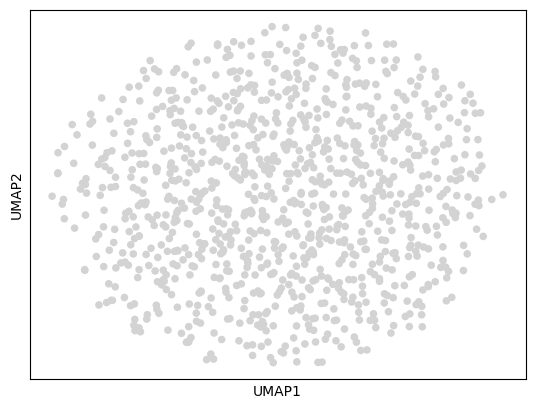

In [14]:
sc.pl.umap(adata_tmp)

Derive training data

In [15]:
data = []

for batch in estimator.datamodule["train_dataloader"]:
    data.append(batch["X"])

/nfs/staff-ssd/pala/envs/celldreamer/lib/python3.10/site-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [16]:
d = torch.cat(data)
indices = torch.randperm(d.shape[0])[:2000]
d = d[indices]

/nfs/staff-ssd/pala/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


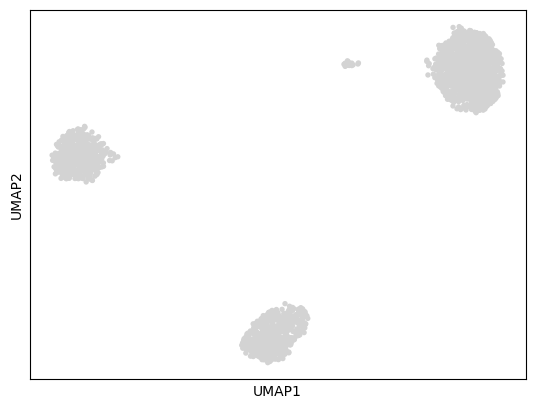

In [17]:
adata_tmp = sc.AnnData(X=d.cpu().numpy()+np.random.randn(d.shape[0], d.shape[1]))
sc.tl.pca(adata_tmp)
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp)

Check how it is embedding together

In [18]:
joint_d = np.concatenate([d, X_gen.cpu().numpy()])
obs = pd.DataFrame({"noise_type": ["true"]*d.shape[0] +
                   ["fake"]*X_gen.shape[0]})
adata_tmp = sc.AnnData(X=joint_d, 
                      obs=obs)
sc.tl.pca(adata_tmp)
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)

/nfs/staff-ssd/pala/envs/celldreamer/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [19]:
d.shape

torch.Size([2000, 2000])

/nfs/staff-ssd/pala/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


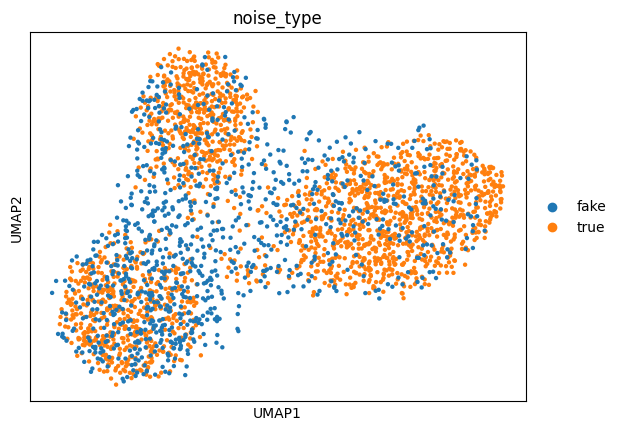

In [20]:
sc.pl.umap(adata_tmp, color="noise_type")

In [27]:
d.min()

tensor(-0.4139)

In [22]:
for i in d[0]: 
    print(i)

tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(4.8375)
tensor(-0.1851)
tensor(4.8375)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(4.8375)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(8.2891)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(4.8375)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(6.9393)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851

tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(6.9393)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0

tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(4.8375)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0

tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(4.8375)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)
tensor(-0.1851)


In [24]:
for i in X_gen[5]: 
    print(i)

tensor(-29.9057, device='cuda:0')
tensor(4.4919, device='cuda:0')
tensor(3.4312, device='cuda:0')
tensor(13.2835, device='cuda:0')
tensor(38.4268, device='cuda:0')
tensor(-19.0430, device='cuda:0')
tensor(16.7190, device='cuda:0')
tensor(42.7170, device='cuda:0')
tensor(-22.9762, device='cuda:0')
tensor(-15.6025, device='cuda:0')
tensor(17.3880, device='cuda:0')
tensor(12.2639, device='cuda:0')
tensor(-17.2453, device='cuda:0')
tensor(1.7487, device='cuda:0')
tensor(29.1634, device='cuda:0')
tensor(28.8922, device='cuda:0')
tensor(-14.0675, device='cuda:0')
tensor(-51.9729, device='cuda:0')
tensor(15.1788, device='cuda:0')
tensor(-32.8583, device='cuda:0')
tensor(-14.7224, device='cuda:0')
tensor(12.0131, device='cuda:0')
tensor(-6.5740, device='cuda:0')
tensor(30.7908, device='cuda:0')
tensor(-4.3473, device='cuda:0')
tensor(21.8941, device='cuda:0')
tensor(14.9946, device='cuda:0')
tensor(29.6169, device='cuda:0')
tensor(-7.8842, device='cuda:0')
tensor(25.1792, device='cuda:0')
tens

tensor(23.7587, device='cuda:0')
tensor(-1.8347, device='cuda:0')
tensor(9.5334, device='cuda:0')
tensor(28.0650, device='cuda:0')
tensor(-20.0373, device='cuda:0')
tensor(10.5394, device='cuda:0')
tensor(-21.0599, device='cuda:0')
tensor(-0.6715, device='cuda:0')
tensor(7.1968, device='cuda:0')
tensor(11.0984, device='cuda:0')
tensor(-36.3952, device='cuda:0')
tensor(-37.3392, device='cuda:0')
tensor(-24.9376, device='cuda:0')
tensor(-4.2363, device='cuda:0')
tensor(-11.5505, device='cuda:0')
tensor(2.7676, device='cuda:0')
tensor(-1.1102, device='cuda:0')
tensor(7.4236, device='cuda:0')
tensor(-32.3510, device='cuda:0')
tensor(0.7859, device='cuda:0')
tensor(1.1307, device='cuda:0')
tensor(-3.5433, device='cuda:0')
tensor(-9.3977, device='cuda:0')
tensor(12.9958, device='cuda:0')
tensor(21.3887, device='cuda:0')
tensor(-7.7841, device='cuda:0')
tensor(-13.1101, device='cuda:0')
tensor(22.9595, device='cuda:0')
tensor(-17.8782, device='cuda:0')
tensor(18.2085, device='cuda:0')
tensor(

tensor(-0.2044, device='cuda:0')
tensor(-14.8810, device='cuda:0')
tensor(0.4531, device='cuda:0')
tensor(24.3022, device='cuda:0')
tensor(6.8918, device='cuda:0')
tensor(0.3648, device='cuda:0')
tensor(-10.4342, device='cuda:0')
tensor(-12.2813, device='cuda:0')
tensor(-19.7621, device='cuda:0')
tensor(-4.2686, device='cuda:0')
tensor(-9.3964, device='cuda:0')
tensor(35.2048, device='cuda:0')
tensor(20.8399, device='cuda:0')
tensor(24.2055, device='cuda:0')
tensor(-14.5145, device='cuda:0')
tensor(0.5158, device='cuda:0')
tensor(6.8221, device='cuda:0')
tensor(32.7372, device='cuda:0')
tensor(-24.2943, device='cuda:0')
tensor(-34.2709, device='cuda:0')
tensor(16.6920, device='cuda:0')
tensor(6.4524, device='cuda:0')
tensor(-14.3963, device='cuda:0')
tensor(5.8652, device='cuda:0')
tensor(15.7162, device='cuda:0')
tensor(3.2803, device='cuda:0')
tensor(22.5964, device='cuda:0')
tensor(4.8452, device='cuda:0')
tensor(-11.1634, device='cuda:0')
tensor(-19.9315, device='cuda:0')
tensor(-3

tensor(-14.1745, device='cuda:0')
tensor(6.5607, device='cuda:0')
tensor(16.6007, device='cuda:0')
tensor(10.4519, device='cuda:0')
tensor(1.7211, device='cuda:0')
tensor(29.7245, device='cuda:0')
tensor(-16.1121, device='cuda:0')
tensor(18.8790, device='cuda:0')
tensor(6.7420, device='cuda:0')
tensor(6.3494, device='cuda:0')
tensor(12.6198, device='cuda:0')
tensor(1.1552, device='cuda:0')
tensor(34.4074, device='cuda:0')
tensor(3.5815, device='cuda:0')
tensor(-0.8498, device='cuda:0')
tensor(-1.4150, device='cuda:0')
tensor(28.3215, device='cuda:0')
tensor(7.1174, device='cuda:0')
tensor(-17.2807, device='cuda:0')
tensor(11.7993, device='cuda:0')
tensor(-11.4426, device='cuda:0')
tensor(-23.1620, device='cuda:0')
tensor(-9.3857, device='cuda:0')
tensor(-3.1501, device='cuda:0')
tensor(6.5393, device='cuda:0')
tensor(5.3396, device='cuda:0')
tensor(11.4448, device='cuda:0')
tensor(2.1937, device='cuda:0')
tensor(21.1131, device='cuda:0')
tensor(-3.0303, device='cuda:0')
tensor(-1.8753,

tensor(13.4370, device='cuda:0')
tensor(-32.8602, device='cuda:0')
tensor(-5.4911, device='cuda:0')
tensor(-10.0105, device='cuda:0')
tensor(-22.3487, device='cuda:0')
tensor(17.9003, device='cuda:0')
tensor(20.3016, device='cuda:0')
tensor(7.3447, device='cuda:0')
tensor(3.3009, device='cuda:0')
tensor(4.6382, device='cuda:0')
tensor(-3.2182, device='cuda:0')
tensor(15.1225, device='cuda:0')
tensor(-1.6448, device='cuda:0')
tensor(11.0878, device='cuda:0')
tensor(-3.4126, device='cuda:0')
tensor(25.6371, device='cuda:0')
tensor(3.0060, device='cuda:0')
tensor(-2.9811, device='cuda:0')
tensor(16.0981, device='cuda:0')
tensor(2.6318, device='cuda:0')
tensor(-10.3464, device='cuda:0')
tensor(-34.3078, device='cuda:0')
tensor(21.0393, device='cuda:0')
tensor(-15.2239, device='cuda:0')
tensor(9.9815, device='cuda:0')
tensor(14.9044, device='cuda:0')
tensor(0.6612, device='cuda:0')
tensor(18.2056, device='cuda:0')
tensor(50.7620, device='cuda:0')
tensor(-9.0387, device='cuda:0')
tensor(11.6

tensor(32.5946, device='cuda:0')
tensor(-33.1533, device='cuda:0')
tensor(-20.9514, device='cuda:0')
tensor(-6.8282, device='cuda:0')
tensor(-6.9697, device='cuda:0')
tensor(-1.0311, device='cuda:0')
tensor(13.3940, device='cuda:0')
tensor(-12.5707, device='cuda:0')
tensor(15.0740, device='cuda:0')
tensor(-20.8198, device='cuda:0')
tensor(5.6119, device='cuda:0')
tensor(-21.9079, device='cuda:0')
tensor(5.0719, device='cuda:0')
tensor(-2.0552, device='cuda:0')
tensor(5.1582, device='cuda:0')
tensor(-9.4515, device='cuda:0')
tensor(-12.5247, device='cuda:0')
tensor(-30.0609, device='cuda:0')
tensor(-7.5347, device='cuda:0')
tensor(7.2883, device='cuda:0')
tensor(-5.8090, device='cuda:0')
tensor(-10.7155, device='cuda:0')
tensor(15.4638, device='cuda:0')
tensor(7.0848, device='cuda:0')
tensor(6.6258, device='cuda:0')
tensor(-43.9881, device='cuda:0')
tensor(17.5835, device='cuda:0')
tensor(-0.5562, device='cuda:0')
tensor(1.3682, device='cuda:0')
tensor(11.0104, device='cuda:0')
tensor(3

tensor(11.8394, device='cuda:0')
tensor(7.7894, device='cuda:0')
tensor(-20.7477, device='cuda:0')
tensor(25.7204, device='cuda:0')
tensor(-39.0845, device='cuda:0')
tensor(-18.0472, device='cuda:0')
tensor(2.4586, device='cuda:0')
tensor(-8.4717, device='cuda:0')
tensor(11.9321, device='cuda:0')
tensor(26.0467, device='cuda:0')
tensor(7.4323, device='cuda:0')
tensor(21.6730, device='cuda:0')
tensor(-44.4708, device='cuda:0')
tensor(-45.3636, device='cuda:0')
tensor(6.5047, device='cuda:0')
tensor(-3.2328, device='cuda:0')
tensor(2.0039, device='cuda:0')
tensor(16.4993, device='cuda:0')
tensor(-22.5324, device='cuda:0')
tensor(26.7192, device='cuda:0')
tensor(-6.2852, device='cuda:0')
tensor(-15.5915, device='cuda:0')
tensor(-11.1283, device='cuda:0')
tensor(-8.1511, device='cuda:0')
tensor(-30.3463, device='cuda:0')
tensor(-4.1845, device='cuda:0')
tensor(-11.4377, device='cuda:0')
tensor(-9.4123, device='cuda:0')
tensor(-9.1777, device='cuda:0')
tensor(10.0367, device='cuda:0')
tenso

tensor(4.6631, device='cuda:0')
tensor(14.8202, device='cuda:0')
tensor(3.0458, device='cuda:0')
tensor(-12.1885, device='cuda:0')
tensor(24.3765, device='cuda:0')
tensor(-4.0572, device='cuda:0')
tensor(-7.5063, device='cuda:0')
tensor(-6.7986, device='cuda:0')
tensor(-16.9169, device='cuda:0')
tensor(-10.2746, device='cuda:0')
tensor(10.3970, device='cuda:0')
tensor(-35.1177, device='cuda:0')
tensor(-2.5966, device='cuda:0')
tensor(12.4821, device='cuda:0')
tensor(8.7381, device='cuda:0')
tensor(-22.3776, device='cuda:0')
tensor(19.8203, device='cuda:0')
tensor(17.6206, device='cuda:0')
tensor(-3.6059, device='cuda:0')
tensor(-29.5061, device='cuda:0')
tensor(5.0655, device='cuda:0')
tensor(-12.4925, device='cuda:0')
tensor(16.1734, device='cuda:0')
tensor(29.0816, device='cuda:0')
tensor(32.4303, device='cuda:0')
tensor(19.2304, device='cuda:0')
tensor(-6.7494, device='cuda:0')
tensor(49.9256, device='cuda:0')
tensor(-27.8342, device='cuda:0')
tensor(-28.2626, device='cuda:0')
tenso

**Examine why it does not work**

In [ ]:
estimator.generative_model.state_dict()['denoising_model.decoder.0.out_layer.2.weight']

In [ ]:
next(iter(estimator.datamodule["train_dataloader"]))

In [ ]:
x = torch.randn(1, 2003)

In [ ]:
estimator.generative_model.denoising_model.encoder[0].net(x)